## Telecom Churn Case Study

### Business problem overview
 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

#### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Steps inovolved in Analysis
1. Data Sourcing/ Understanding
2. Data Cleaning
3. Exploratory Data Analysis
4. Model Preparation
    - Train and test data split
    - Data Normalization
    - Handling class imbalance
5. Model Building
6. Model Evaluation
7. Final Inference

### 1. Data Sourcing and Understanding

In [1]:
### Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Setting max display columns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
### Reading telecom churn dataset

data= pd.read_csv('telecom_churn_data.csv')
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
data.shape

(99999, 226)

#### Obseravtion-
we have total 226 columns, 214 are Numeric and 12 are non-numeric.
we have around 1 lakh cutomers data available.

In [6]:
print((data.isnull().sum()/len(data) * 100).sort_values(ascending= False))

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

### Data Cleaning

In [7]:
### checking any duplicate records are present in dataset.
data['mobile_number'].value_counts().sum()

99999

 hence there is no duplicate data present in dataset.

In [8]:
# Setting mobile_number as the index 
data = data.set_index('mobile_number')

In [9]:
# Renaming columns 
data = data.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [10]:
#Converting columns into appropriate data types and extracting singe value columns.
# Columns with unique values < 29 are considered as categorical variables. 
# The number 30 is arrived at, by looking at the above metadata_matrix output. 

columns=data.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=data[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and data[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                    0
0     loc_og_t2o_mou
1     std_og_t2o_mou
2     loc_ic_t2o_mou
3   std_og_t2c_mou_6
4   std_og_t2c_mou_7
5   std_og_t2c_mou_8
6   std_og_t2c_mou_9
7   std_ic_t2o_mou_6
8   std_ic_t2o_mou_7
9   std_ic_t2o_mou_8
10  std_ic_t2o_mou_9
11   count_rech_3g_6
12   count_rech_3g_7
13   count_rech_3g_8
14   count_rech_3g_9
15  night_pck_user_6
16  night_pck_user_7
17  night_pck_user_8
18  night_pck_user_9
19         fb_user_6
20         fb_user_7
21         fb_user_8
22         fb_user_9 



In [11]:
# Converting all the above columns having <=29 unique values into categorical data type.
data[change_to_cat]=data[change_to_cat].astype('category')

In [12]:
# Converting *sachet* variables to categorical data type 
sachet_columns = data.filter(regex='.*sachet.*', axis=1).columns.values
data[sachet_columns] = data[sachet_columns].astype('category')

In [13]:
#Changing datatype of date variables to datetime.
columns=data.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
data[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [14]:
# Checking the date format
data[col_with_date].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
mobile_number                                                               
7000842753              6/21/2014           7/16/2014            8/8/2014   
7001865778              6/29/2014           7/31/2014           8/28/2014   
7001625959              6/17/2014           7/24/2014           8/14/2014   
7001204172              6/28/2014           7/31/2014           8/31/2014   
7000142493              6/26/2014           7/28/2014            8/9/2014   

              date_of_last_rech_9 date_of_last_rech_data_6  \
mobile_number                                                
7000842753              9/28/2014                6/21/2014   
7001865778              9/30/2014                      NaN   
7001625959              9/29/2014                      NaN   
7001204172              9/30/2014                      NaN   
7000142493              9/28/2014                 6/4/2014   

              date_of_last_rech_data_7 date_of_last_rech_data_8  \
mobile_number                                                     
7000842753                   7/16/2014                 8/8/2014   
7001865778                   7/25/2014                8/10/2014   
7001625959                         NaN                      NaN   
7001204172                         NaN                      NaN   
7000142493                         NaN                      NaN   

              date_of_last_rech_data_9  
mobile_number                           
7000842753                         NaN  
7001865778                         NaN  
7001625959                   9/17/2014  
7001204172                         NaN  
7000142493                         NaN

In [15]:
for col in col_with_date:
    data[col]=pd.to_datetime(data[col], format="%m/%d/%Y")
data[col_with_date].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
mobile_number                                                               
7000842753             2014-06-21          2014-07-16          2014-08-08   
7001865778             2014-06-29          2014-07-31          2014-08-28   
7001625959             2014-06-17          2014-07-24          2014-08-14   
7001204172             2014-06-28          2014-07-31          2014-08-31   
7000142493             2014-06-26          2014-07-28          2014-08-09   

              date_of_last_rech_9 date_of_last_rech_data_6  \
mobile_number                                                
7000842753             2014-09-28               2014-06-21   
7001865778             2014-09-30                      NaT   
7001625959             2014-09-29                      NaT   
7001204172             2014-09-30                      NaT   
7000142493             2014-09-28               2014-06-04   

              date_of_last_rech_data_7 date_of_last_rech_data_8  \
mobile_number                                                     
7000842753                  2014-07-16               2014-08-08   
7001865778                  2014-07-25               2014-08-10   
7001625959                         NaT                      NaT   
7001204172                         NaT                      NaT   
7000142493                         NaT                      NaT   

              date_of_last_rech_data_9  
mobile_number                           
7000842753                         NaT  
7001865778                         NaT  
7001625959                  2014-09-17  
7001204172                         NaT  
7000142493                         NaT

### Missing values treatment

In [16]:
#Checking for missing values.
round((data.isnull().sum()/len(data) * 100).sort_values(ascending= False),4)

arpu_3g_6                   74.8467
av_rech_amt_data_6          74.8467
fb_user_6                   74.8467
night_pck_user_6            74.8467
total_rech_data_6           74.8467
max_rech_data_6             74.8467
count_rech_2g_6             74.8467
count_rech_3g_6             74.8467
date_of_last_rech_data_6    74.8467
arpu_2g_6                   74.8467
av_rech_amt_data_7          74.4287
date_of_last_rech_data_7    74.4287
max_rech_data_7             74.4287
total_rech_data_7           74.4287
arpu_3g_7                   74.4287
fb_user_7                   74.4287
count_rech_3g_7             74.4287
arpu_2g_7                   74.4287
night_pck_user_7            74.4287
count_rech_2g_7             74.4287
arpu_3g_9                   74.0777
max_rech_data_9             74.0777
date_of_last_rech_data_9    74.0777
total_rech_data_9           74.0777
arpu_2g_9                   74.0777
count_rech_2g_9             74.0777
night_pck_user_9            74.0777
count_rech_3g_9             

We have to take care of those columns who have missing values greater than 70 % so that we do not drop the columns related to the recharge amounts. 
Thus to avoid doing that first we have to deal with the missing values in these columns -

-total_rech_data_6 - 74.8467 % missing values

-total_rech_data_7 - 74.4287 % missing values

-av_rech_amt_data_6 - 74.8467 % missing values

-av_rech_amt_data_7 - 74.4287 % missing values

We have 2 more columns as -

-date_of_last_rech_data_6 - 74.8467 % missing values

-date_of_last_rech_data_7 - 74.4287 % missing values

In [17]:
# The logic here would be to check if columns - 'total_rech_data_6' and 'date_of_last_rech_data_6' both 
# have null values at the same index. If yes, then that would mean there was no data recharge done for that month
# and we can safely impute the 'total_rech_data_6' value with 0.

total_rech_data_6_index = data['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = data['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


So we see that the two indexes object are equal and we can safely conclude that no data recharge was done for that month and the 'total_rech_data_6' missing values can be imputed with 0. Also as the total data recharge for the month is 0, we can impute 0 for 'av_rech_amt_data_6' column as well.

In [18]:
data['total_rech_data_6'].fillna(0, inplace=True)
data['av_rech_amt_data_6'].fillna(0, inplace=True)

We will follow the same logic for 'total_rech_data_7', av_rech_amt_data_7, 'total_rech_data_8' & 'av_rech_amt_data_8' columns as well.

In [19]:
total_rech_data_7_index = data['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = data['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [20]:
total_rech_data_8_index = data['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = data['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


So we see that the two indexes object are equal and we can safely conclude that no data recharge was done for month 7 and 8 & the missing values can be imputed with 0.

In [21]:
# imputing zero for Month 7
data['total_rech_data_7'].fillna(0, inplace=True)
data['av_rech_amt_data_7'].fillna(0, inplace=True)

# imputing zero for Month 8
data['total_rech_data_8'].fillna(0, inplace=True)
data['av_rech_amt_data_8'].fillna(0, inplace=True)

In [22]:
### checking % missing values
round((data.isnull().sum()/len(data) * 100).sort_values(ascending= False),4)

count_rech_3g_6             74.8467
arpu_3g_6                   74.8467
night_pck_user_6            74.8467
max_rech_data_6             74.8467
count_rech_2g_6             74.8467
date_of_last_rech_data_6    74.8467
arpu_2g_6                   74.8467
fb_user_6                   74.8467
arpu_2g_7                   74.4287
count_rech_2g_7             74.4287
fb_user_7                   74.4287
max_rech_data_7             74.4287
count_rech_3g_7             74.4287
date_of_last_rech_data_7    74.4287
arpu_3g_7                   74.4287
night_pck_user_7            74.4287
max_rech_data_9             74.0777
total_rech_data_9           74.0777
night_pck_user_9            74.0777
arpu_2g_9                   74.0777
date_of_last_rech_data_9    74.0777
count_rech_2g_9             74.0777
av_rech_amt_data_9          74.0777
arpu_3g_9                   74.0777
count_rech_3g_9             74.0777
fb_user_9                   74.0777
max_rech_data_8             73.6607
arpu_3g_8                   

In [23]:
# Also lets check how many columns have more than 70% data missing

cols_with_atleast_70_percent_missing_data = ((data.isnull().sum()/ len(data)) * 100) >= 70
cols_with_atleast_70_percent_missing_data.sum()

34

So there are 34 columns where 70% data is missing. Now this 70% data is based out of the complete data which contains about 1 lac observations. But our objective is to find the churn rate for only high valued customers.

### Data Preparation

#### 1. New feature creation

Now we have values for 'total_rech_data_' and 'av_rech_amt_data_' (for months 6, 7, 8 & 9). Using these 2 values we can derive new feature for the respective months called total_data_rech_amt_ which equals total_rech_data_ * av_rech_amt_data_

In [24]:
data['total_data_rech_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_data_rech_amt_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']
data['total_data_rech_amt_9'] = data['total_rech_data_9'] * data['av_rech_amt_data_9']

#### 2. Filtering High value customers

In [25]:
avg_recharge_amount_month_6_7 = data[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)

70th percentile of the average recharge amount in the first two months is -  239.0


In [26]:
# Filtering the high values customers

data = data[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

In [27]:
data.shape

(30001, 229)

In [28]:
data.head()

circle_id loc_og_t2o_mou std_og_t2o_mou loc_ic_t2o_mou  \
mobile_number                                                           
7000842753           109            0.0            0.0            0.0   
7000701601           109            0.0            0.0            0.0   
7001524846           109            0.0            0.0            0.0   
7002124215           109            0.0            0.0            0.0   
7000887461           109            0.0            0.0            0.0   

              last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
mobile_number                                                                  
7000842753               6/30/2014            7/31/2014            8/31/2014   
7000701601               6/30/2014            7/31/2014            8/31/2014   
7001524846               6/30/2014            7/31/2014            8/31/2014   
7002124215               6/30/2014            7/31/2014            8/31/2014   
7000887461               6/30/2014            7/31/2014            8/31/2014   

              last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  \
mobile_number                                                               
7000842753               9/30/2014   197.385   214.816   213.803   21.100   
7000701601               9/30/2014  1069.180  1349.850  3171.480  500.000   
7001524846               9/30/2014   378.721   492.223   137.362  166.787   
7002124215               9/30/2014   514.453   597.753   637.760  578.596   
7000887461               9/30/2014    74.350   193.897   366.966  811.480   

               onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
mobile_number                                                       
7000842753             NaN          NaN         0.00          NaN   
7000701601           57.84        54.68        52.29          NaN   
7001524846          413.69       351.03        35.08        33.46   
7002124215          102.41       132.11        85.14       161.63   
7000887461           48.96        50.66        33.58        15.74   

               offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
mobile_number                                                           
7000842753              NaN           NaN          0.00           NaN   
7000701601           453.43        567.16        325.91           NaN   
7001524846            94.66         80.63        136.48        108.71   
7002124215           757.93        896.68        983.39        869.89   
7000887461            85.41         89.36        205.89        111.88   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
mobile_number                                                               
7000842753               NaN            NaN           0.00            NaN   
7000701601             16.23          33.49          31.64            NaN   
7001524846              0.00           0.00           0.00            0.0   
7002124215              0.00           0.00           0.00            0.0   
7000887461              0.00           0.00           0.00            0.0   

               roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
mobile_number                                                               
7000842753               NaN            NaN           0.00            NaN   
7000701601             23.74          12.59          38.06            NaN   
7001524846              0.00           0.00           0.00            0.0   
7002124215              0.00           0.00           0.00            0.0   
7000887461              0.00           0.00           0.00            0.0   

               loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
mobile_number                                                         
7000842753                  NaN               NaN              0.00   
7000701601                51.39             31.38             40.28   
7001524846               297.13           

#### so after filtering out high value customers we have left with around 30k data.

#### 3. Tag churners
Now to tag churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [29]:
churn_parameters_data = data[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_parameters_data.head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
mobile_number                                                          
7000842753               0.00            0.00         0.00         0.00
7000701601               0.00            0.00         0.00         0.00
7001524846              34.91          142.18         0.00         0.00
7002124215             252.61         1031.53         0.00         0.00
7000887461             127.48          127.63        13.93       314.74

In [30]:
### if the customers not made call and not used internet in month 9 then we can name them as churn(1) 
### and if not then we will tagged them as a non churn(0)

In [31]:
data['churn'] = data.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) and 
                                          (x.total_og_mou_9 == 0) and 
                                          (x.vol_2g_mb_9 == 0) and 
                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [32]:
data['churn'].head()

mobile_number
7000842753    1
7000701601    1
7001524846    0
7002124215    0
7000887461    0
Name: churn, dtype: int64

In [33]:
# Now we need to remove the columns related to month 9 as we have created new column churn.
# We will try to get all the columns in the 'data' dataset where the column have '_9' in the name.

cols_with__9 = [col for col in data.columns if '_9' in col]
cols_with__9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [34]:
### Dropping columns
data.drop(cols_with__9, axis=1, inplace = True)

In [35]:
data.shape

(30001, 174)

Now we are left with 174 columns

In [36]:
### again checking missing values in data.
round((data.isnull().sum()/len(data) * 100).sort_values(ascending= False),4)

date_of_last_rech_data_8    46.8251
night_pck_user_8            46.8251
arpu_3g_8                   46.8251
fb_user_8                   46.8251
arpu_2g_8                   46.8251
count_rech_3g_8             46.8251
max_rech_data_8             46.8251
count_rech_2g_8             46.8251
date_of_last_rech_data_6    44.1485
fb_user_6                   44.1485
night_pck_user_6            44.1485
max_rech_data_6             44.1485
count_rech_2g_6             44.1485
count_rech_3g_6             44.1485
arpu_2g_6                   44.1485
arpu_3g_6                   44.1485
count_rech_2g_7             43.1452
fb_user_7                   43.1452
max_rech_data_7             43.1452
count_rech_3g_7             43.1452
arpu_2g_7                   43.1452
night_pck_user_7            43.1452
arpu_3g_7                   43.1452
date_of_last_rech_data_7    43.1452
og_others_8                  3.9132
std_og_t2m_mou_8             3.9132
std_ic_mou_8                 3.9132
std_og_t2f_mou_8            

In [37]:
# Get the column/feature names which have more than 40% missing data.

total_cols_with_atleast_40_percent_missing_data = ((data.isnull().sum()/ len(data)) * 100) >= 40

cols_names_with_40_percent_missing_value = total_cols_with_atleast_40_percent_missing_data[
    total_cols_with_atleast_40_percent_missing_data > 0.40].index

cols_names_with_40_percent_missing_value

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

In [38]:
### lets examine above columns one by one
### as we cannot impute date manually so it is safe to drop those columns as more than 40% data is missing.
data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)

In [39]:
### examine max_recharge data

print(data.max_rech_data_6.describe())

count    16756.000000
mean       139.798580
std        118.851784
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64


As from above data the minimum value is 1 and maximum value is 1555 for month 6. so we can impute missing values as 0 as no recharge was done.

In [40]:
### repeating same step for month 7 and month 8.

print("For month 7 ")
print(data.max_rech_data_7.describe())
print("\n")
print("For month 8 ")
print(data.max_rech_data_8.describe())

For month 7 
count    17057.000000
mean       140.431143
std        120.247247
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64


For month 8 
count    15953.000000
mean       136.329217
std        119.531924
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64


So, we can impute missing value as zero in above three columns.

In [41]:
# Replace NA with 0

for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    data[col].fillna(0, inplace=True)

Now all the columns that have more than 40% missing values one way or the other relate to data/mobile internet usage for the months 6, 7 & 8 respectively. One important observation that comes out is that for a particular month all these values have same number of missing values.
So now lets check & confirm if these missing values from the respective months are all from the same observations/index.

In [42]:
# Month 6

arpu_3g_6_index = data['arpu_3g_6'].isnull()
night_pck_user_6_index = data['night_pck_user_6'].isnull()
count_rech_2g_6_index = data['count_rech_2g_6'].isnull()
count_rech_3g_6_index = data['count_rech_3g_6'].isnull()
fb_user_6_index = data['fb_user_6'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) &  count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes for NULL values for month 6 are equal')


# ***************************************************************************************************************************

# Month 7

arpu_3g_7_index = data['arpu_3g_7'].isnull()
night_pck_user_7_index = data['night_pck_user_7'].isnull()
count_rech_2g_7_index = data['count_rech_2g_7'].isnull()
count_rech_3g_7_index = data['count_rech_3g_7'].isnull()
fb_user_7_index = data['fb_user_7'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) &  count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes for NULL values for month 7 are equal')

# ***************************************************************************************************************************

# Month 8

arpu_3g_8_index = data['arpu_3g_8'].isnull()
night_pck_user_8_index = data['night_pck_user_8'].isnull()
count_rech_2g_8_index = data['count_rech_2g_8'].isnull()
count_rech_3g_8_index = data['count_rech_3g_8'].isnull()
fb_user_8_index = data['fb_user_8'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) &  count_rech_3g_8_index.equals(fb_user_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 6 are equal
The indexes for NULL values for month 7 are equal
The indexes for NULL values for month 8 are equal


Also an observation with mobile internet usage having a missing value would mostly mean that the customer is not using that particular service. This would also mean that the person would not be using any add-on services that would require a mobile internet pack.

So with this inference we can impute the missing values related to columns for mobile data with 0.

Also we saw above that all the misssing values are from the same record i.e., say for example the column for max_rech_data_ for a particular month is missing then all the other attributes related to mobile internet are also missing. So every attribute can be imputed with 0.

In [43]:
# impute the missing values with 0

columns_to_impute = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

data[columns_to_impute] = data[columns_to_impute].fillna(0)

In [44]:
### checking missing values

round((data.isnull().sum()/len(data) * 100).sort_values(ascending= False),4)

loc_ic_t2t_mou_8         3.9132
std_ic_t2t_mou_8         3.9132
loc_ic_mou_8             3.9132
loc_og_t2t_mou_8         3.9132
loc_ic_t2f_mou_8         3.9132
loc_og_t2m_mou_8         3.9132
loc_ic_t2m_mou_8         3.9132
loc_og_t2f_mou_8         3.9132
og_others_8              3.9132
loc_og_t2c_mou_8         3.9132
spl_og_mou_8             3.9132
loc_og_mou_8             3.9132
isd_og_mou_8             3.9132
std_og_t2t_mou_8         3.9132
std_og_mou_8             3.9132
std_og_t2m_mou_8         3.9132
std_og_t2c_mou_8         3.9132
roam_og_mou_8            3.9132
std_og_t2f_mou_8         3.9132
roam_ic_mou_8            3.9132
spl_ic_mou_8             3.9132
std_ic_t2m_mou_8         3.9132
offnet_mou_8             3.9132
ic_others_8              3.9132
std_ic_t2f_mou_8         3.9132
onnet_mou_8              3.9132
std_ic_t2o_mou_8         3.9132
isd_ic_mou_8             3.9132
std_ic_mou_8             3.9132
date_of_last_rech_8      1.9433
std_og_mou_6             1.8166
ic_other

##### Columns with ZERO variance -
Let's check on the other columns now. But before proceeding with the missing value analysis of other columns let's check if we have any columns with zero variance (as this would be very important while conducting Principal Component Analysis). For the problem at hand if any variable has zero variance (all same values) it would have no impact during the analysis. We will drop duch columns.

In [45]:
# Variance  - df.var() method

columns_with_0_variance = data.var() == 0
print("Total columns with ZERO variance are - ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

print("\n")


columns_with_1_unique_value = data.nunique() == 1
print("Total columns with only ONE unique value are - ", columns_with_1_unique_value.sum())

column_name_with_1_unique_value = columns_with_1_unique_value[columns_with_1_unique_value == 1].index
print(column_name_with_1_unique_value)

Total columns with ZERO variance are -  0
Index([], dtype='object')


Total columns with only ONE unique value are -  13
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [46]:
### Lets drop the columns with one unique value

data.drop(column_name_with_1_unique_value, axis=1, inplace = True)

In [47]:
data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7000842753      197.385   214.816   213.803          NaN          NaN   
7000701601     1069.180  1349.850  3171.480        57.84        54.68   
7001524846      378.721   492.223   137.362       413.69       351.03   
7002124215      514.453   597.753   637.760       102.41       132.11   
7000887461       74.350   193.897   366.966        48.96        50.66   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7000842753            0.00           NaN           NaN          0.00   
7000701601           52.29        453.43        567.16        325.91   
7001524846           35.08         94.66         80.63        136.48   
7002124215           85.14        757.93        896.68        983.39   
7000887461           33.58         85.41         89.36        205.89   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                                                               
7000842753               NaN            NaN           0.00            NaN   
7000701601             16.23          33.49          31.64          23.74   
7001524846              0.00           0.00           0.00           0.00   
7002124215              0.00           0.00           0.00           0.00   
7000887461              0.00           0.00           0.00           0.00   

               roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
mobile_number                                                   
7000842753               NaN           0.00               NaN   
7000701601             12.59          38.06             51.39   
7001524846              0.00           0.00            297.13   
7002124215              0.00           0.00              4.48   
7000887461              0.00           0.00             48.96   

               loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
mobile_number                                                         
7000842753                  NaN              0.00               NaN   
7000701601                31.38             40.28            308.63   
7001524846               217.59             12.49             80.96   
7002124215                 6.16             23.34             91.81   
7000887461                50.66             33.58             82.94   

               loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
mobile_number                                                         
7000842753                  NaN              0.00               NaN   
7000701601               447.38            162.28             62.13   
7001524846                70.58             50.54              0.00   
7002124215                87.93            104.81              0.75   
7000887461                83.01            148.56              0.00   

               loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
mobile_number                                                         
7000842753                  NaN              0.00               NaN   
7000701601                55.14             53.23               0.0   
7001524846                 0.00              0.00               0.0   
7002124215                 0.00              1.58               0.0   
7000887461                 0.00              0.00               0.0   

               loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
mobile_number                                                                   
7000842753                  NaN              0.00           NaN           NaN   
7000701601                  0.0              0.00        422.16        533.91   
7001524846                  0.0              7.15        378.09        288.18   
7002124215                  0.0              0.00         97.04         94.09   
7000887461              

In [48]:
data.shape

(30001, 158)

In [49]:
### checking missing values

round((data.isnull().sum()/len(data) * 100).sort_values(ascending= False),4)

loc_og_t2m_mou_8         3.9132
roam_og_mou_8            3.9132
loc_ic_t2f_mou_8         3.9132
loc_og_mou_8             3.9132
loc_og_t2f_mou_8         3.9132
loc_ic_mou_8             3.9132
loc_ic_t2t_mou_8         3.9132
std_og_mou_8             3.9132
std_ic_t2t_mou_8         3.9132
std_og_t2t_mou_8         3.9132
loc_og_t2t_mou_8         3.9132
std_ic_t2m_mou_8         3.9132
og_others_8              3.9132
std_ic_t2f_mou_8         3.9132
loc_ic_t2m_mou_8         3.9132
std_og_t2m_mou_8         3.9132
roam_ic_mou_8            3.9132
std_ic_mou_8             3.9132
spl_og_mou_8             3.9132
offnet_mou_8             3.9132
spl_ic_mou_8             3.9132
std_og_t2f_mou_8         3.9132
onnet_mou_8              3.9132
isd_ic_mou_8             3.9132
isd_og_mou_8             3.9132
ic_others_8              3.9132
loc_og_t2c_mou_8         3.9132
date_of_last_rech_8      1.9433
loc_ic_t2m_mou_6         1.8166
loc_ic_mou_6             1.8166
std_ic_t2t_mou_6         1.8166
loc_ic_t

Also one more insight that the above figures give us is that towards the 8th month the number of missing values increases and this could possibly mean that the customer might have stopped using these services. This could be an indication that the particular customer is more likely to churn.

So not using the services means the minutes of usage can be imputed with 0.

In [50]:
# Let's impute the missing values from the above columns with 0. There are 3 column with date values - 'date_of_last_rech'.
# We do not want to impute date objects with 0. So will exclude it for now.

columns_with_null_values = data.columns[data.isna().any()].tolist()

for column in columns_with_null_values:
    if "date_of_last_rech" not in column:
        data[column].fillna(0, inplace=True)

In [51]:
data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7000842753      197.385   214.816   213.803         0.00         0.00   
7000701601     1069.180  1349.850  3171.480        57.84        54.68   
7001524846      378.721   492.223   137.362       413.69       351.03   
7002124215      514.453   597.753   637.760       102.41       132.11   
7000887461       74.350   193.897   366.966        48.96        50.66   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7000842753            0.00          0.00          0.00          0.00   
7000701601           52.29        453.43        567.16        325.91   
7001524846           35.08         94.66         80.63        136.48   
7002124215           85.14        757.93        896.68        983.39   
7000887461           33.58         85.41         89.36        205.89   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                                                               
7000842753              0.00           0.00           0.00           0.00   
7000701601             16.23          33.49          31.64          23.74   
7001524846              0.00           0.00           0.00           0.00   
7002124215              0.00           0.00           0.00           0.00   
7000887461              0.00           0.00           0.00           0.00   

               roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
mobile_number                                                   
7000842753              0.00           0.00              0.00   
7000701601             12.59          38.06             51.39   
7001524846              0.00           0.00            297.13   
7002124215              0.00           0.00              4.48   
7000887461              0.00           0.00             48.96   

               loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
mobile_number                                                         
7000842753                 0.00              0.00              0.00   
7000701601                31.38             40.28            308.63   
7001524846               217.59             12.49             80.96   
7002124215                 6.16             23.34             91.81   
7000887461                50.66             33.58             82.94   

               loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
mobile_number                                                         
7000842753                 0.00              0.00              0.00   
7000701601               447.38            162.28             62.13   
7001524846                70.58             50.54              0.00   
7002124215                87.93            104.81              0.75   
7000887461                83.01            148.56              0.00   

               loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
mobile_number                                                         
7000842753                 0.00              0.00               0.0   
7000701601                55.14             53.23               0.0   
7001524846                 0.00              0.00               0.0   
7002124215                 0.00              1.58               0.0   
7000887461                 0.00              0.00               0.0   

               loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
mobile_number                                                                   
7000842753                  0.0              0.00          0.00          0.00   
7000701601                  0.0              0.00        422.16        533.91   
7001524846                  0.0              7.15        378.09        288.18   
7002124215                  0.0              0.00         97.04         94.09   
7000887461              

In [52]:
data.shape

(30001, 158)

In [53]:
### The date columns are not useful in our analysis so we will drop them.

print(data.columns.tolist())

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [54]:
# Let's check on the date values
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

data.drop(date_columns, axis=1, inplace = True)

In [55]:
# Lets have a look at the data description for missing values again -

print(data.isnull().sum())

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
std_og_t2f_mou_6         0
s

#### So, there is no missing values present in data.

Looking at the problem statement, attributes total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 are used to tag churners. So, it is clearly evident from the problem statement that the individual incoming and outgoing attributes are not used for data analysis. Dropping the individual columns (whose totals are already available like incoming, outgoing, arpu, etc) can help us in better analysis. Also, dropping these individual columns will help in removing the multicollinearity.

In [56]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

data.drop(individual_cols, axis = 1, inplace = True)

data.shape

(30001, 104)

In [57]:
### Lets analyze revenue columns row-wise.

# Let's check the data description for the arpu columns

arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(data[column].describe(), end='\n')
        print("\n")

describe_ARPU_Columns()

Column Description for - arpu_6
count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64


Column Description for - arpu_7
count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64


Column Description for - arpu_8
count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64




#### The MINIMUM value for all the arpu related columns are NEGATIVE. 
the revenue generated from a user cannot be negative. If a customer is not using any services then apru for the person would be zero (rather that being negative).

So we will drop the data having negative values.

In [58]:
# Let's delete the observations with negative arpu values. 

data = data[(data['arpu_6'] >= 0) & 
            (data['arpu_7'] >= 0) & 
            (data['arpu_8'] >= 0)]

In [59]:
data.shape

(29824, 104)

### Exploratory Data Analysis.

In [60]:
data.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   
mean     559.219456    562.562717    510.085640    261.221418    268.432668   
std      459.504626    478.650800    501.034006    459.882386    480.118084   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      310.997000    311.804750    233.862000     17.310000     16.280000   
50%      482.462500    482.121500    428.508500     85.040000     83.575000   
75%      699.734750    699.081750    662.607000    291.277500    291.490000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29824.000000  29824.000000  29824.000000  29824.000000   29824.000000   
mean     234.713851    373.290400    378.524141    335.496097      16.163287   
std      458.523657    479.935683    497.879922    479.852372      76.476134   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       10.790000     72.355000     70.552500     47.810000       0.000000   
50%       66.210000    223.060000    220.970000    183.860000       0.000000   
75%      241.377500    487.630000    494.432500    439.867500       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29824.000000   29824.000000   29824.000000   29824.000000   
mean       12.665772      12.540844      26.587856      20.221840   
std        75.919274      74.296839     115.896578      96.329109   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  \
count   29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   
mean       19.959368    254.184985    255.602001    236.198045    347.042871   
std       105.000152    377.768435    374.931788    362.335779    607.363864   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000     32.580000     34.960000     23.140000      0.410000   
50%         0.000000    125.030000    128.785000    111.655000     45.630000   
75%         0.000000    332.400000    334.425000    311.815000    466.167500   
max      5337.040000  10643.380000   7674.780000  11039.910000   8432.990000   

       std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
count  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   
mean     364.456108    307.816943      2.157038      2.105380      1.955376   
std      639.590635    607.789460     45.933468     45.671468     44.840402   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.180000      0.000000      0.000000      0.000000      0.000000   
50%       44.470000     25.960000      0.000000      0.000000      0.000000   
75%      500.927500    359.522500      0.000000      0.000000      0.000000   
max    10936.730000  13980.060000   5900.660000   5490.280000   5681.540000   

       spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7  \
count  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   
mean       5.820176      7.118840      6.572885      0.661218      0.043034   
std       17.582614     21.812118     20.334324      4.117322      2.684681   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.230000      0.710000      0.450000    

In [61]:
data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7000842753      197.385   214.816   213.803         0.00         0.00   
7000701601     1069.180  1349.850  3171.480        57.84        54.68   
7001524846      378.721   492.223   137.362       413.69       351.03   
7002124215      514.453   597.753   637.760       102.41       132.11   
7000887461       74.350   193.897   366.966        48.96        50.66   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7000842753            0.00          0.00          0.00          0.00   
7000701601           52.29        453.43        567.16        325.91   
7001524846           35.08         94.66         80.63        136.48   
7002124215           85.14        757.93        896.68        983.39   
7000887461           33.58         85.41         89.36        205.89   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                                                               
7000842753              0.00           0.00           0.00           0.00   
7000701601             16.23          33.49          31.64          23.74   
7001524846              0.00           0.00           0.00           0.00   
7002124215              0.00           0.00           0.00           0.00   
7000887461              0.00           0.00           0.00           0.00   

               roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  \
mobile_number                                                             
7000842753              0.00           0.00          0.00          0.00   
7000701601             12.59          38.06        422.16        533.91   
7001524846              0.00           0.00        378.09        288.18   
7002124215              0.00           0.00         97.04         94.09   
7000887461              0.00           0.00        131.91        133.68   

               loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
mobile_number                                                           
7000842753             0.00          0.00          0.00          0.00   
7000701601           255.79         60.86         75.14         77.84   
7001524846            63.04        130.26        143.48         98.28   
7002124215           129.74        763.29        934.69        938.79   
7000887461           182.14          2.36          6.35         39.61   

               isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
mobile_number                                                           
7000842753              0.0          0.00          0.00           0.0   
7000701601              0.0          0.18         10.01           4.5   
7001524846              0.0          0.00          0.00           0.0   
7002124215              0.0          0.00          0.00           0.0   
7000887461              0.0          0.01          0.00           0.1   

               spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
mobile_number                                                         
7000842753              0.0          0.00          0.0          0.0   
7000701601              0.0          6.50          0.0          0.0   
7001524846              0.0         10.23          0.0          0.0   
7002124215              0.0          0.00          0.0          0.0   
7000887461              0.0         17.71          0.0          0.0   

               og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
mobile_number                                                                
7000842753             0.0            0.00            0.00            0.00   
7000701601             0.0          487.53          609.24          350.16   
7001524846             0.0          508.36          431.66          171.56   
7002124215            

Variables night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7 and fb_user_8 are encoded with number 0 and 1. These variables can be considered as Ordered Categorical columns.

In [62]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

data[category_list] = data[category_list].astype(int)

data[category_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 7000842753 to 7000498689
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29824 non-null  int32
 1   night_pck_user_7  29824 non-null  int32
 2   night_pck_user_8  29824 non-null  int32
 3   fb_user_6         29824 non-null  int32
 4   fb_user_7         29824 non-null  int32
 5   fb_user_8         29824 non-null  int32
dtypes: int32(6)
memory usage: 932.0 KB


### Univariate Analysis - Ordered Categorical Variables

In [63]:
# Custom Function to add data labels in the graph

def add_data_labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

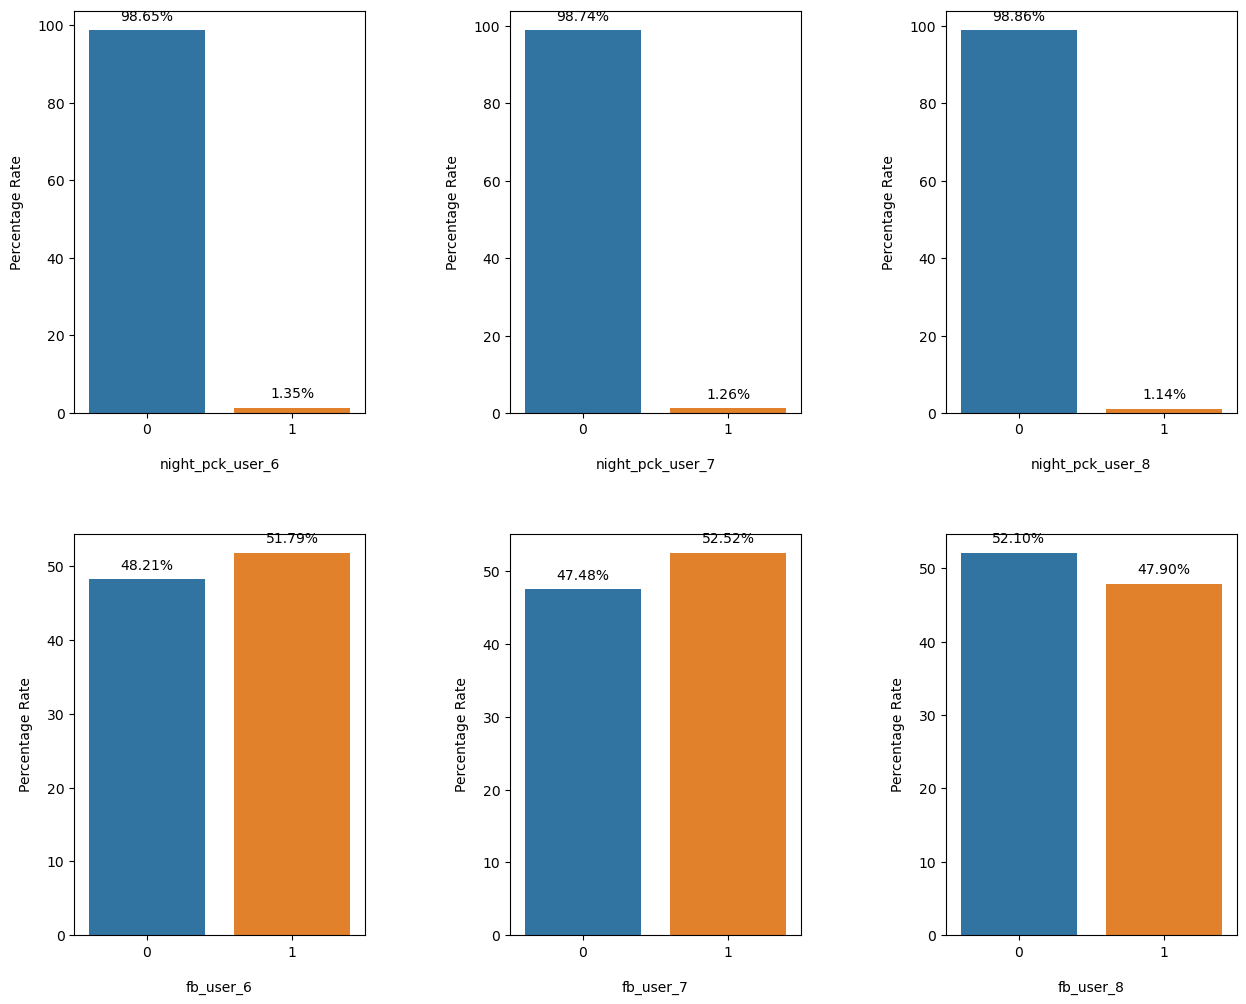

In [64]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
        
    series = round(((data[col_list].value_counts(dropna = False))/(len(data[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Custom Function
    add_data_labels(ax)

    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

From the night_pck_user variables, it can be inferred that almost 99% of users are not using nightly pack in all the 3 months.

However users are using facebook(fb) fb_user in equal percentage and it is observed that as the month increases, there is a decline in the fb usage.

### Univariate Analysis - Quantitative Variables

In [65]:
# Custom Function for Default Plotting variables

# Function Parameters  - 

# figure_title         -    The title to use for the plot.
# xlabel               -    The x-axis label for the plot.
# ylabel               -    The y-axis label for the plot.

def set_plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

In [66]:
# Custom Function for Univariate Analysis

# Function Parameters   -

# figsize_x             -      The width of the plot figure in inches.
# figsize_y             -      The height of the plot figure in inches.
# subplot_x             -      The rows for the subplot.
# subplot_y             -      The columns for the subplot.
# xlabel                -      The x-axis label for the plot.
# ylabel                -      The y-axis label for the plot.
# x_axis                -      The series/variable to be plotted along the x-axis.
# data                  -      The data frame.

# wspace                -      The amount of width reserved for space between subplots,
#                              expressed as a fraction of the average axis width

# xlabel_rotation       -      The degree of rotation for the x-axis ticks (values).

def plot_univariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, x_axis, data, wspace):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel

    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)

    sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, ylabel)

    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)

    sns.boxplot(x = x_axis, data = data, color = 'm')
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, ylabel)
    
    plt.subplots_adjust(wspace = wspace)
    plt.show()

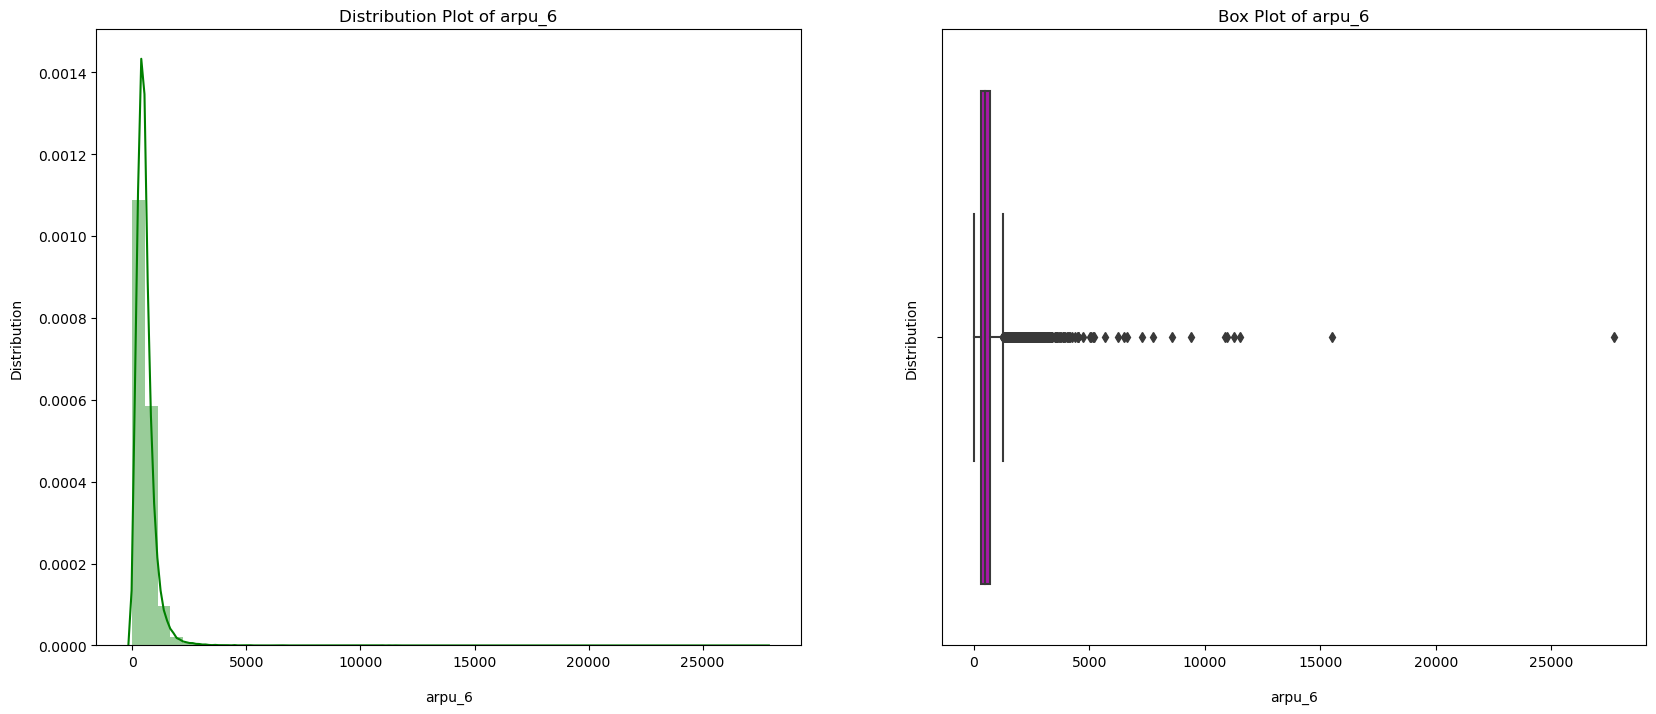

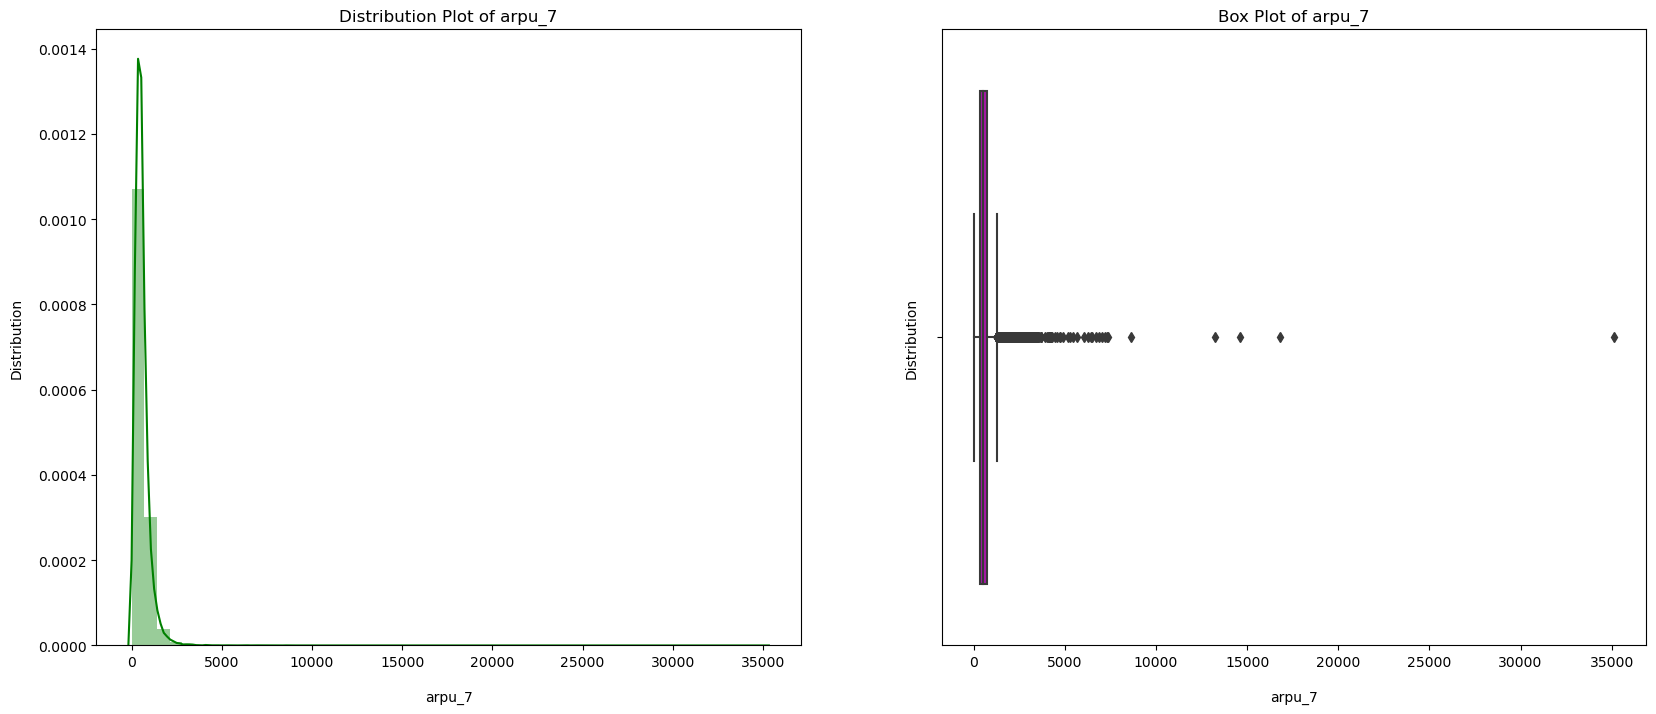

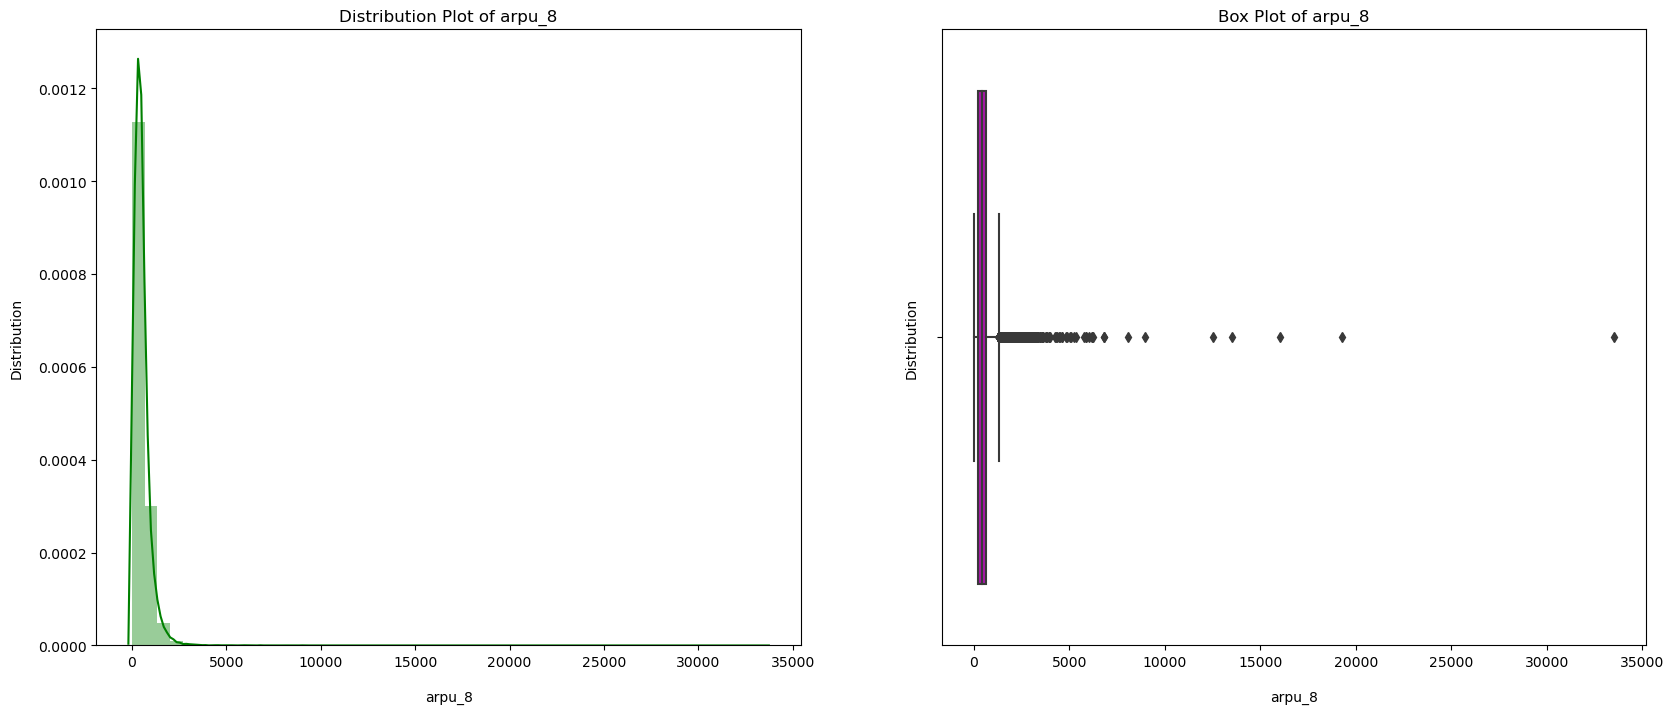

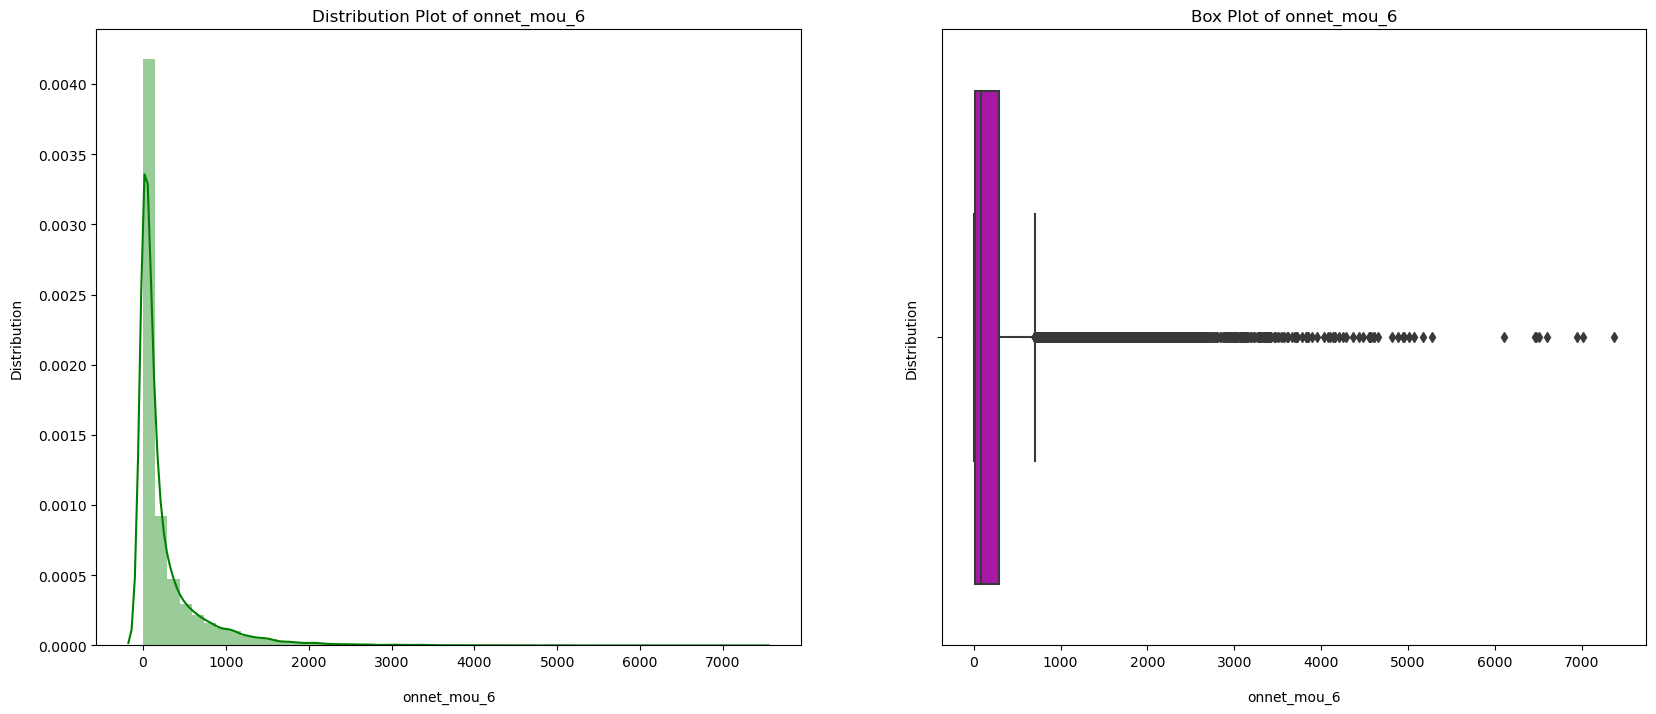

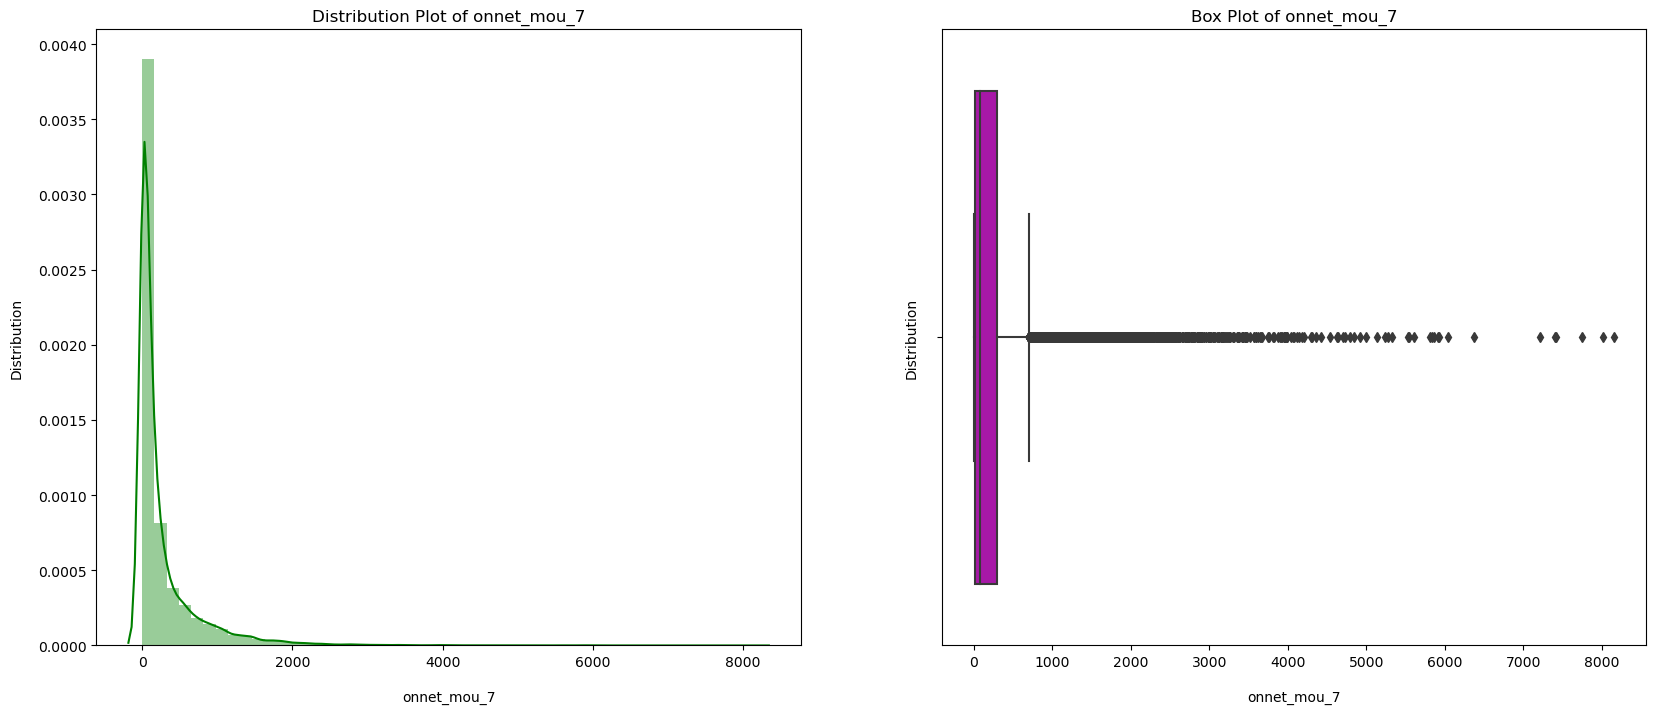

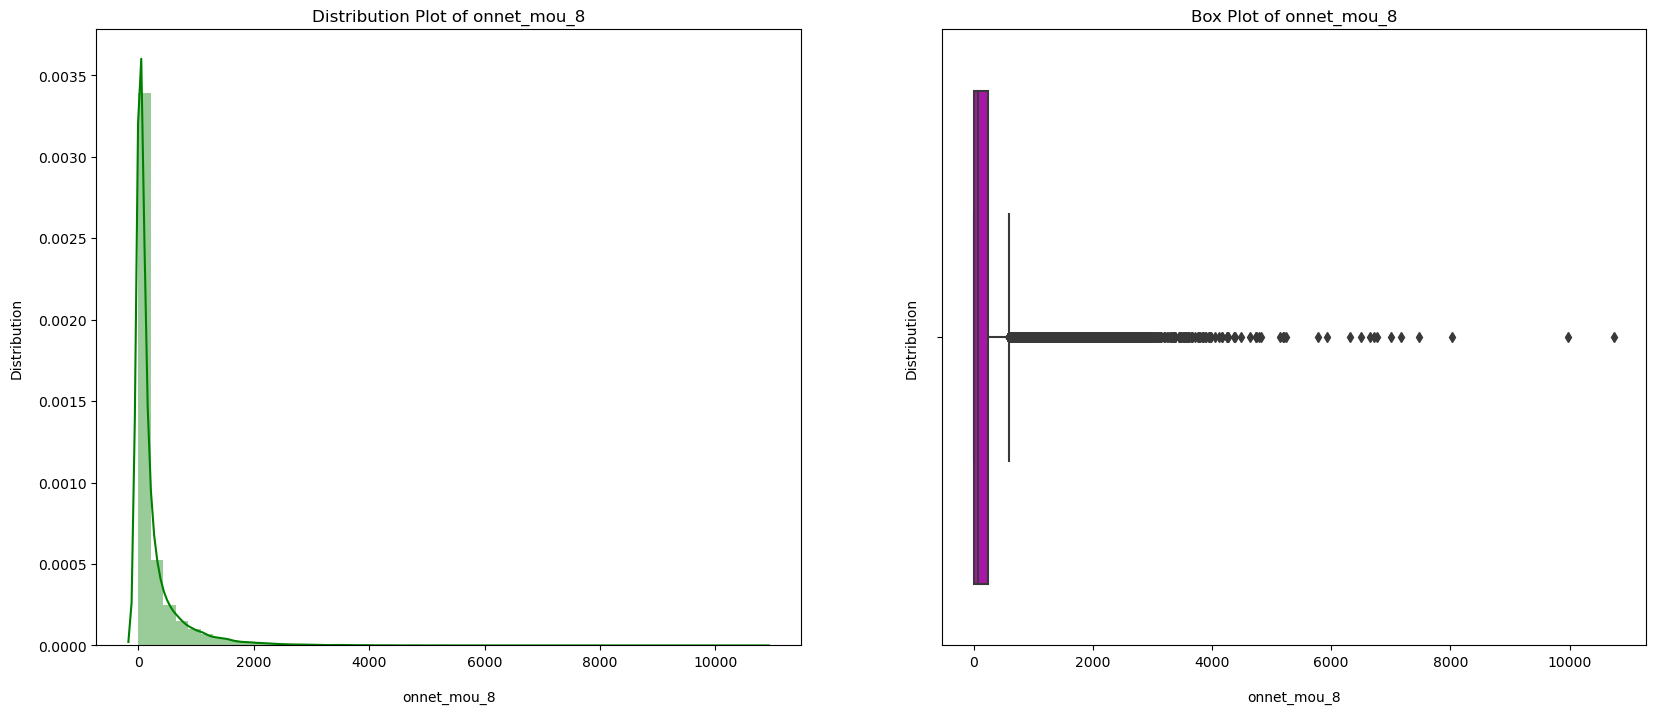

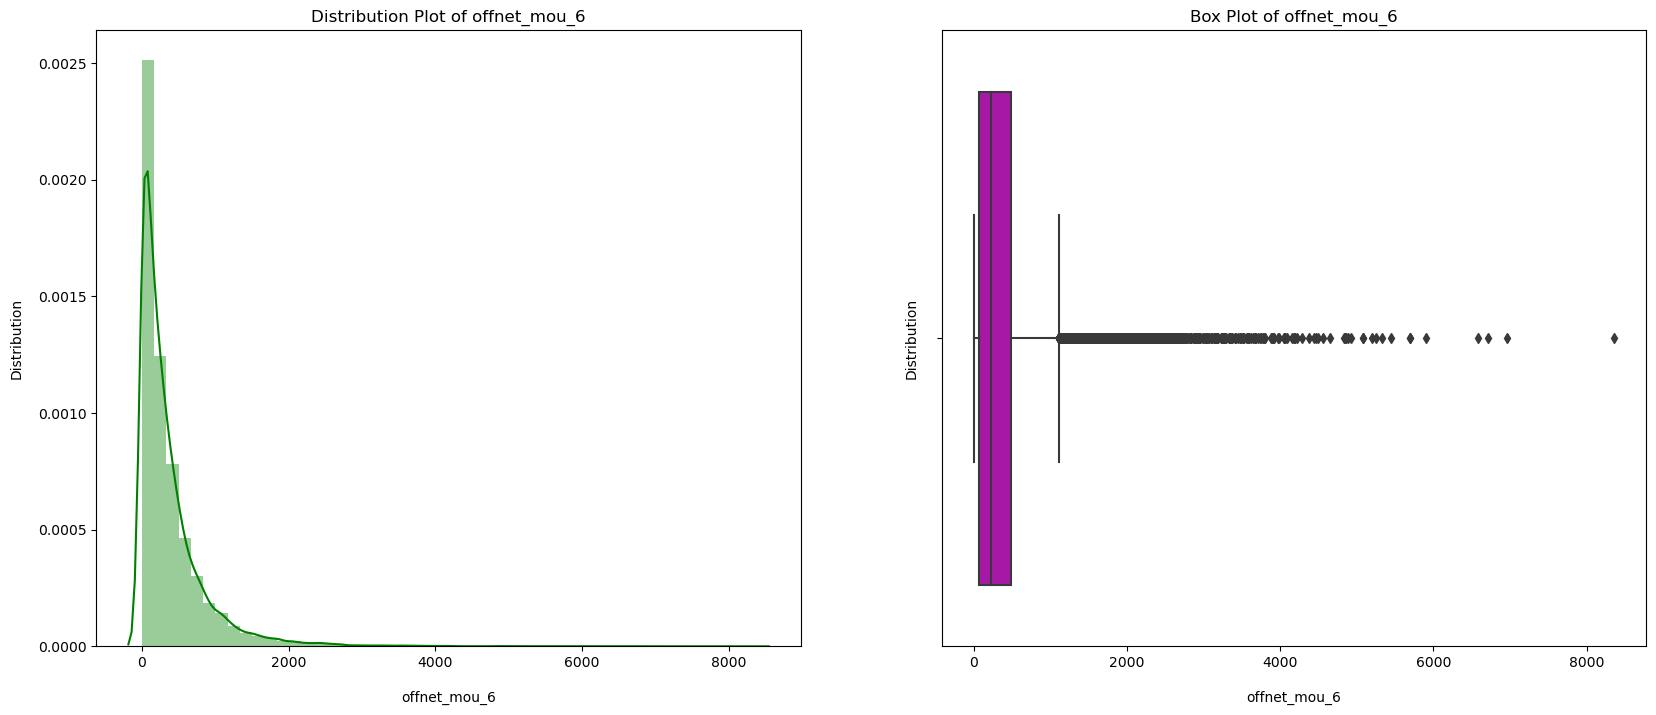

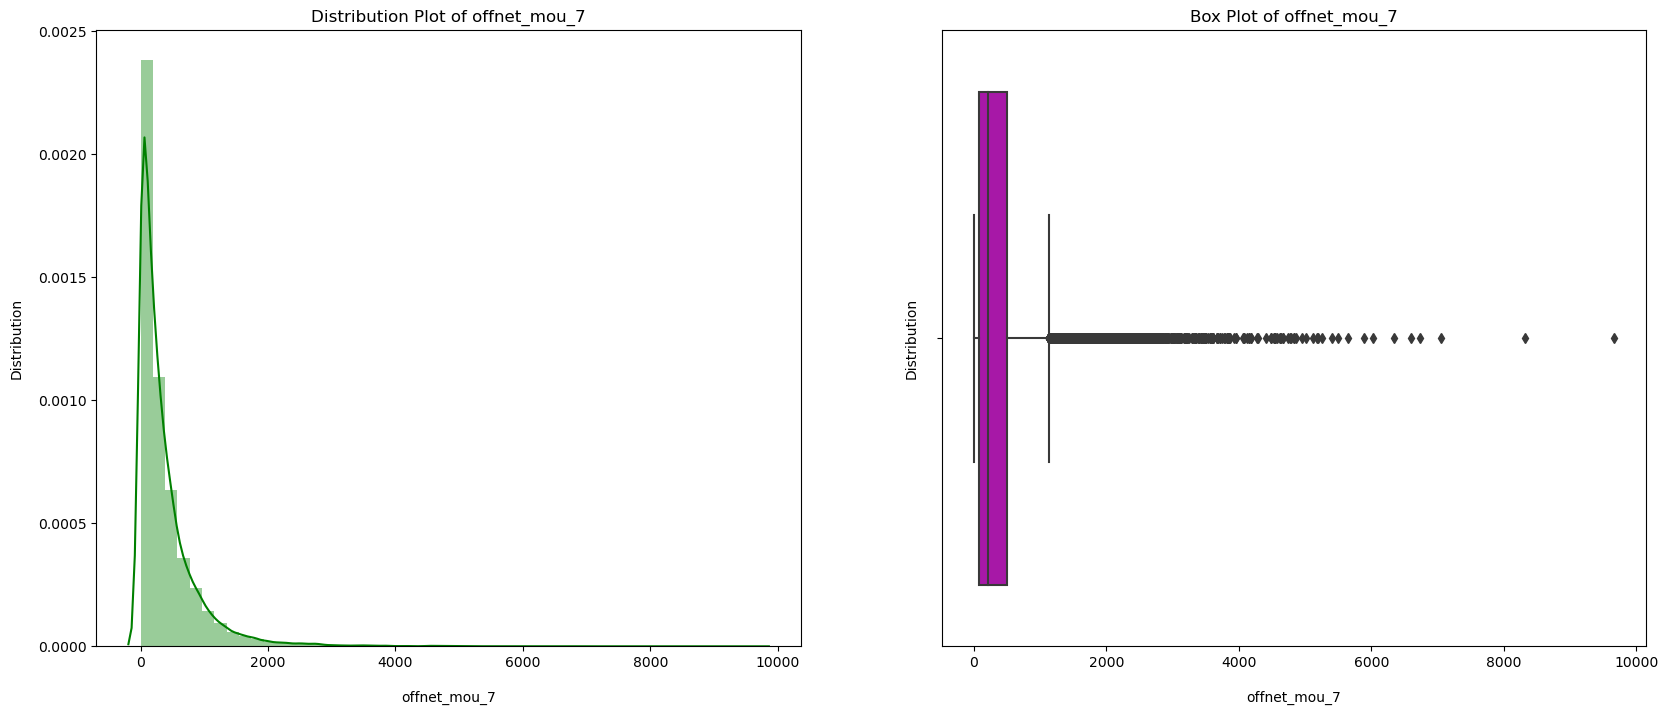

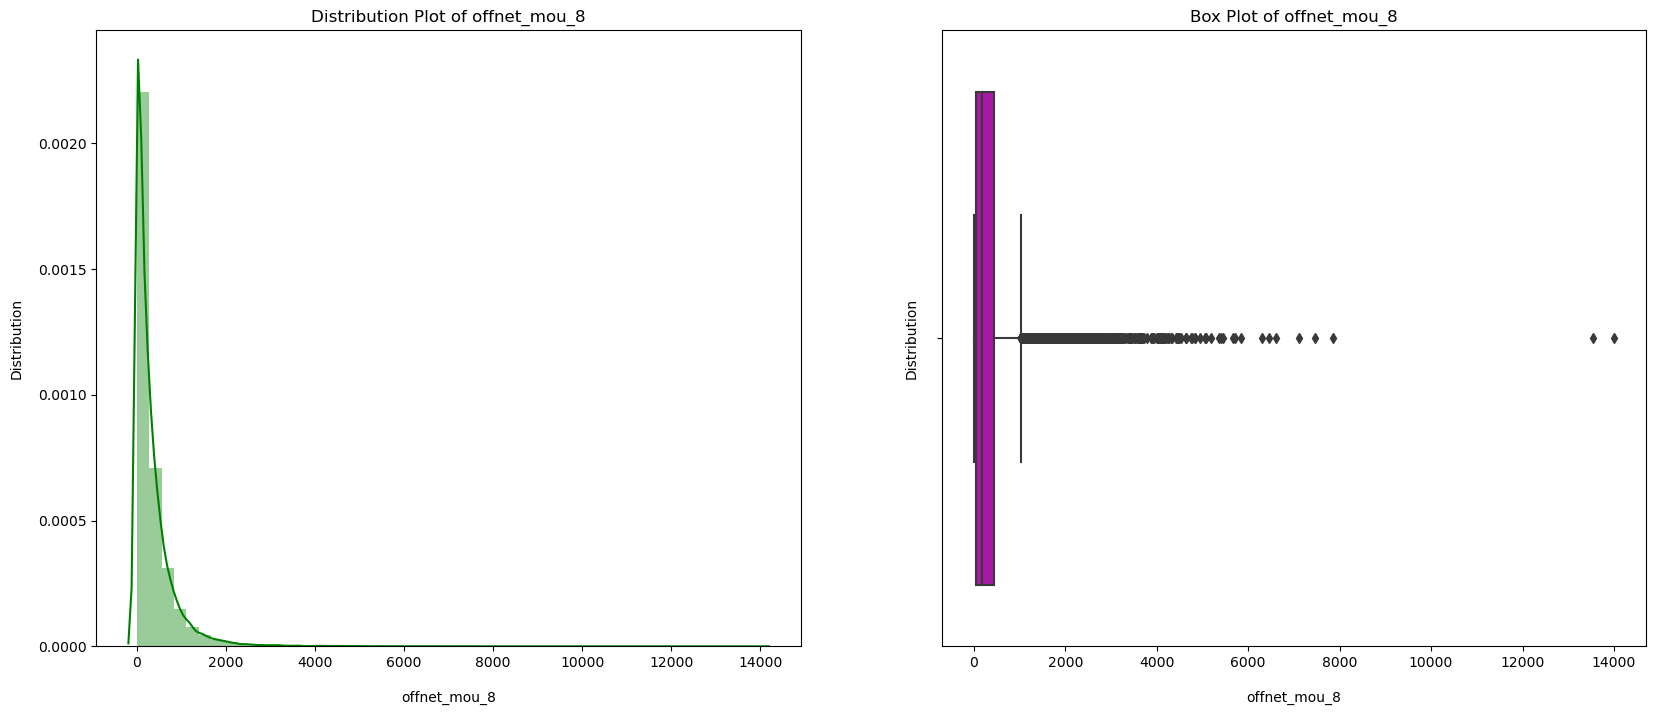

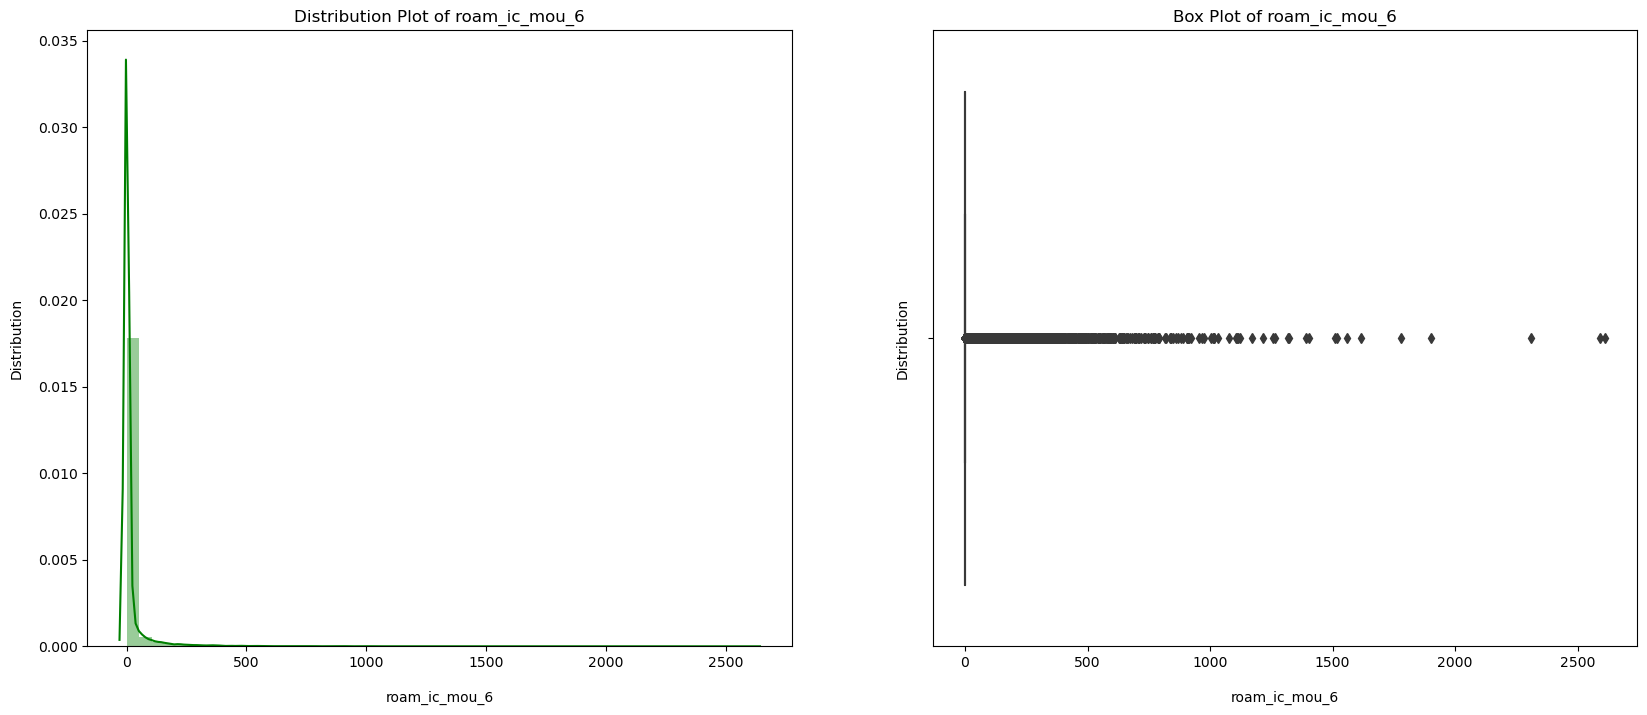

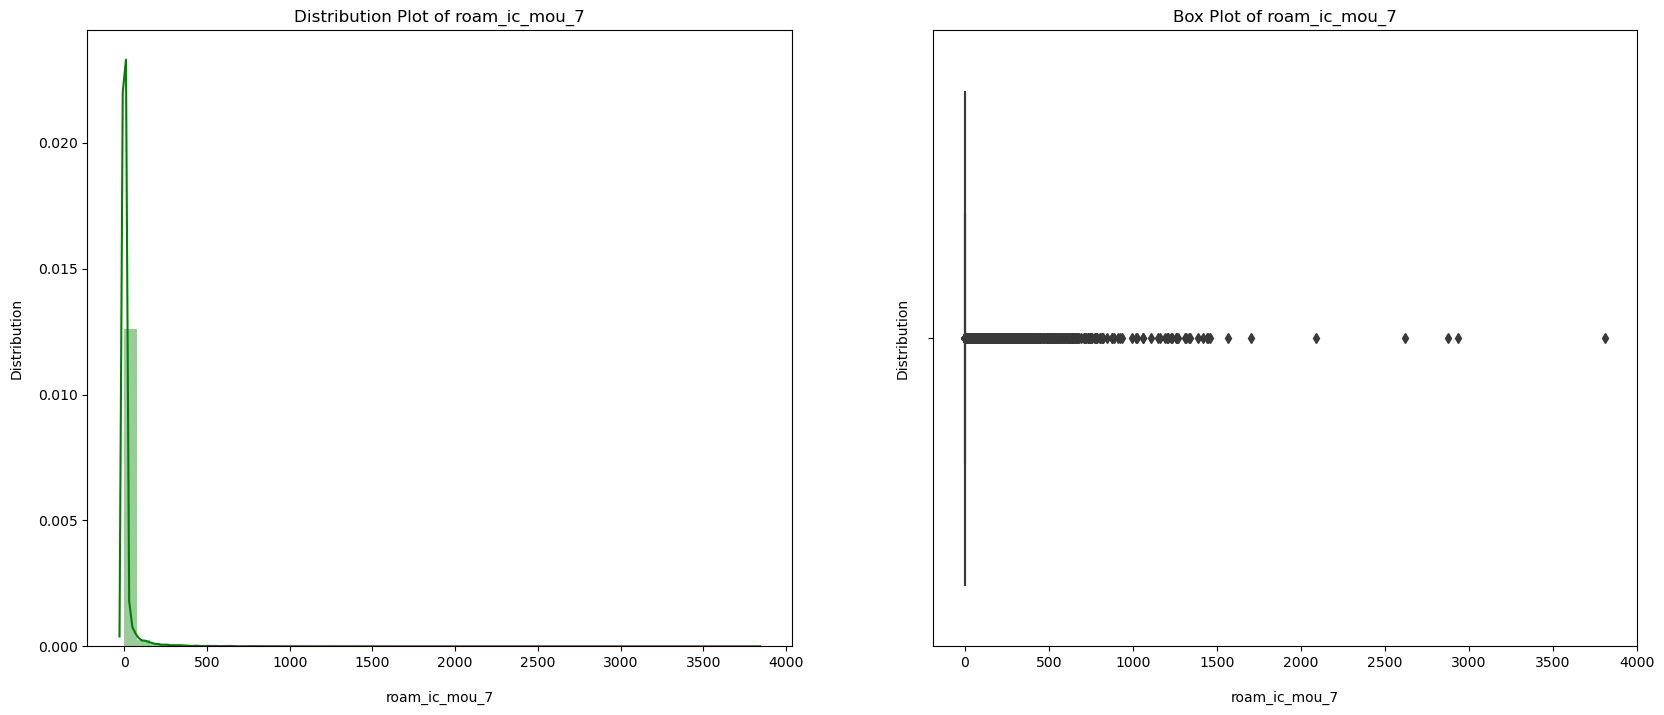

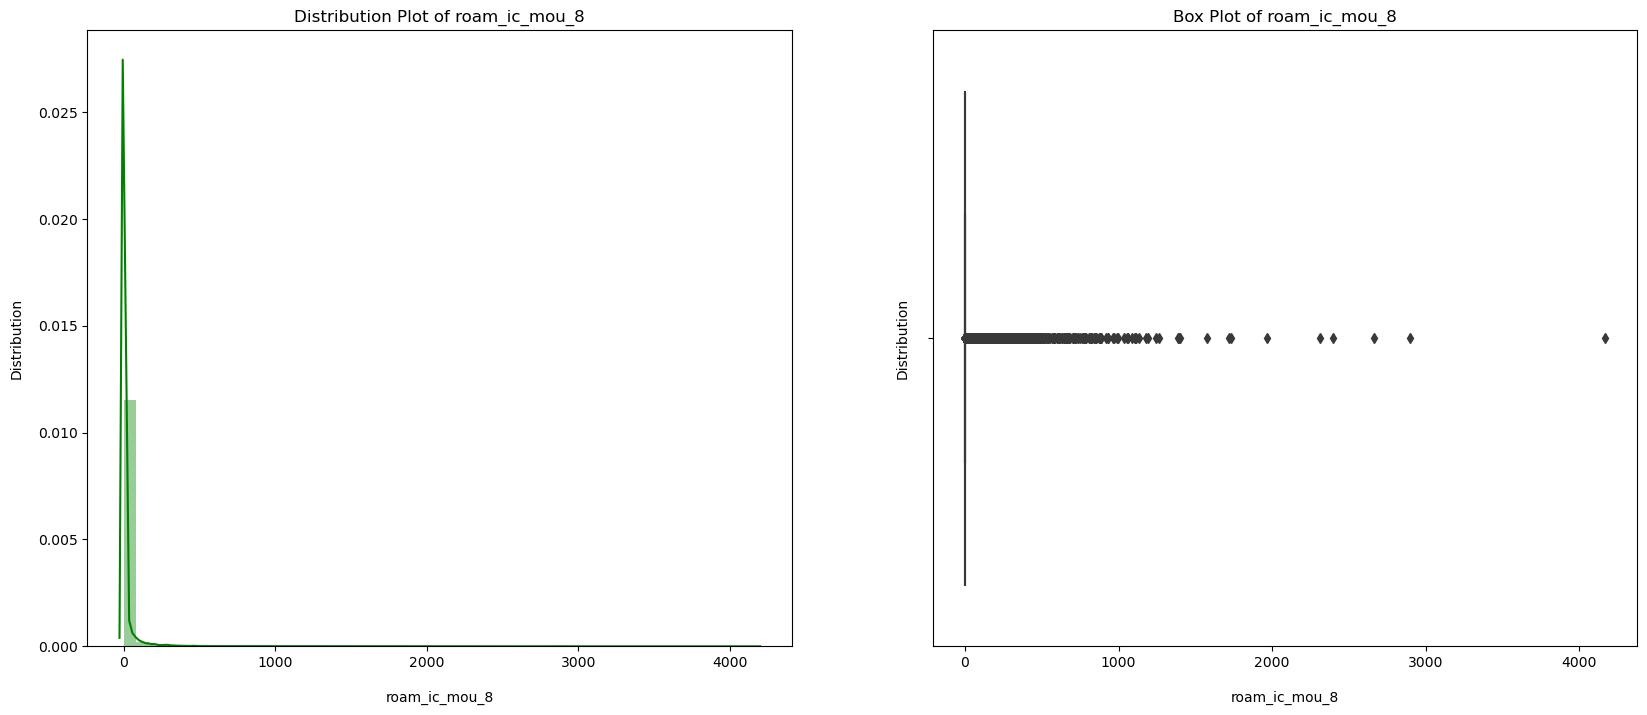

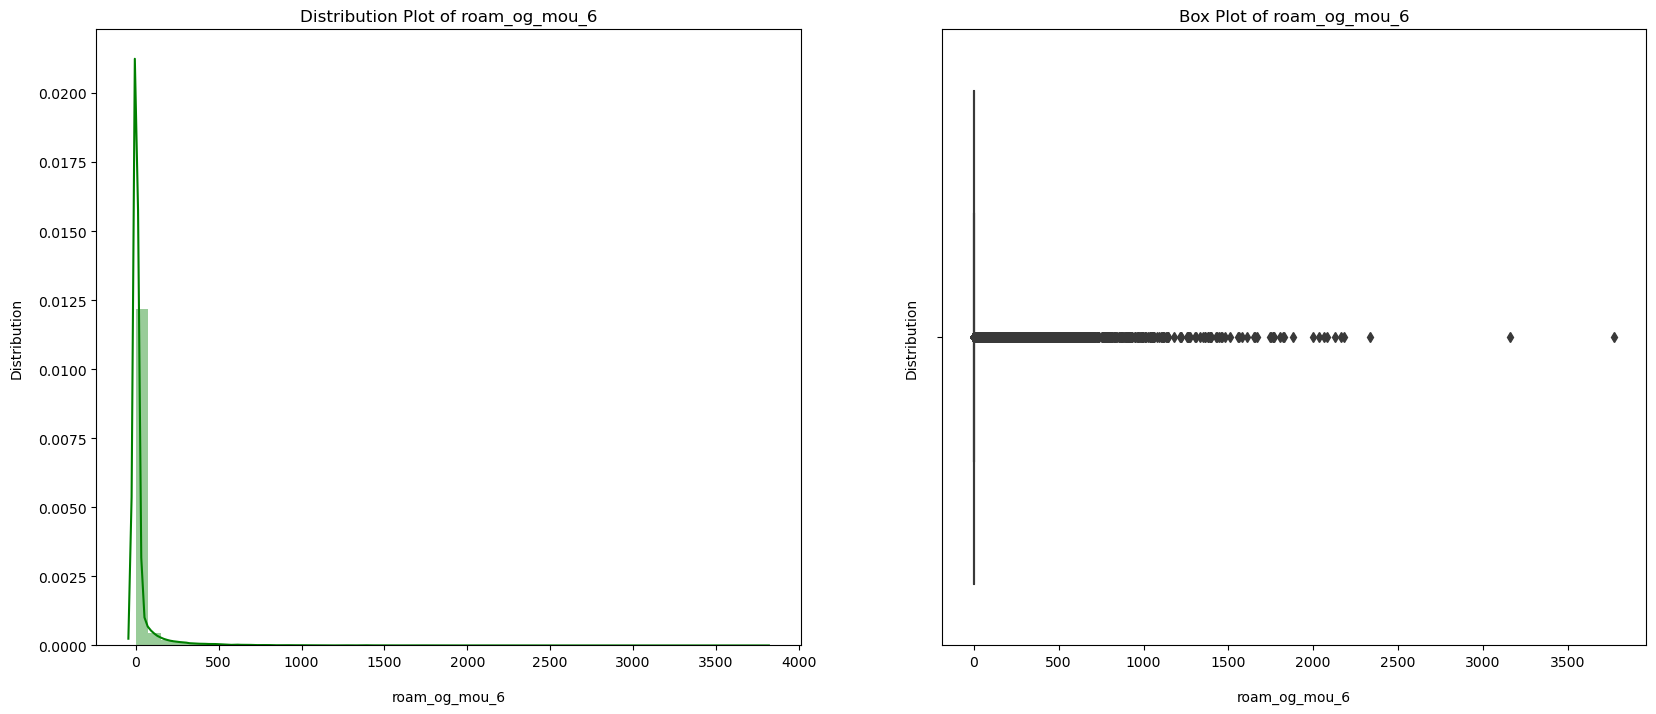

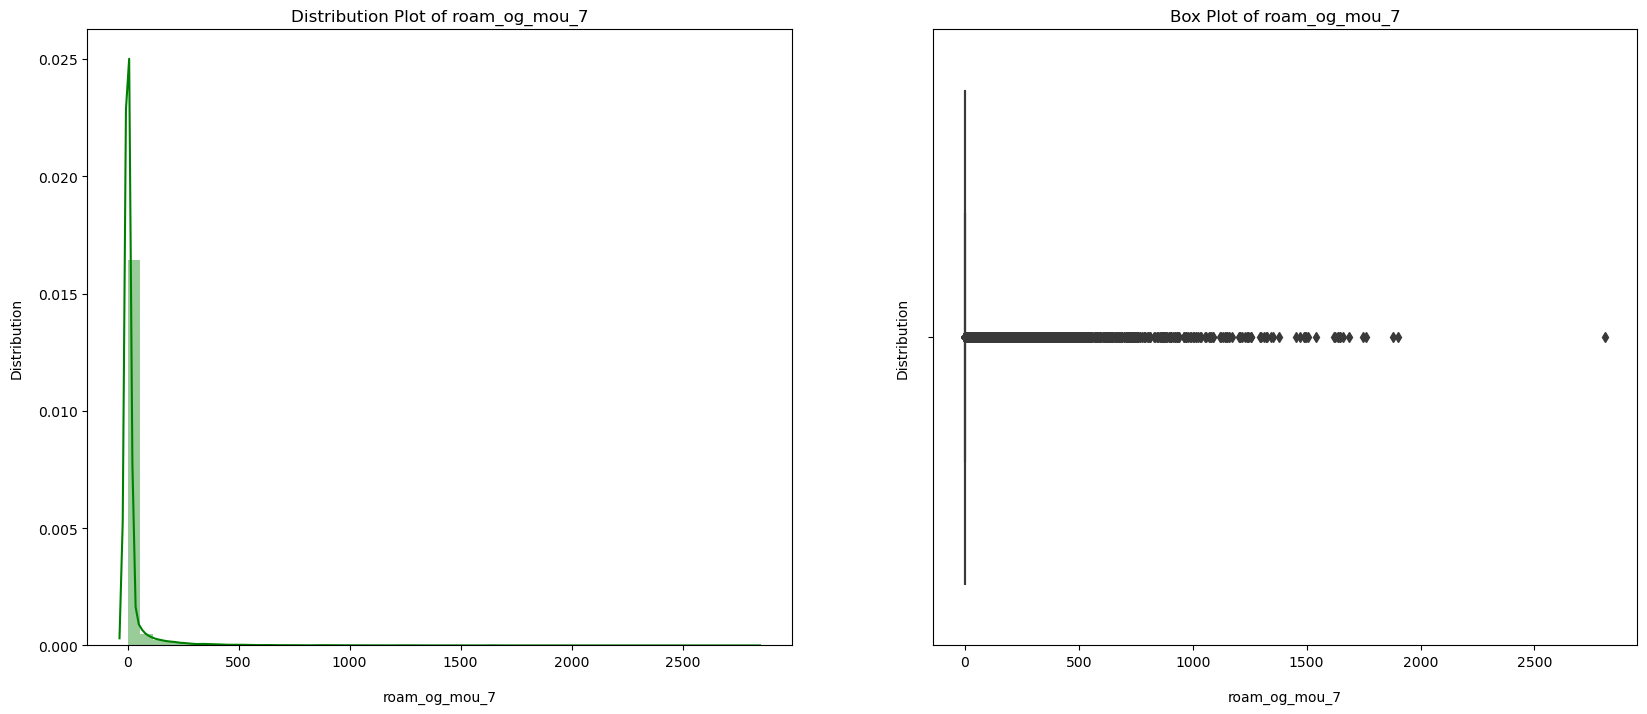

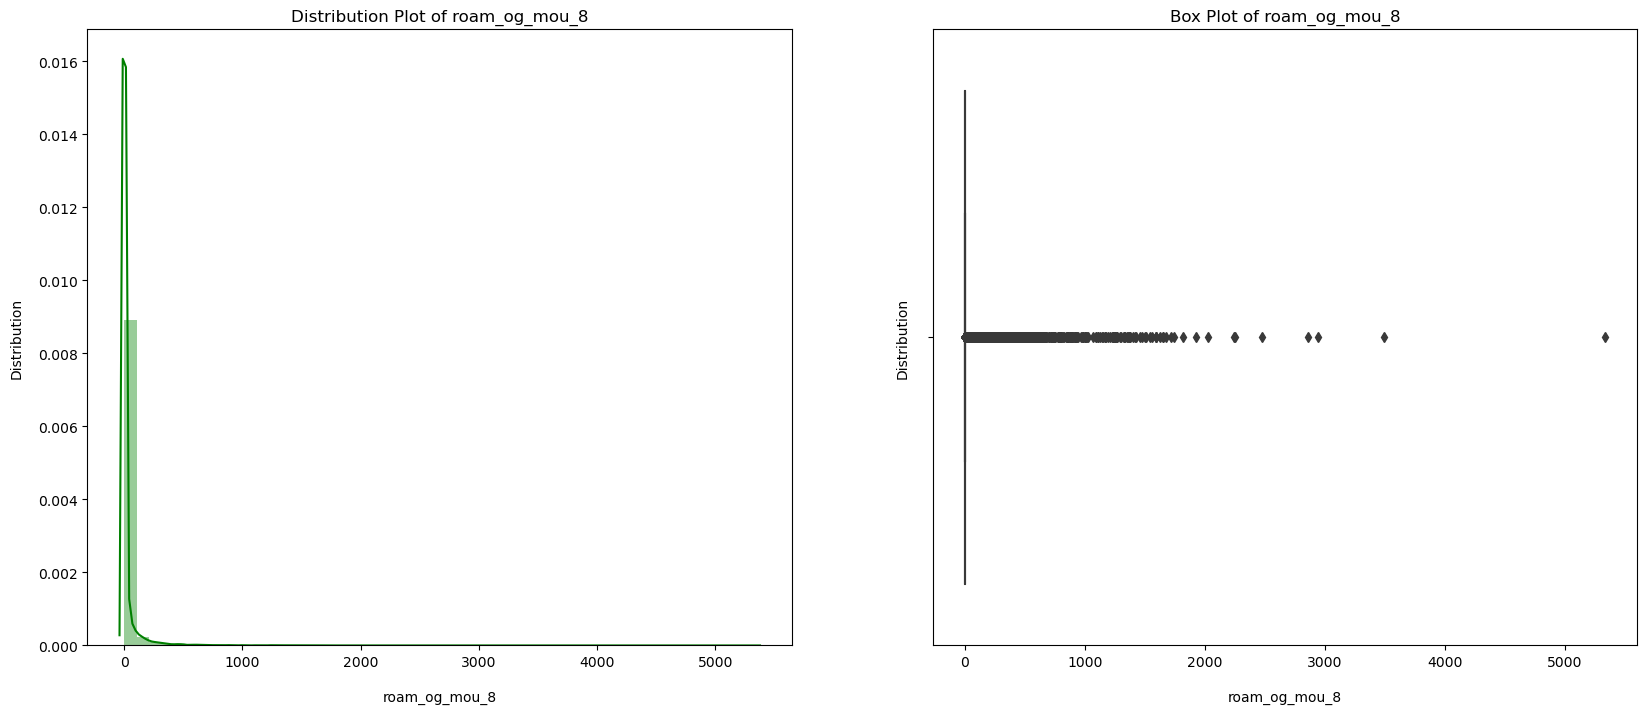

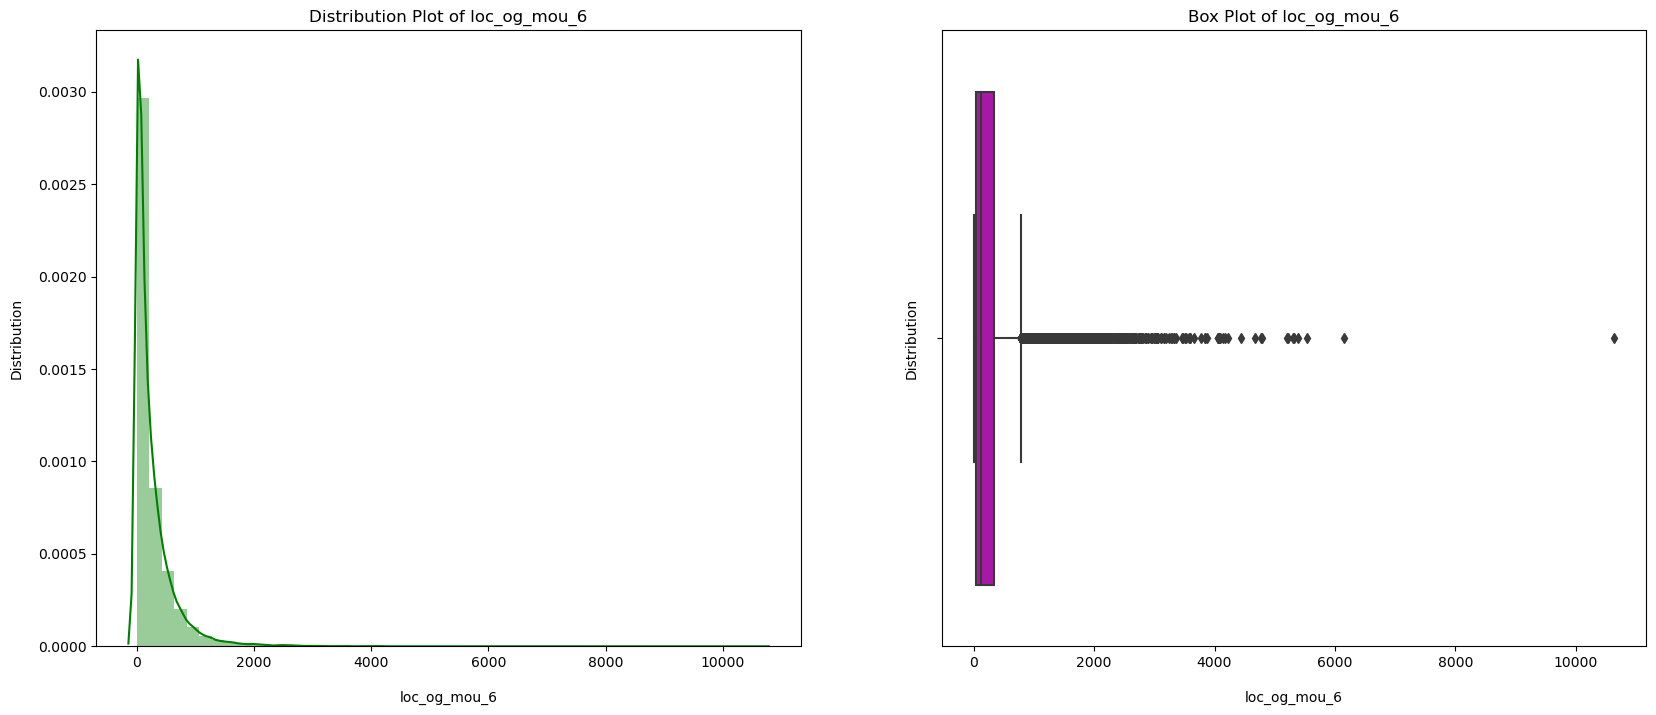

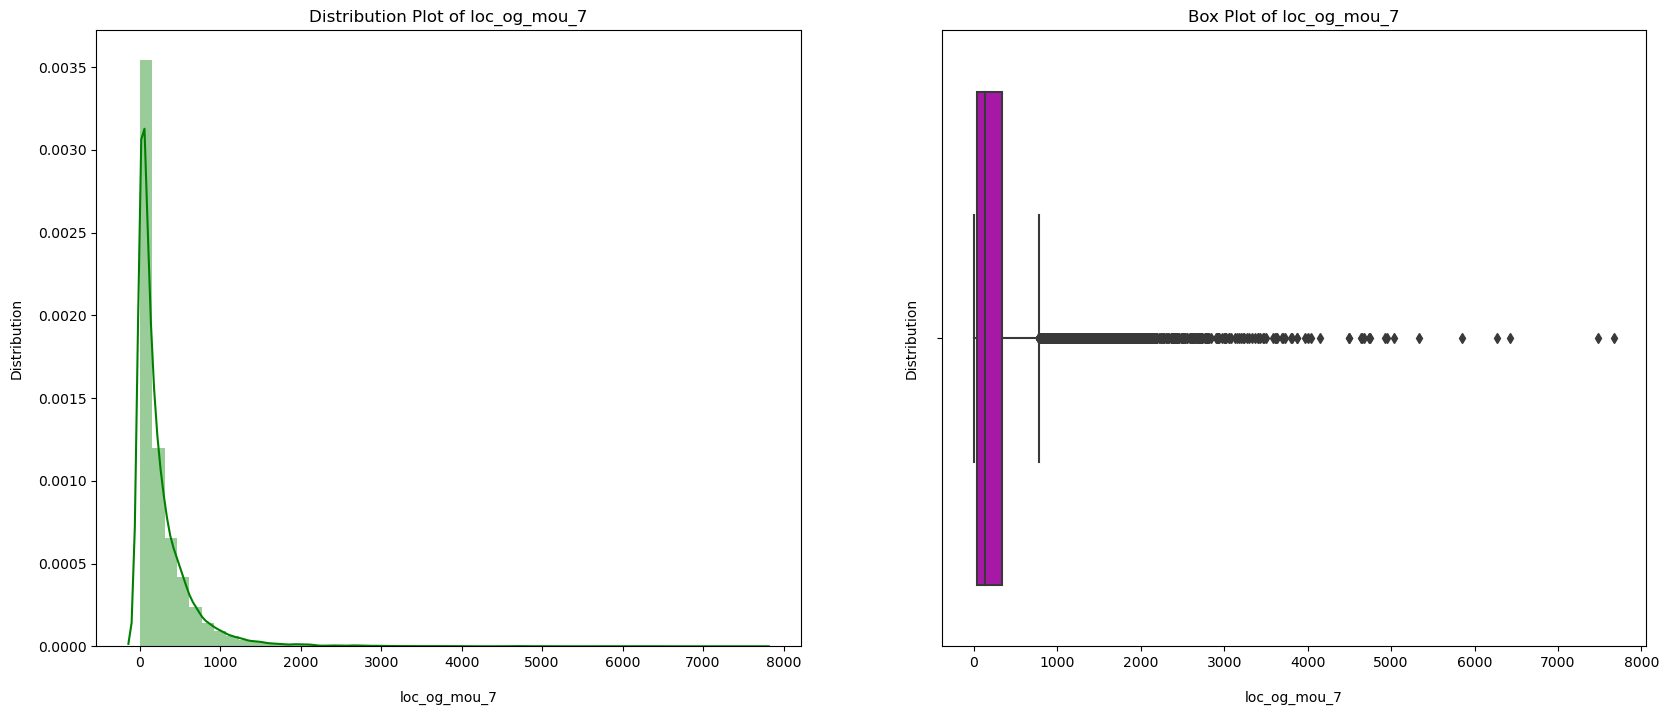

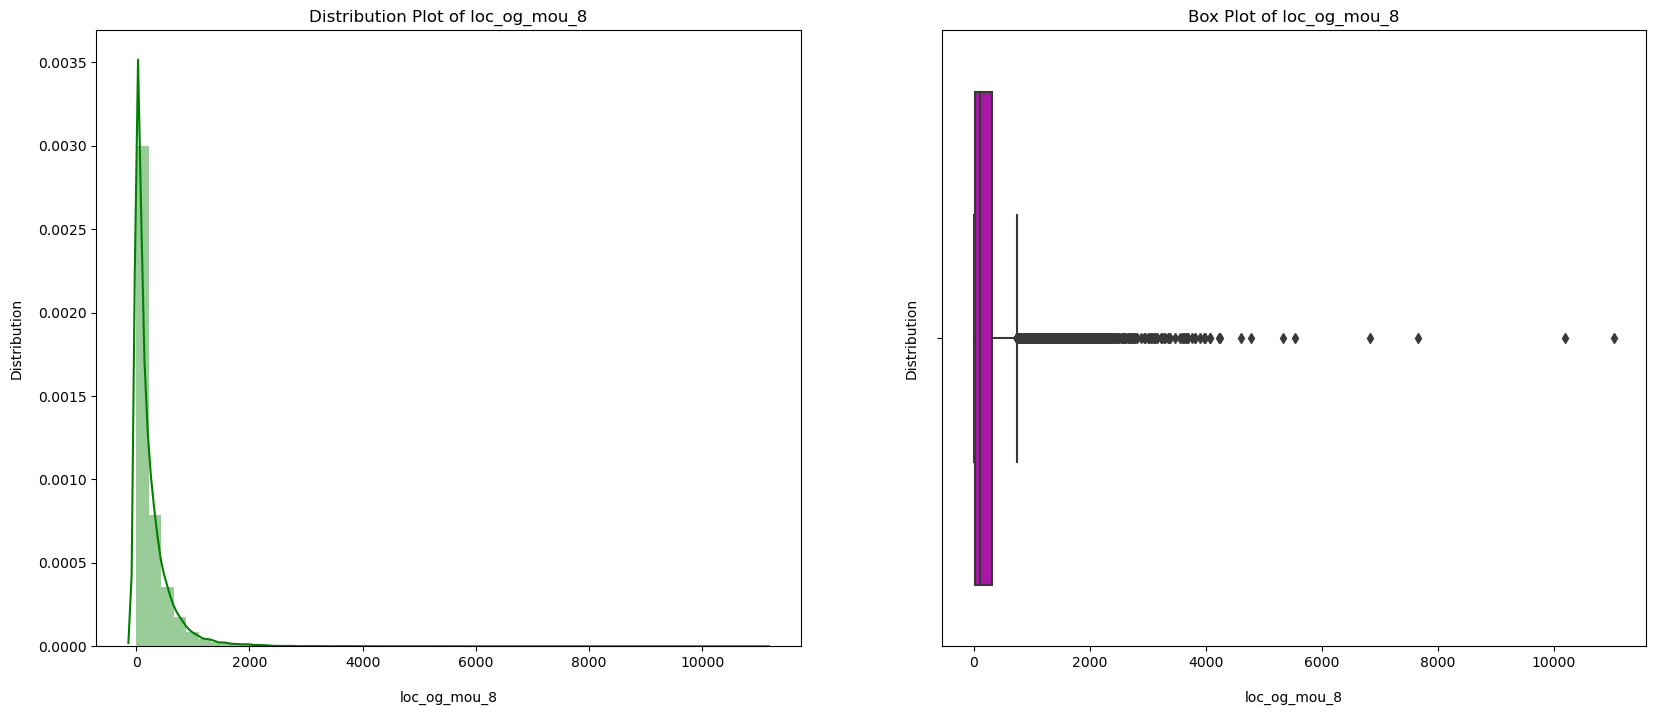

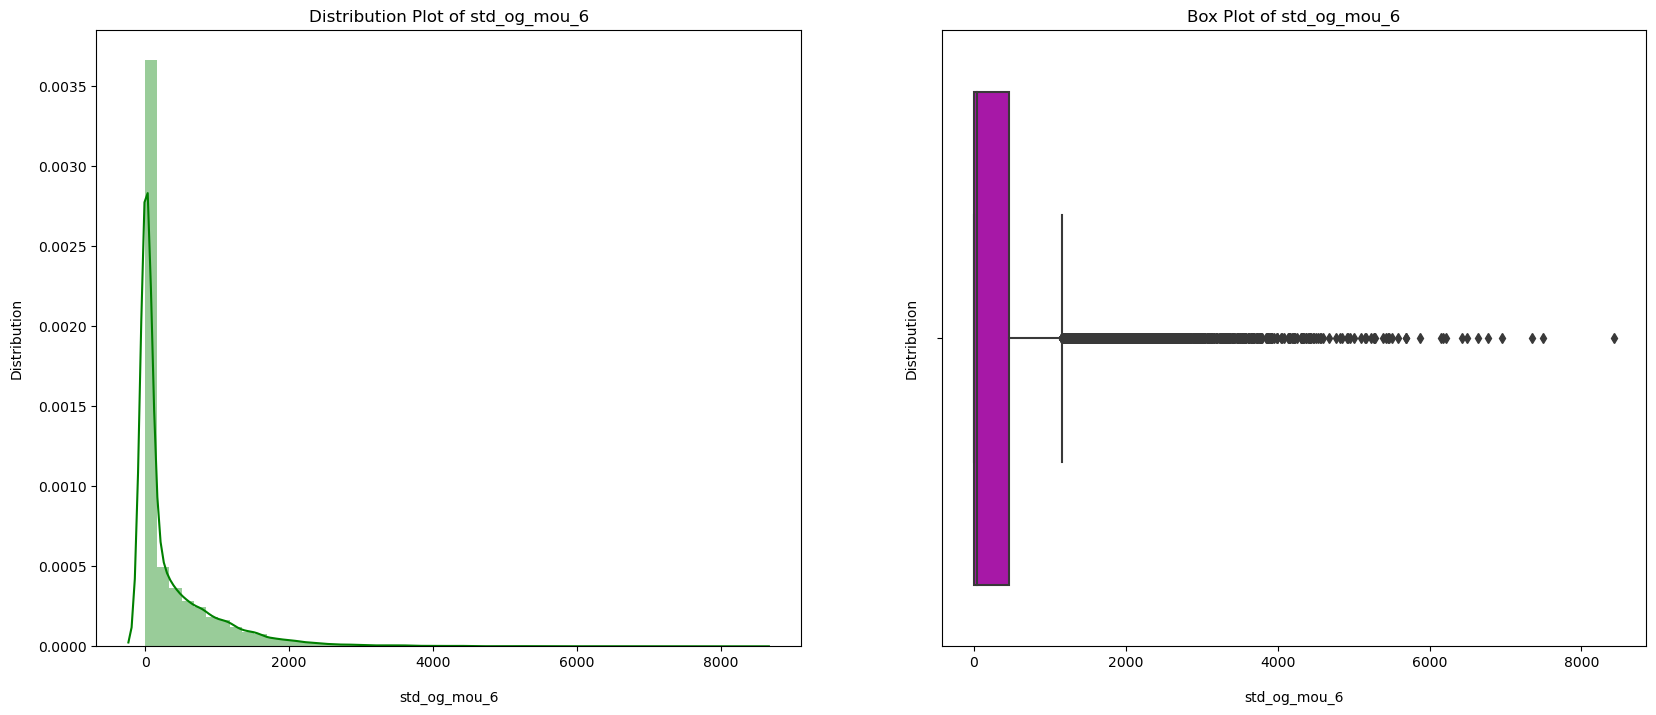

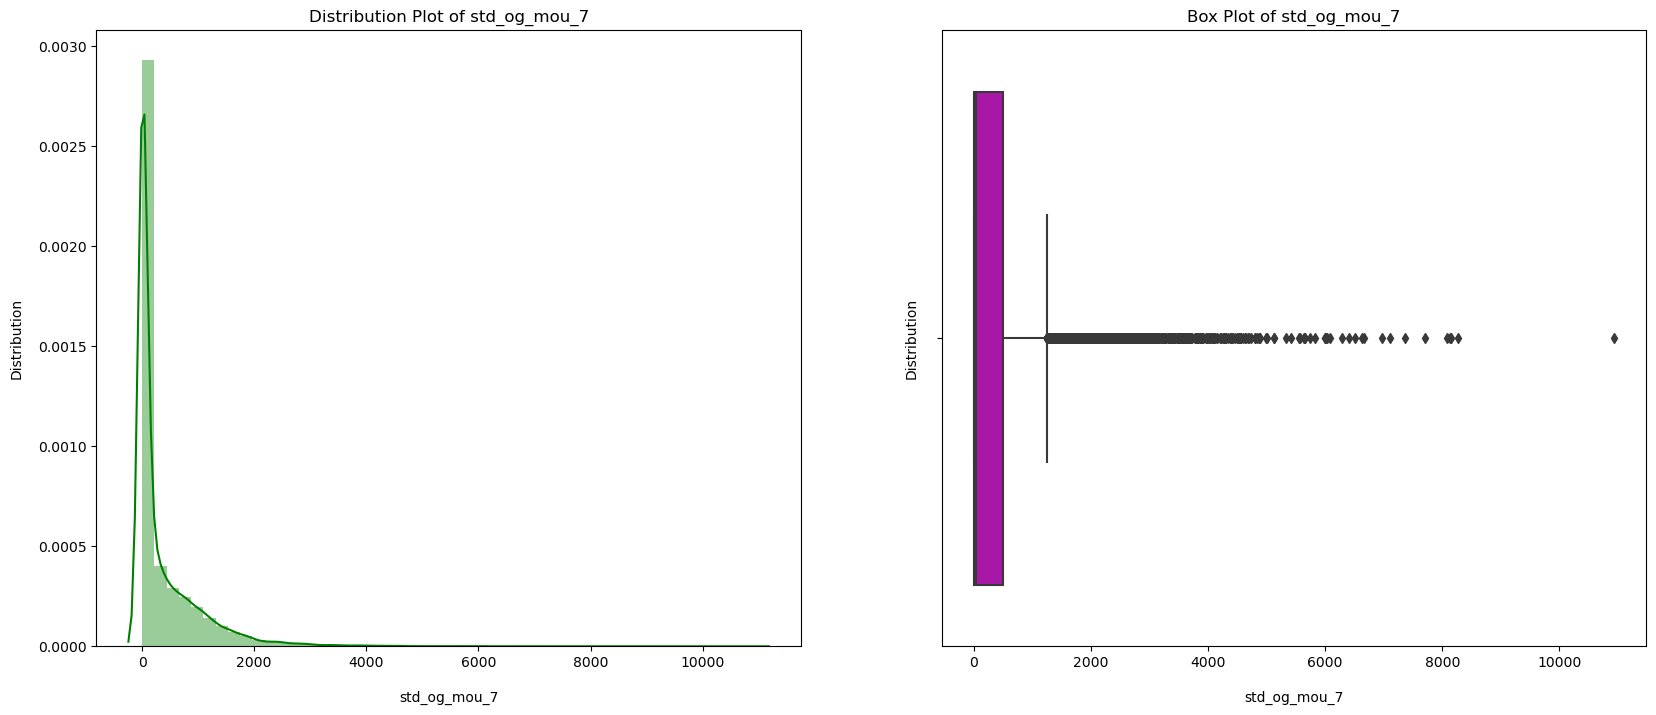

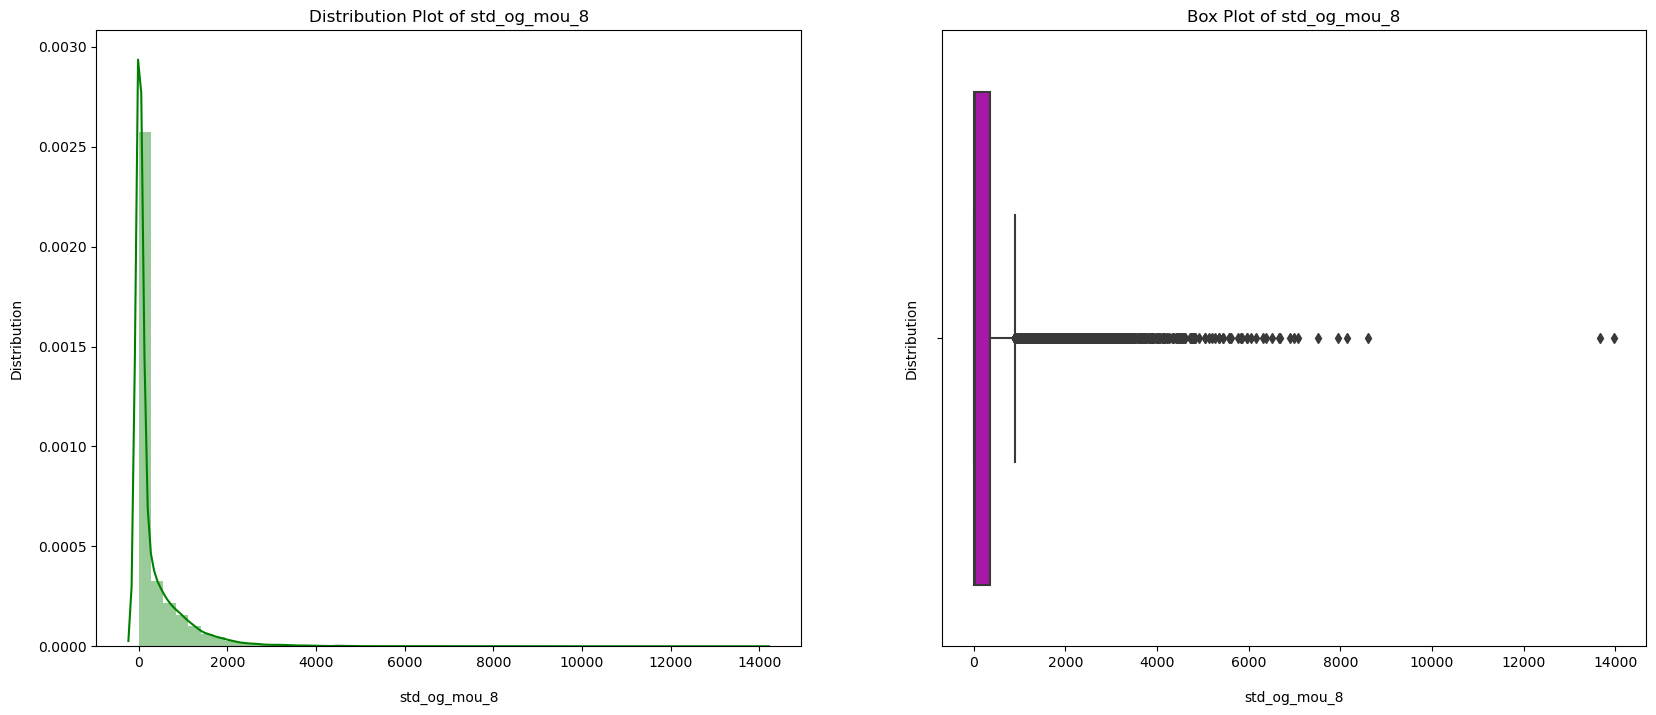

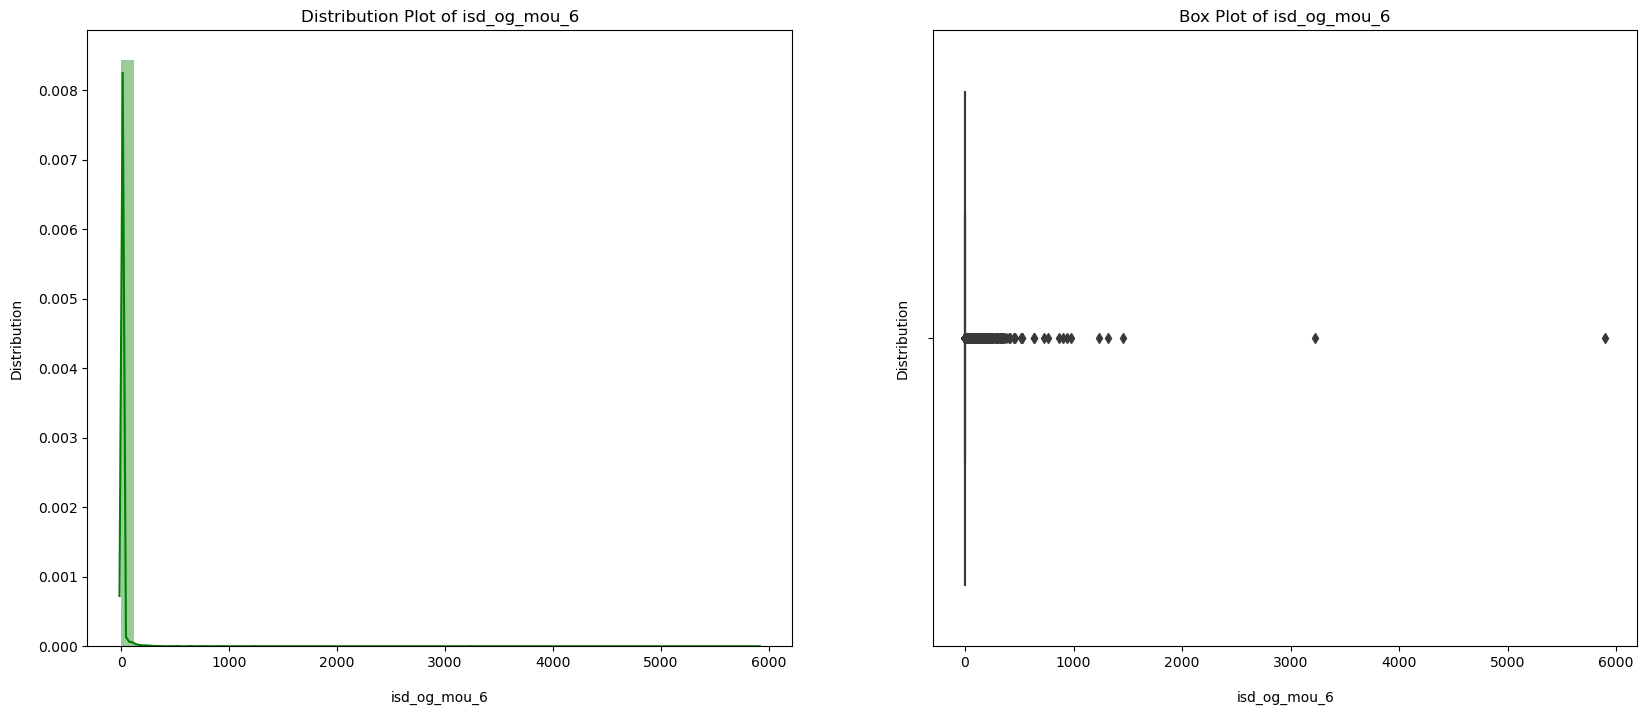

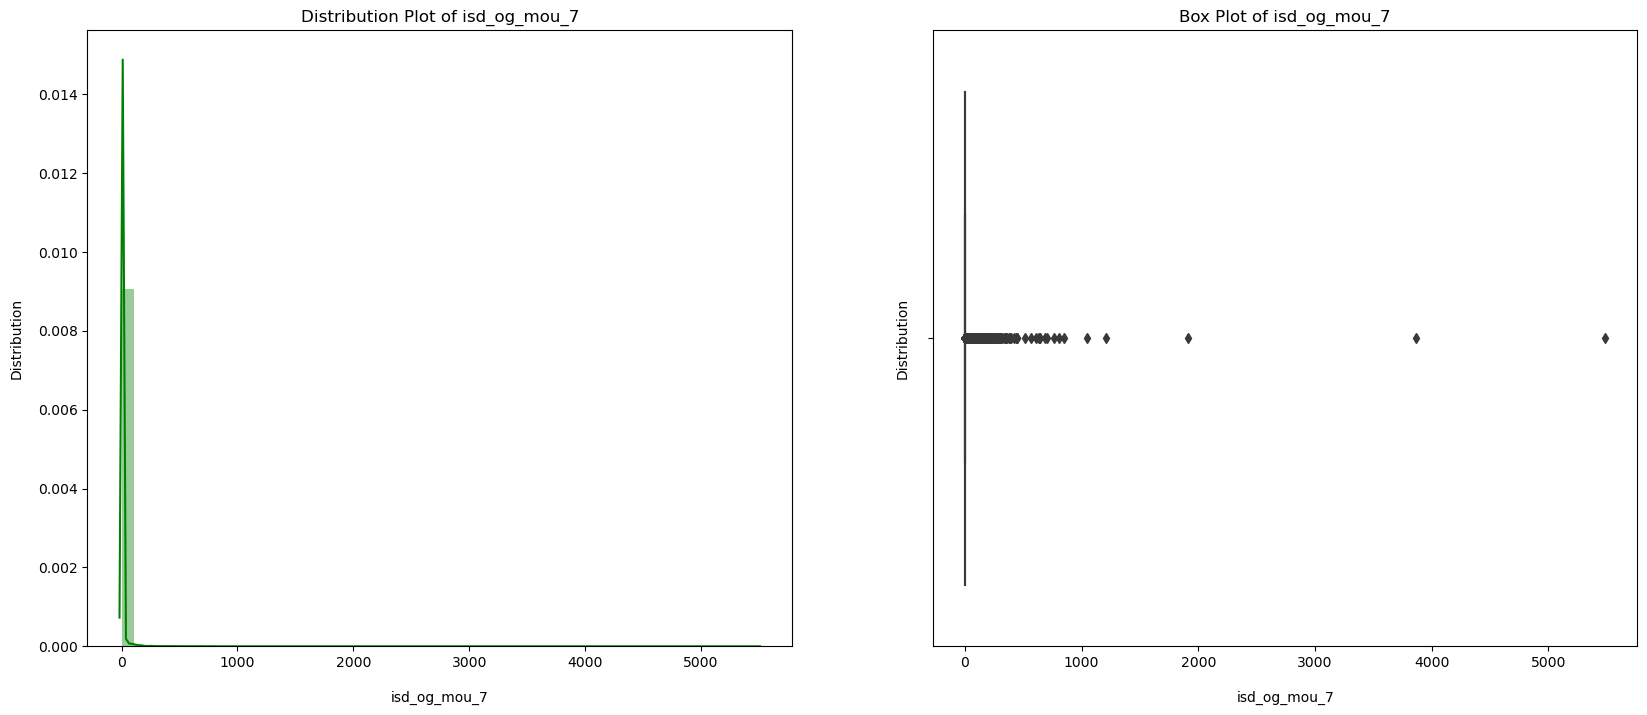

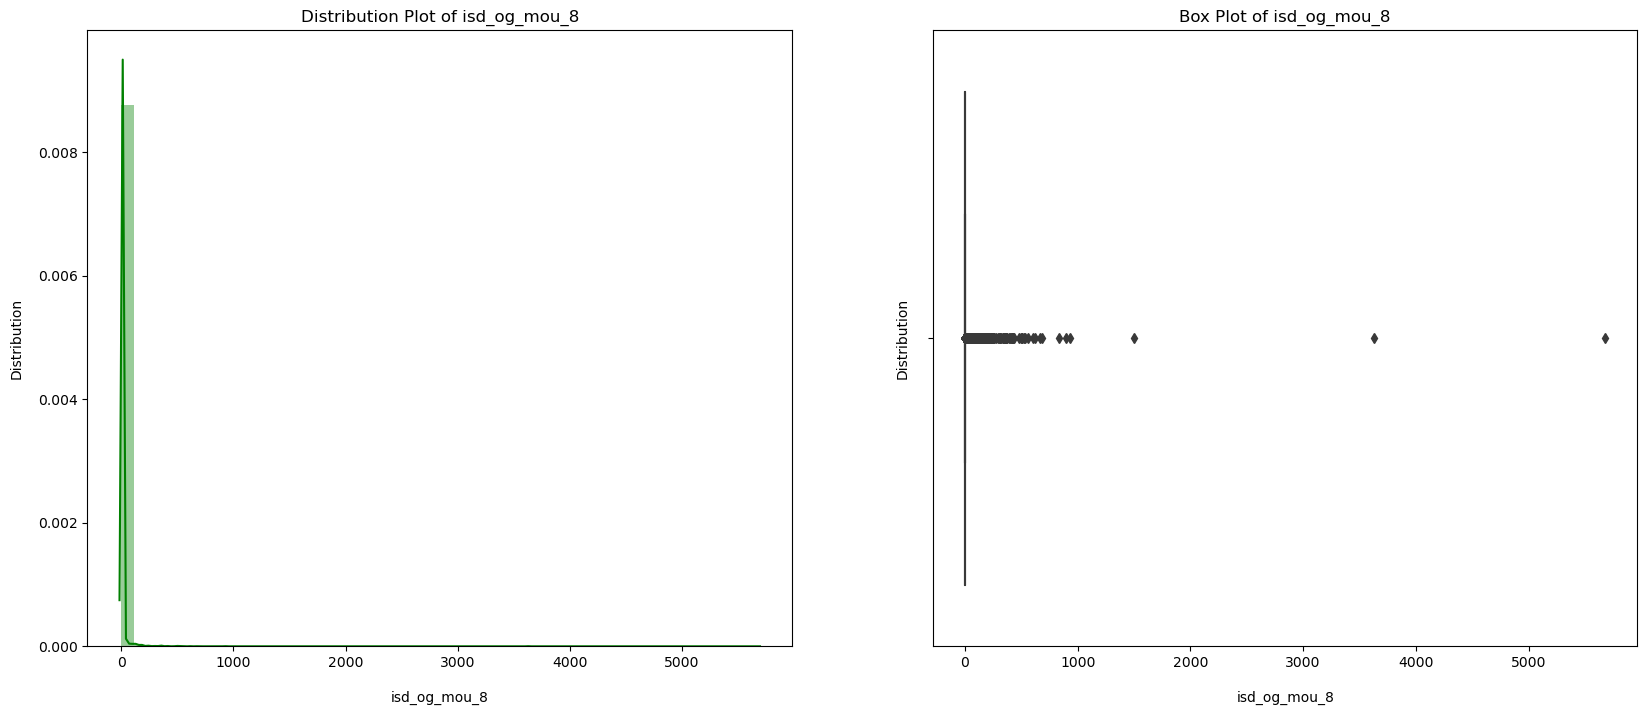

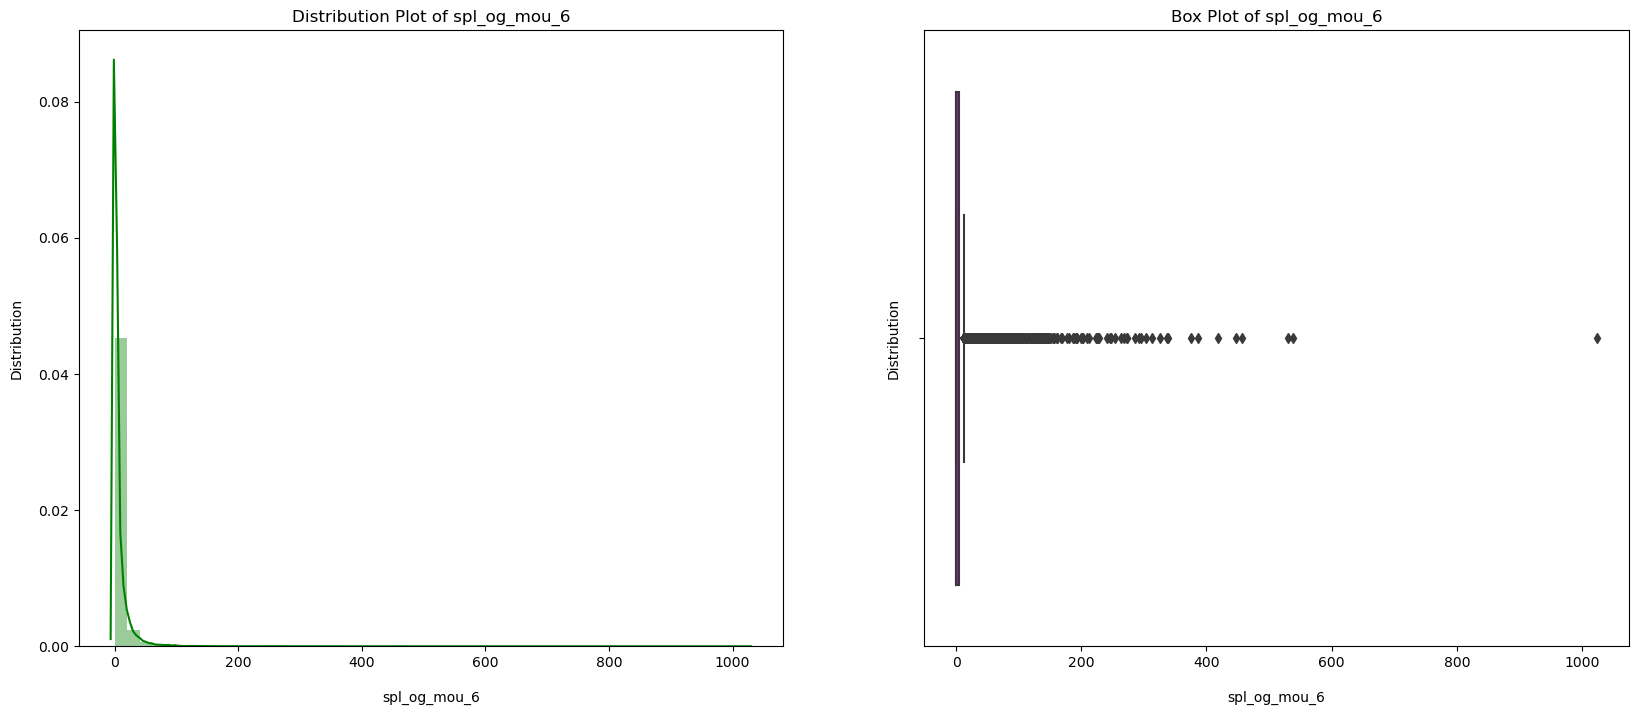

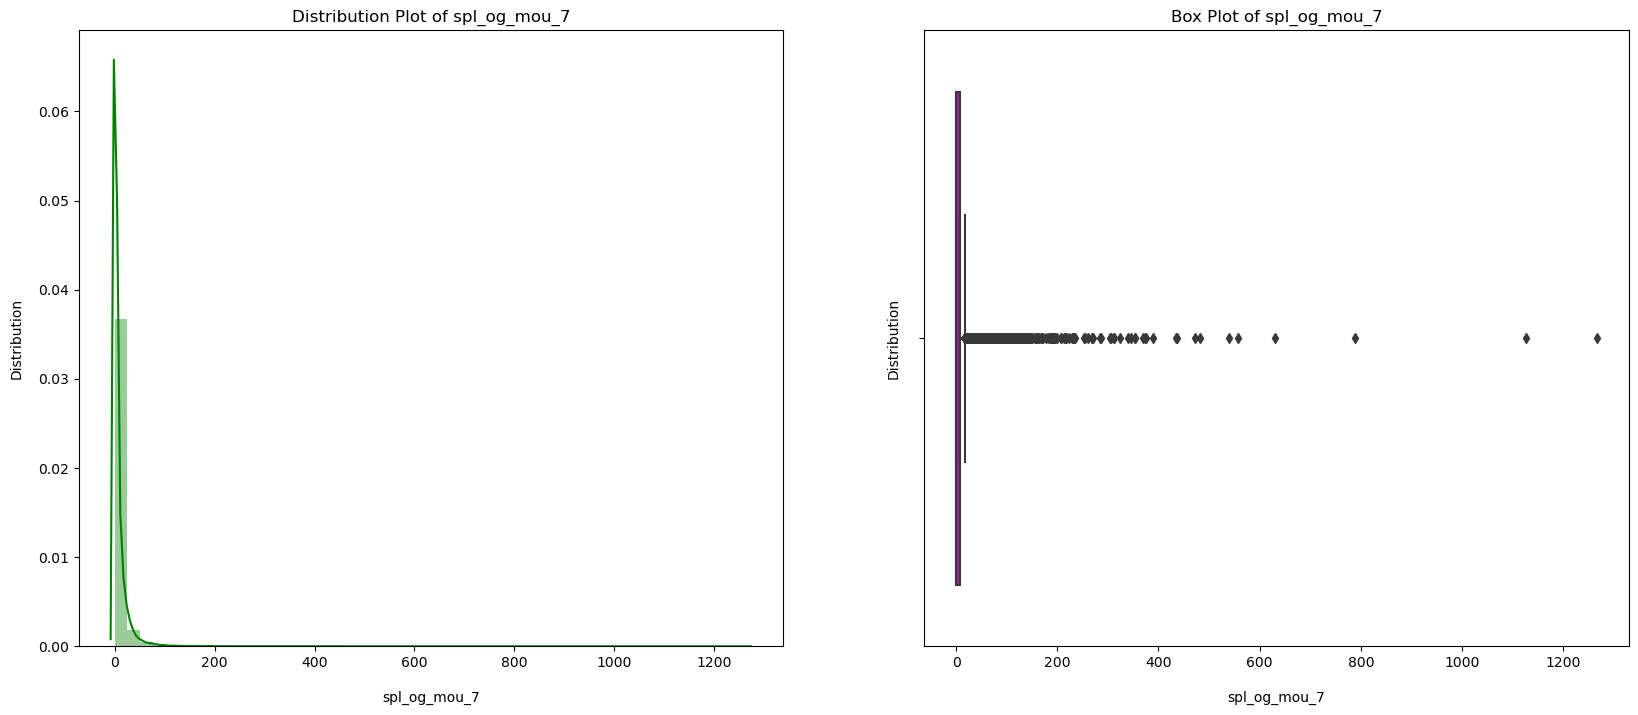

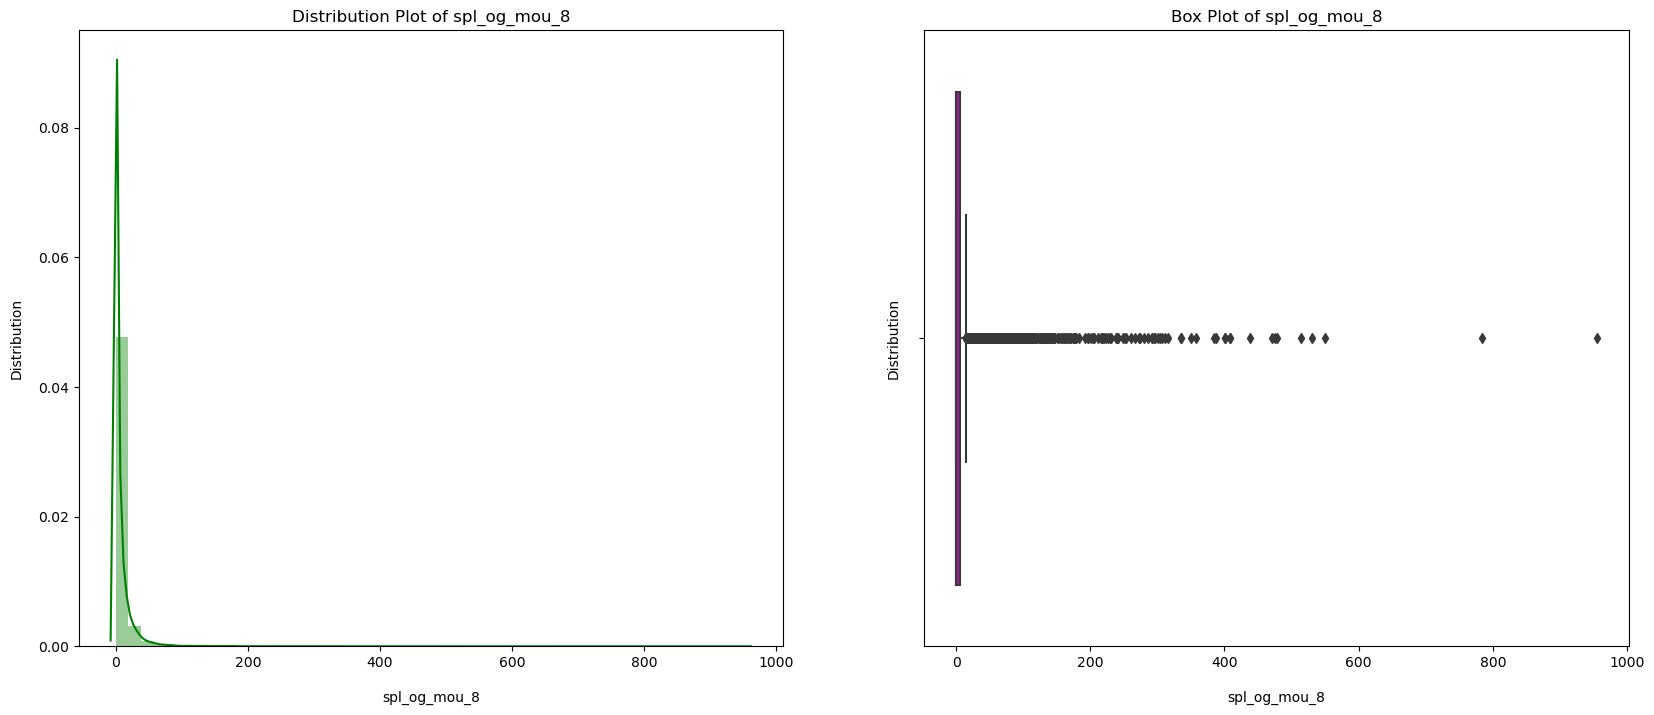

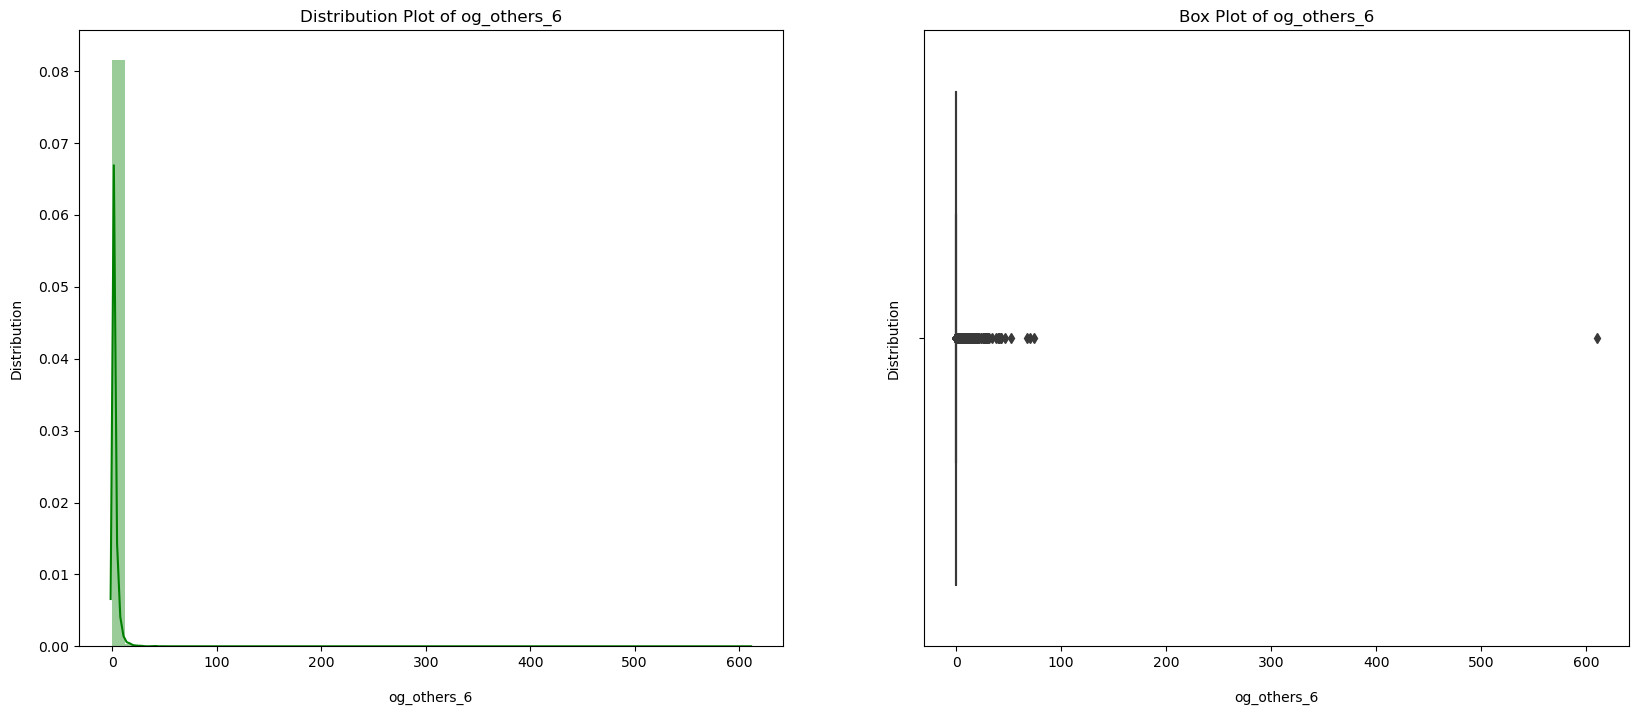

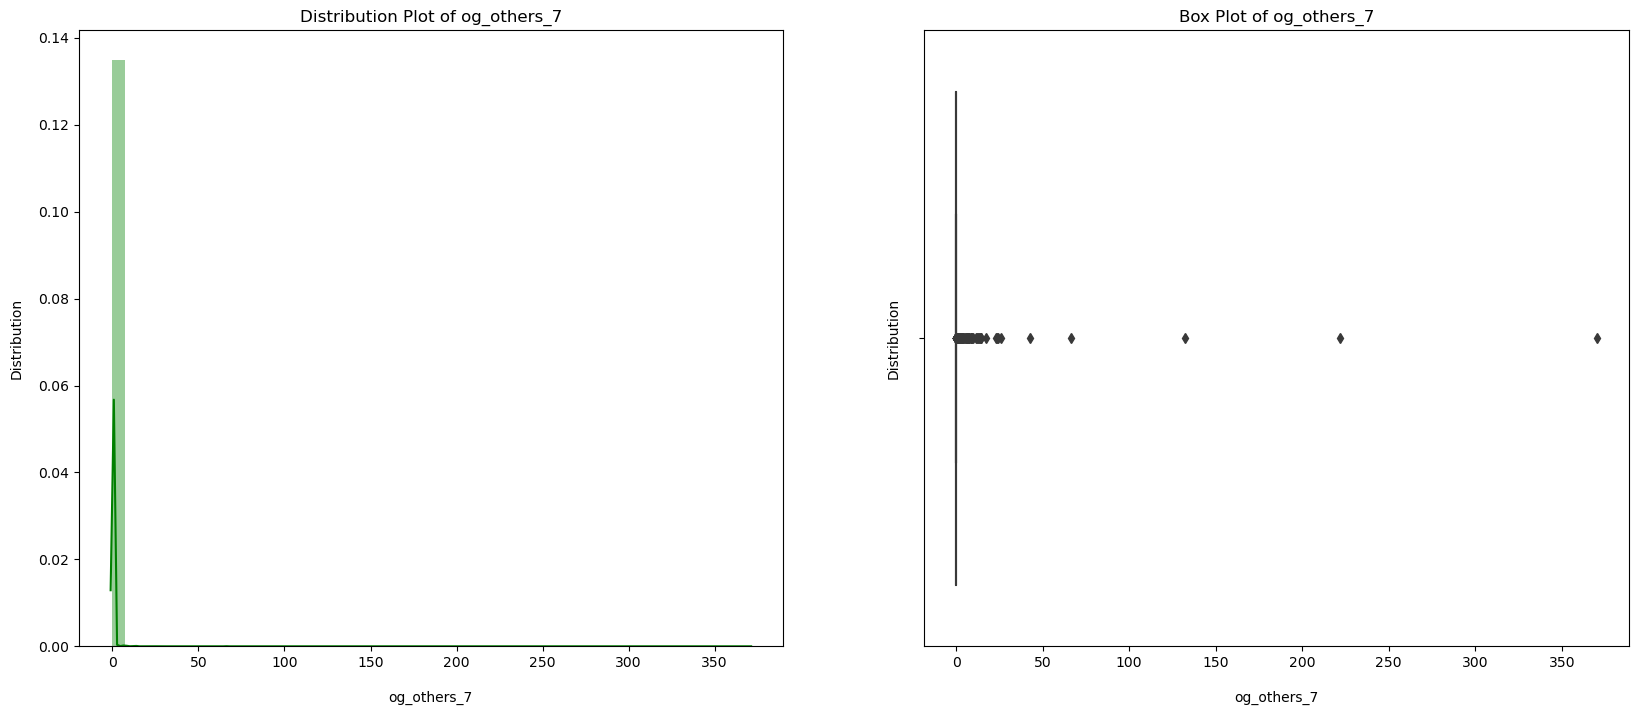

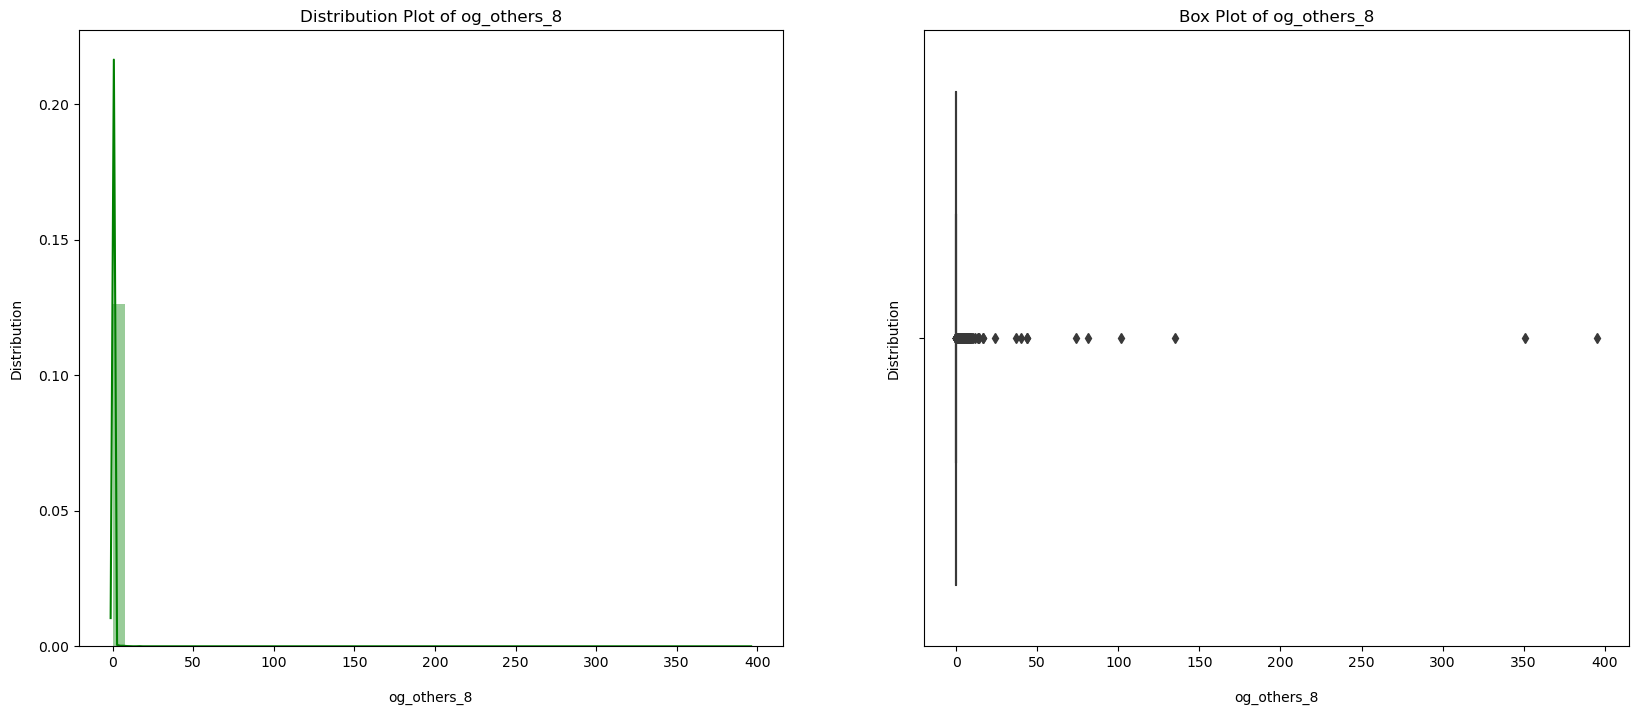

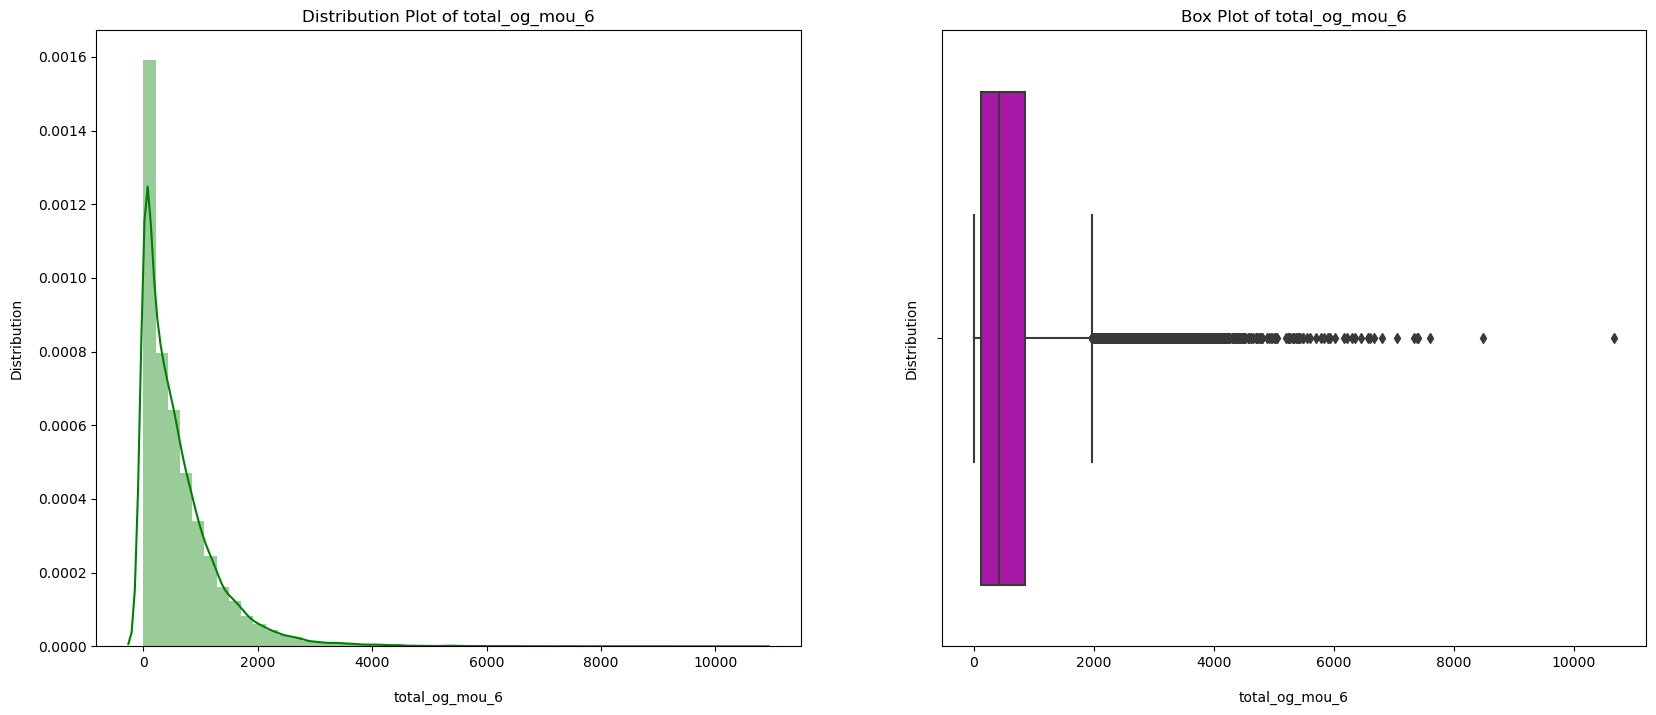

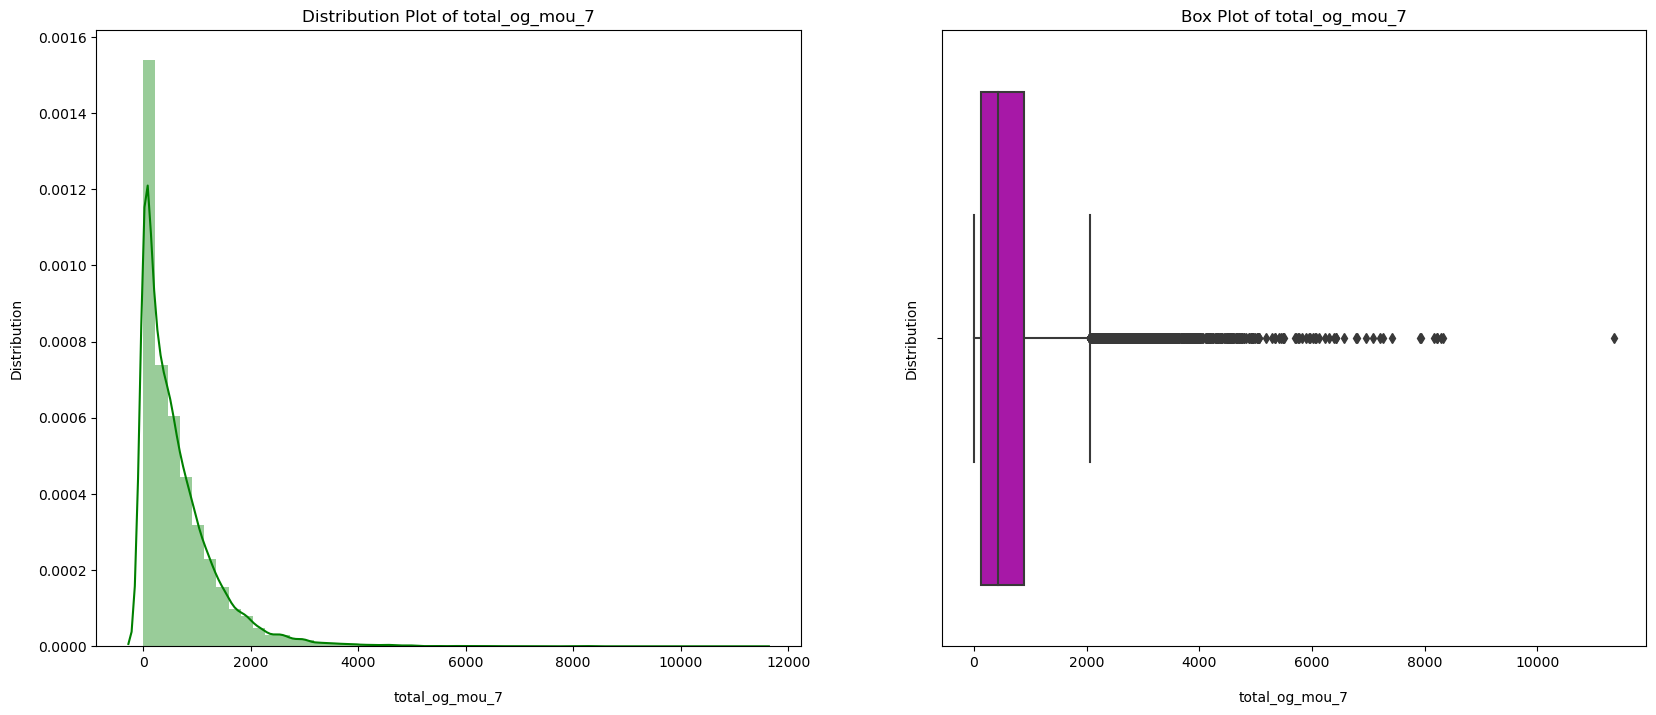

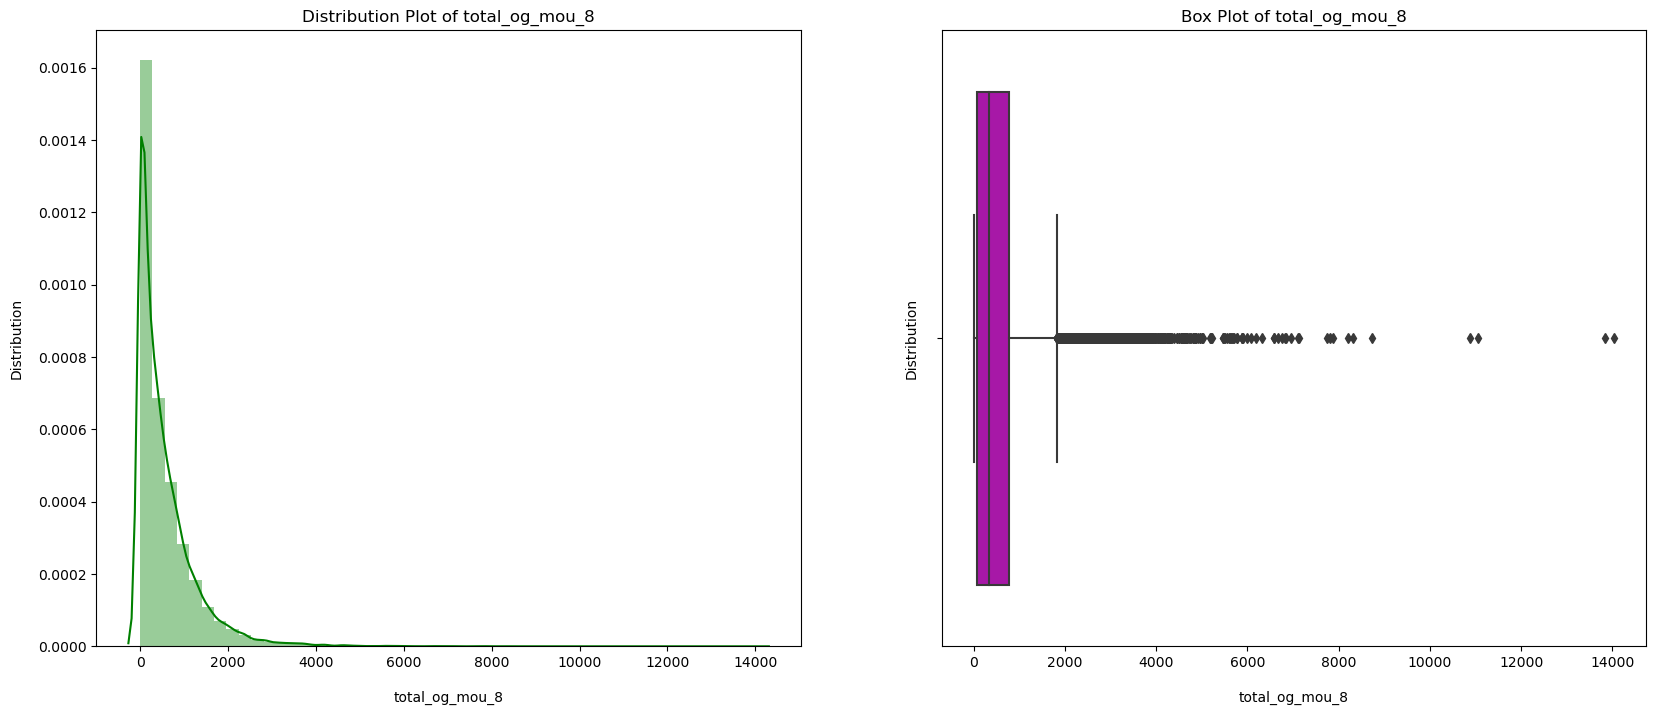

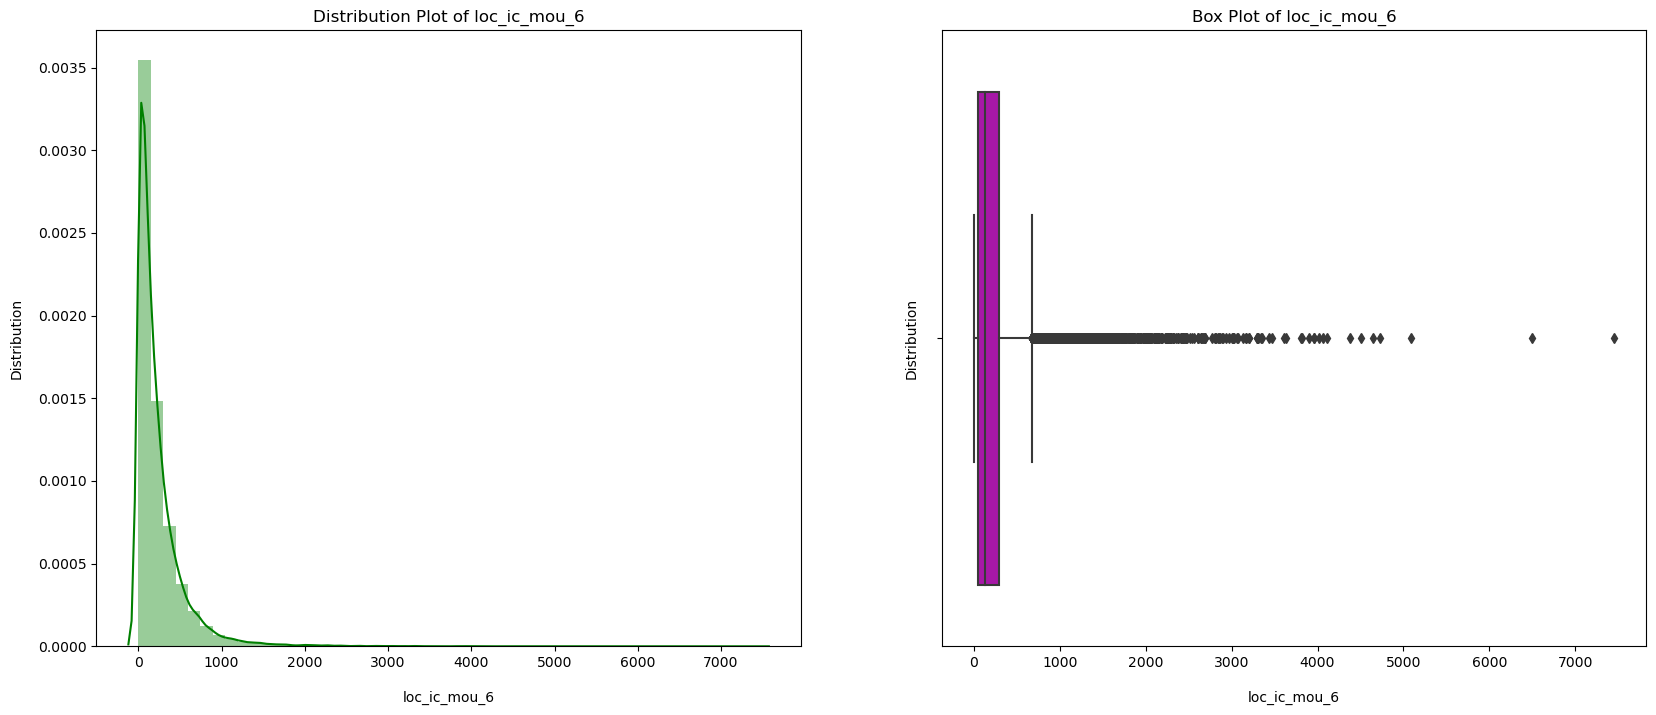

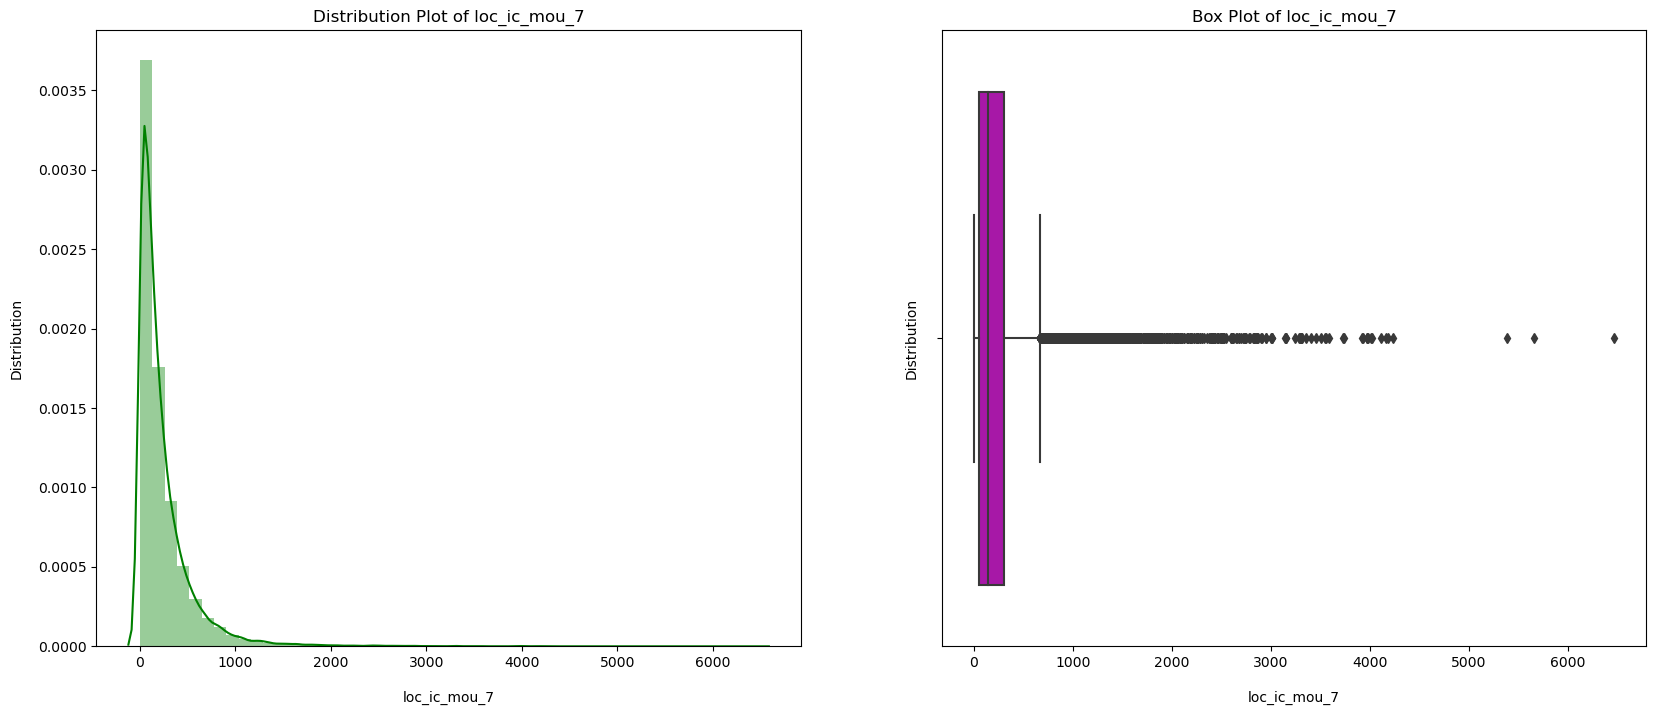

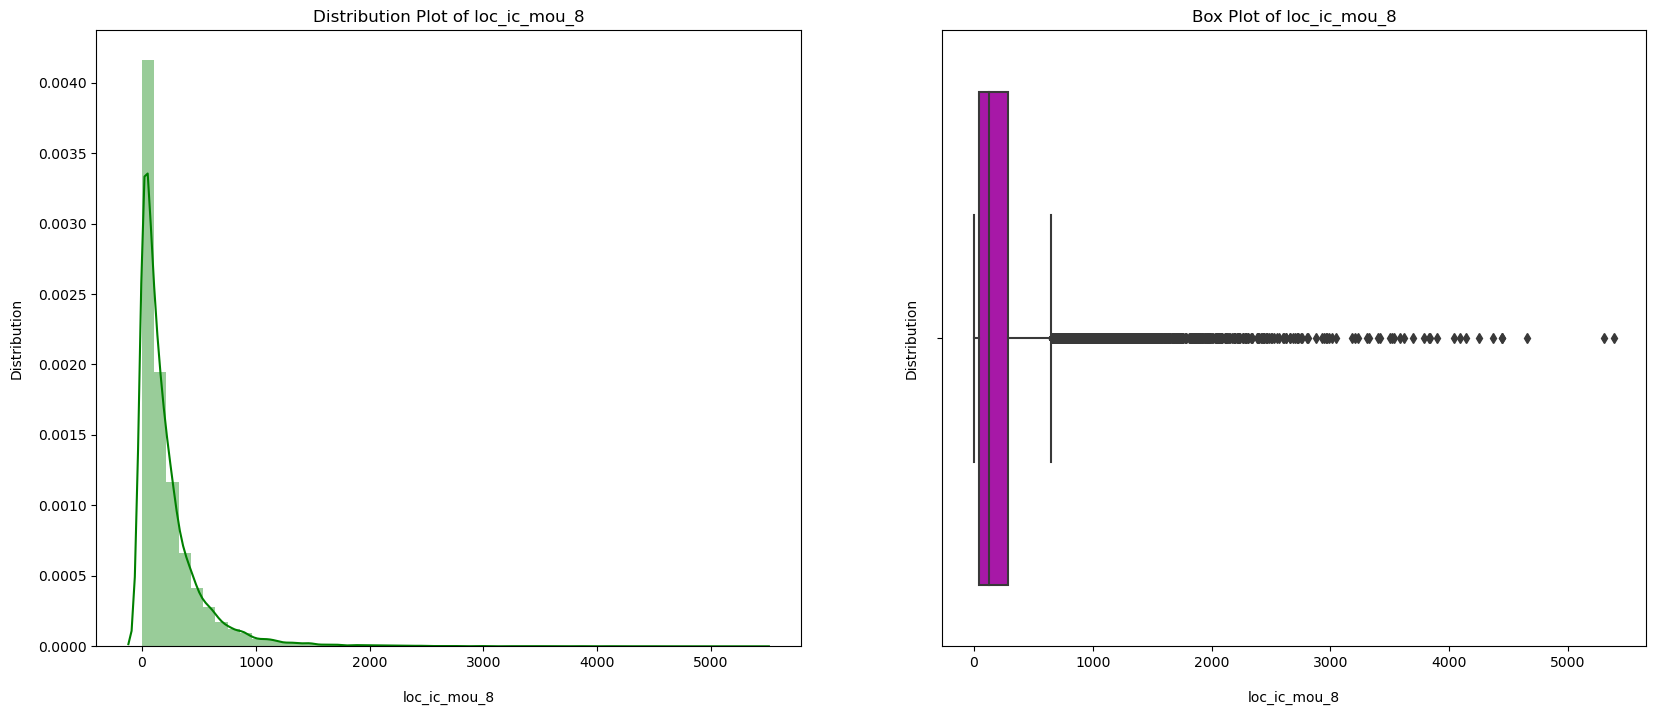

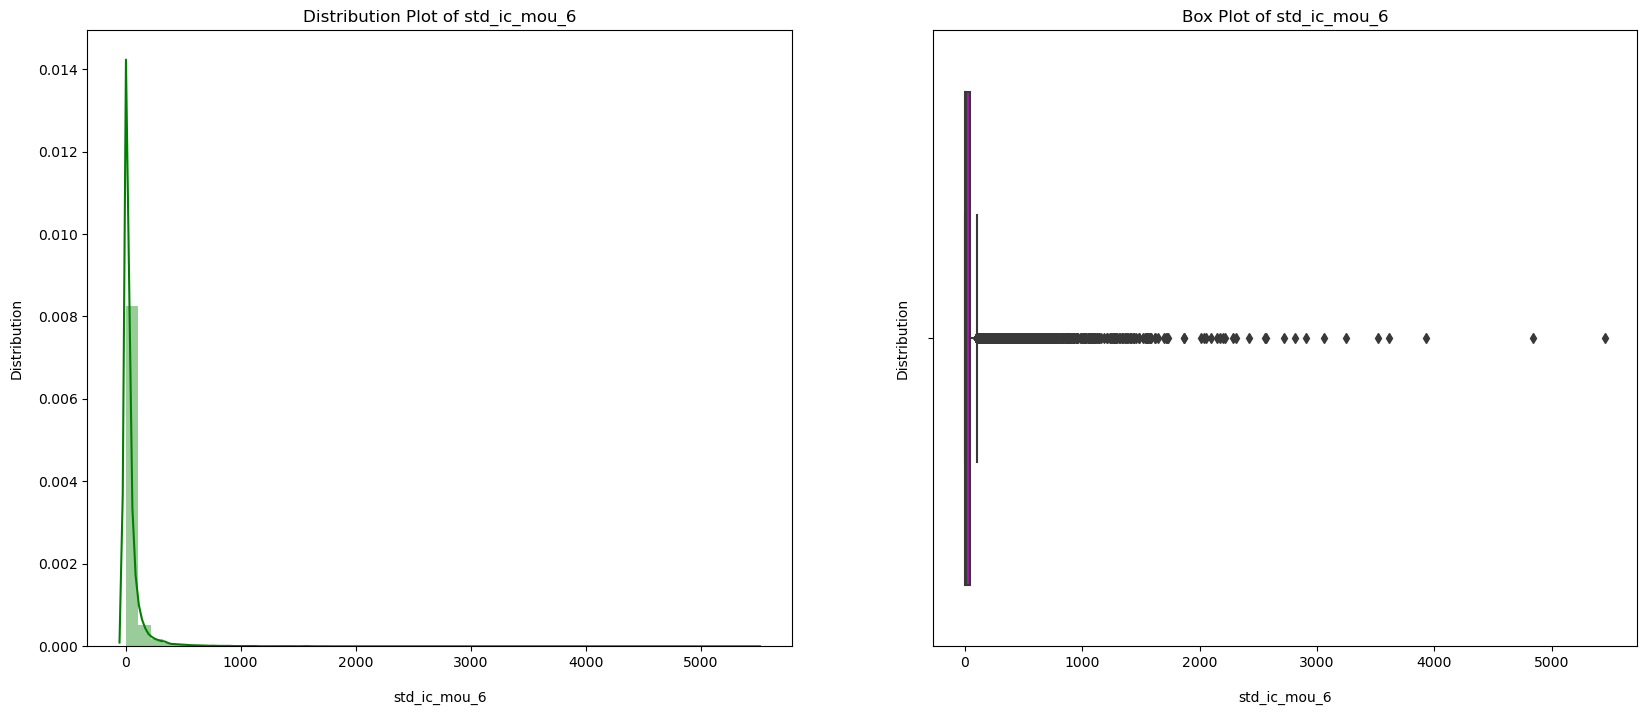

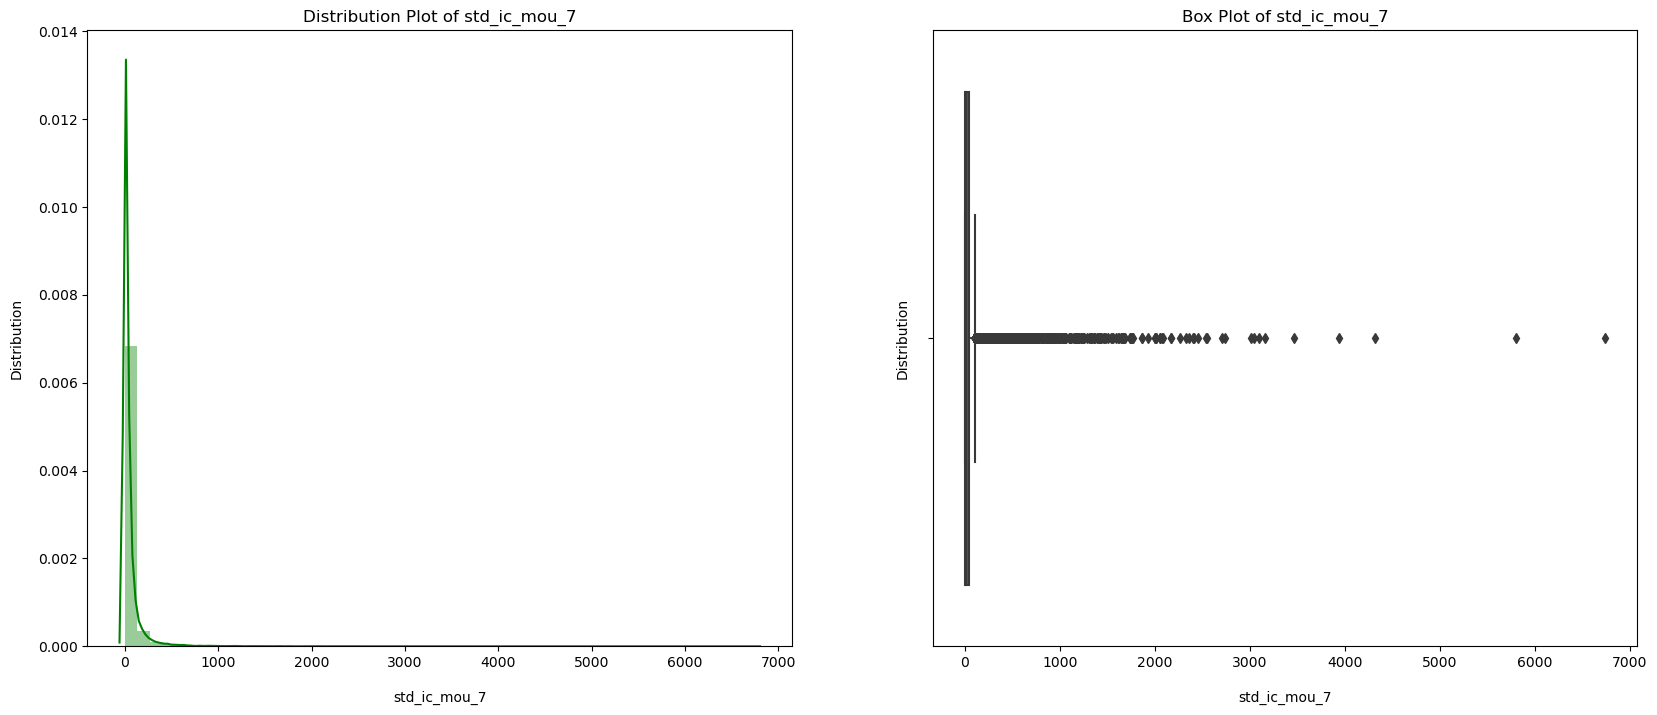

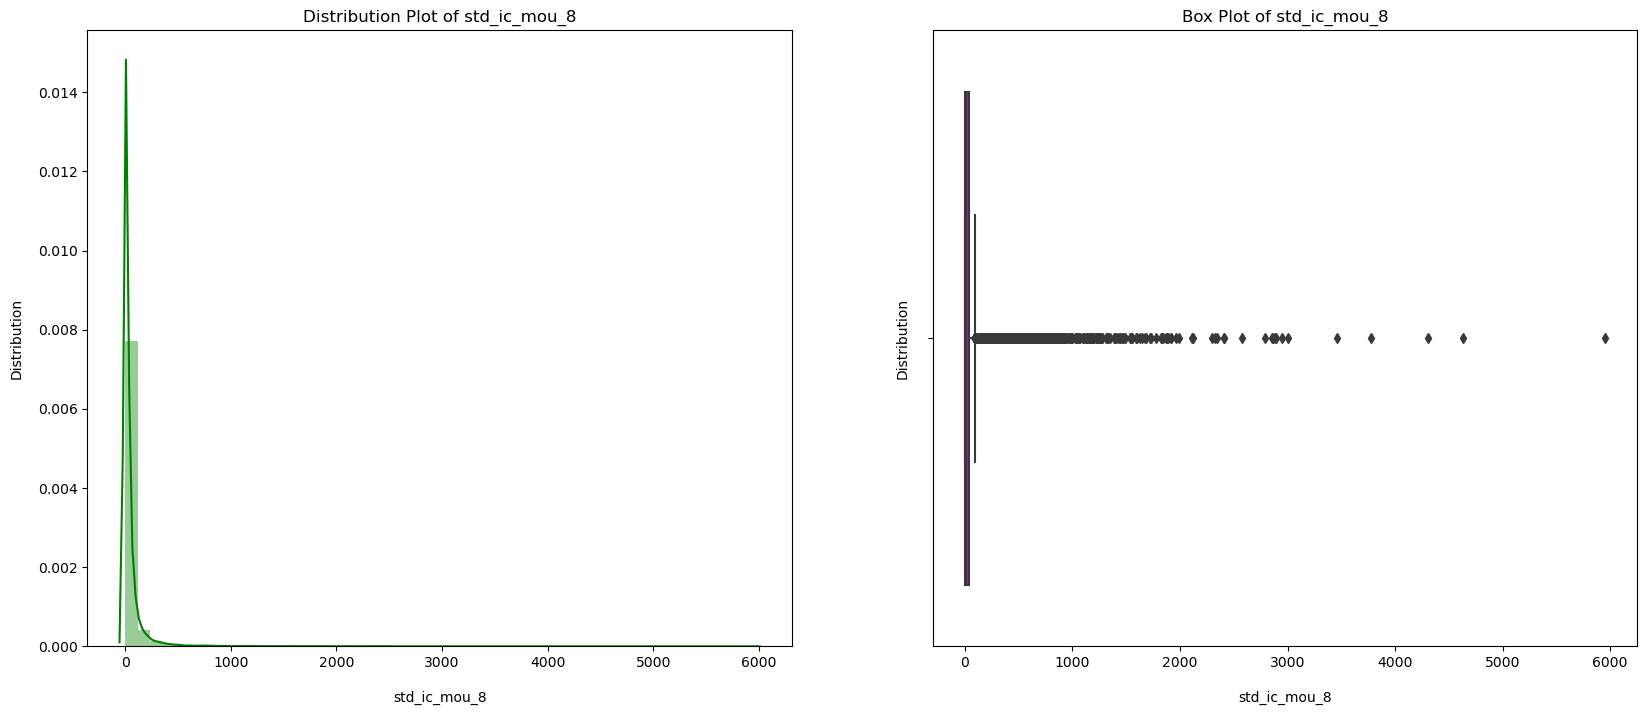

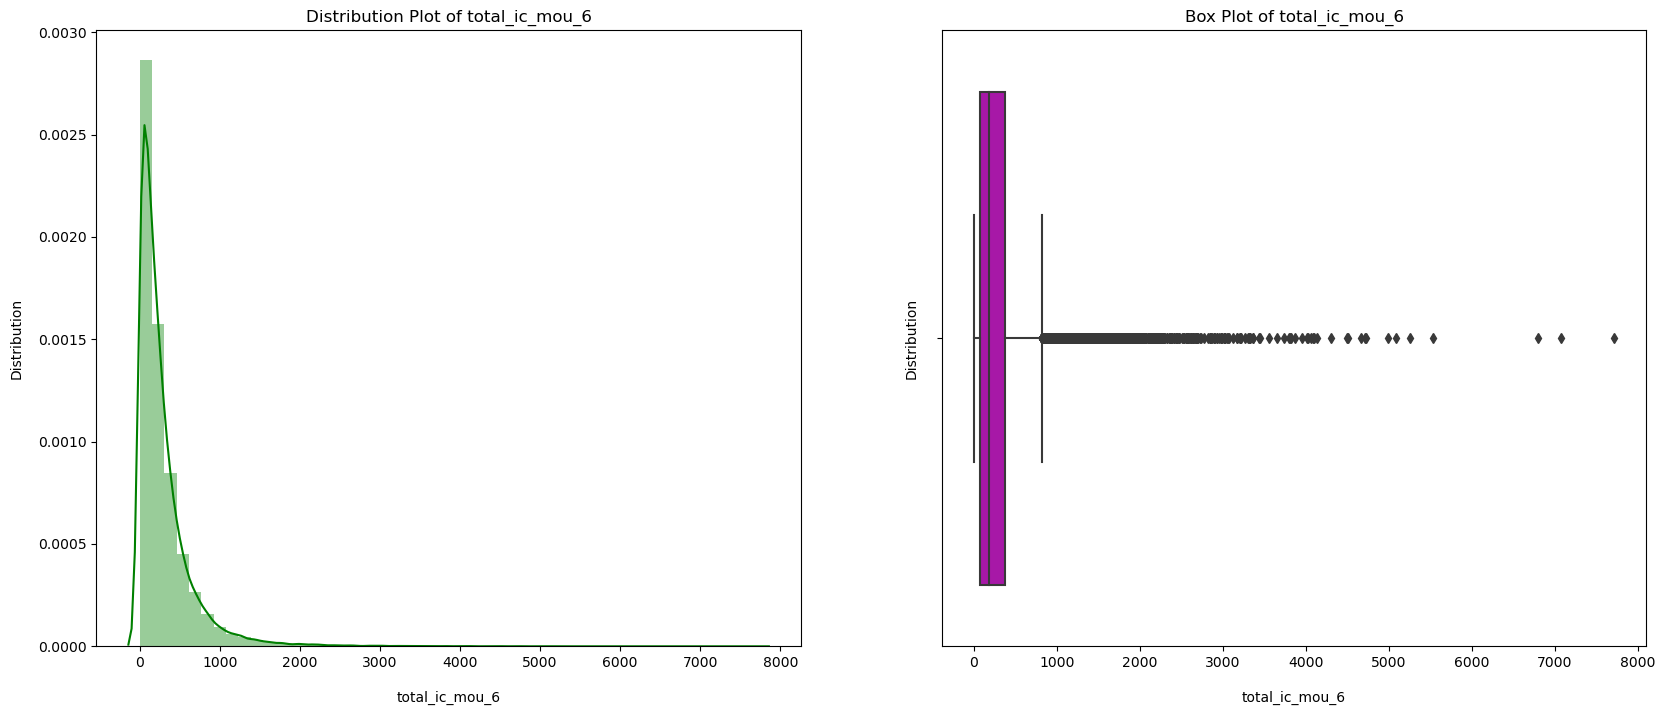

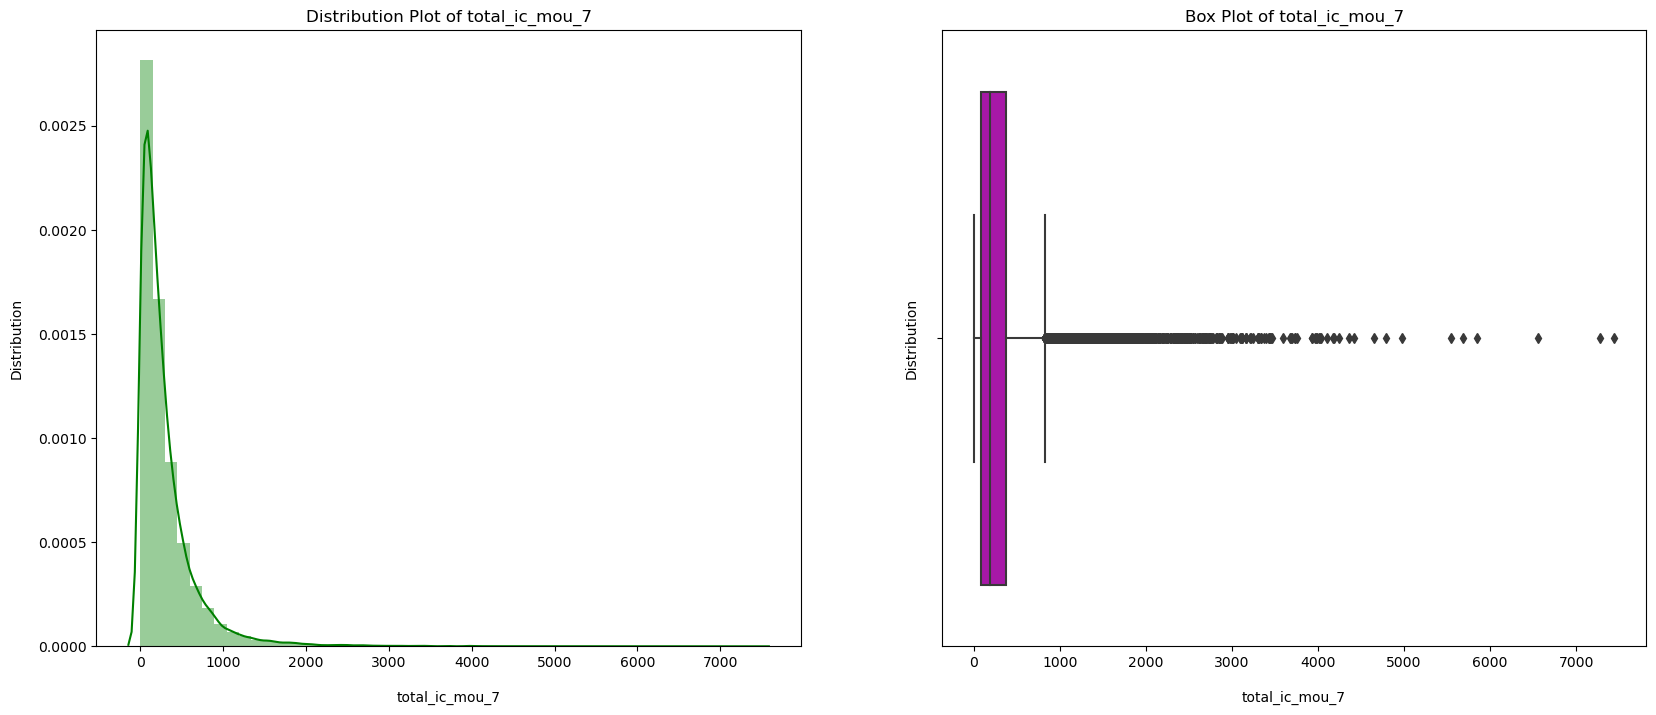

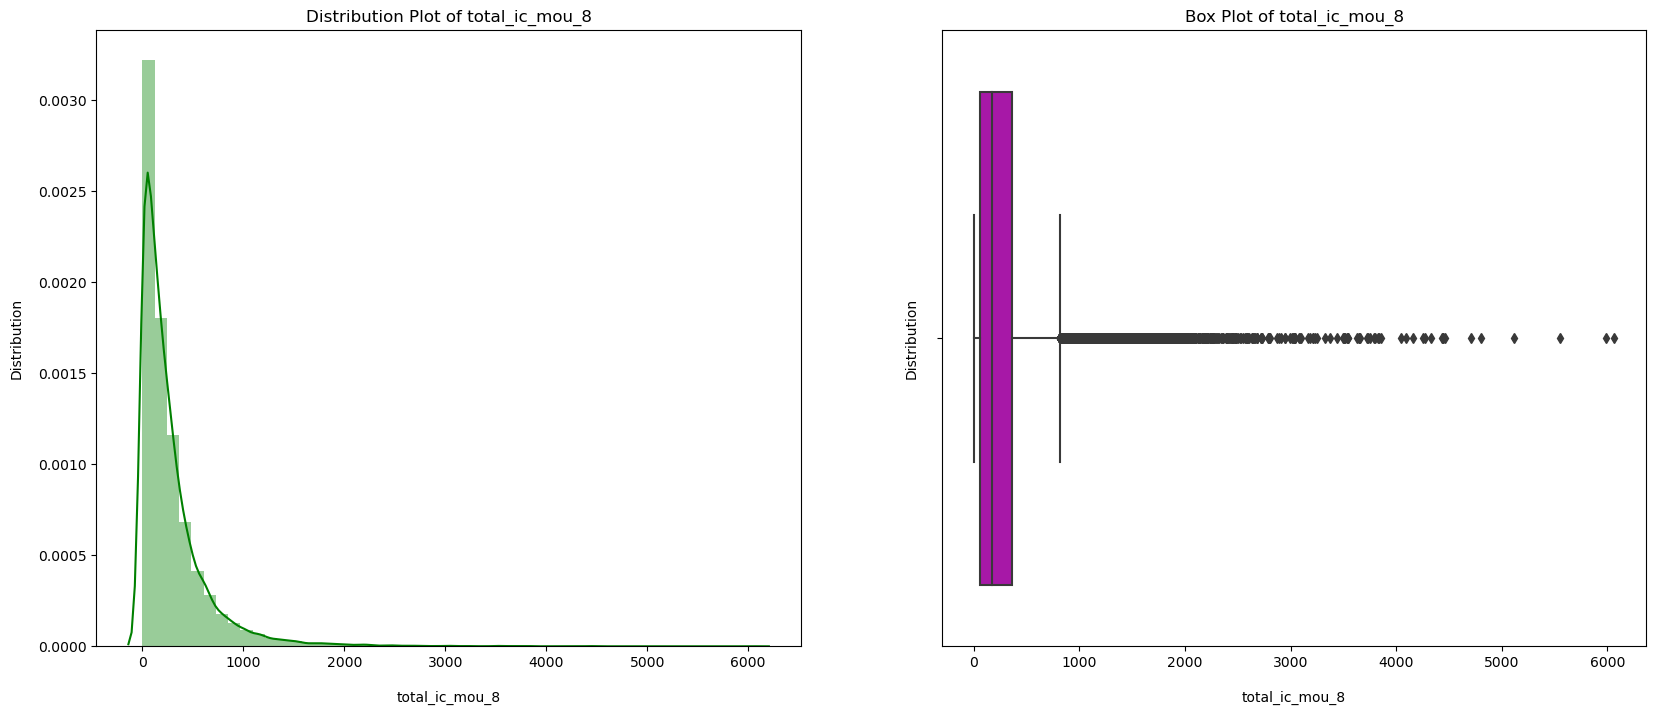

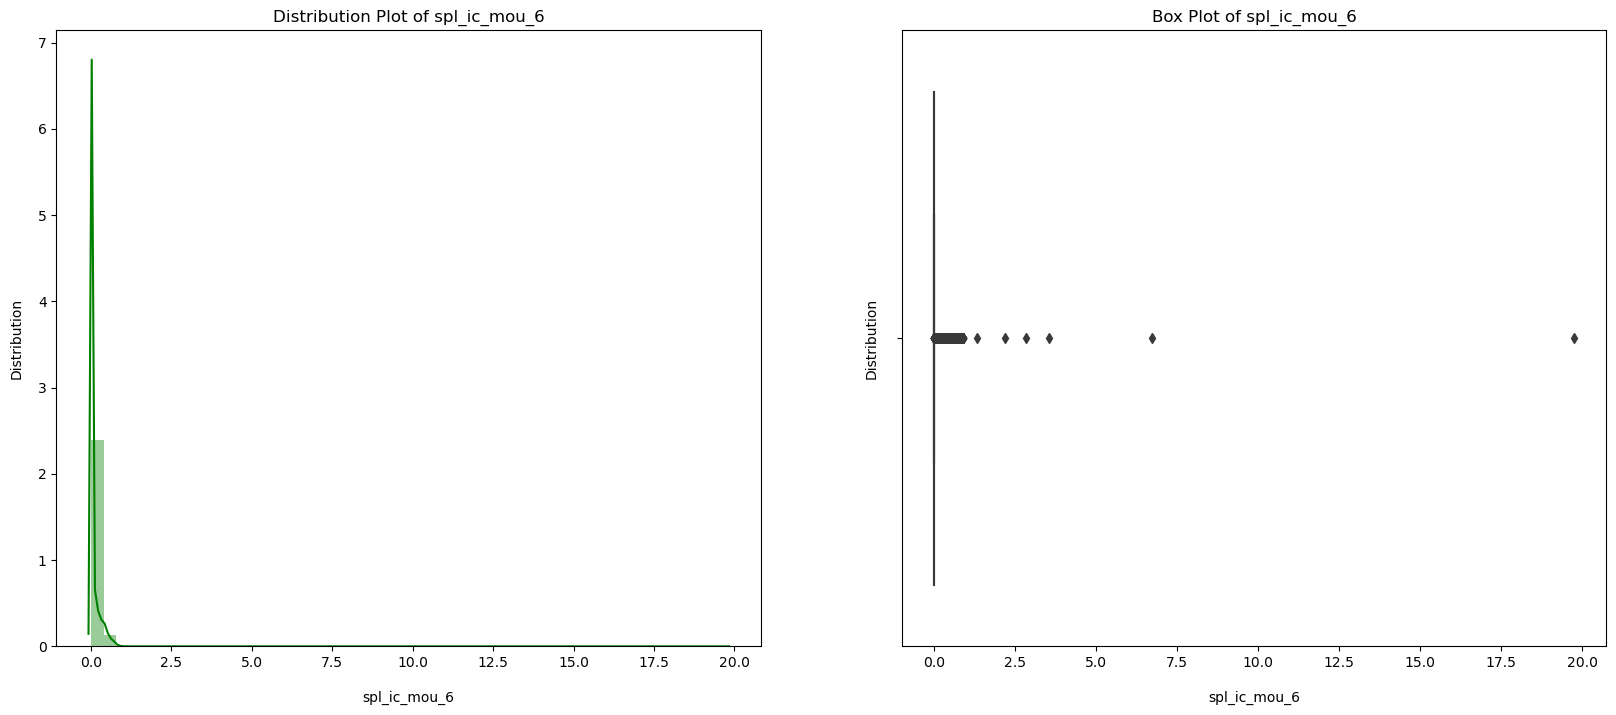

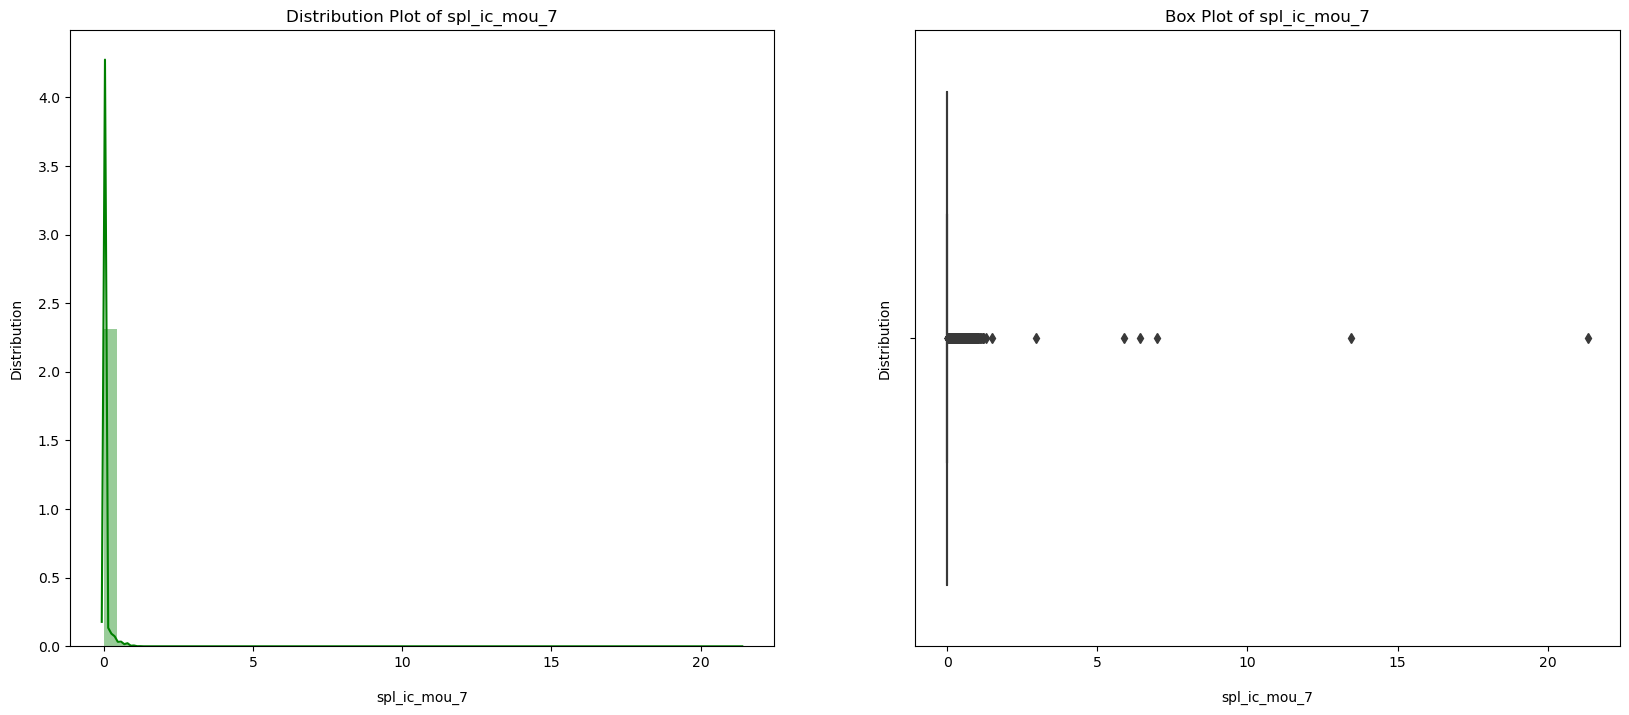

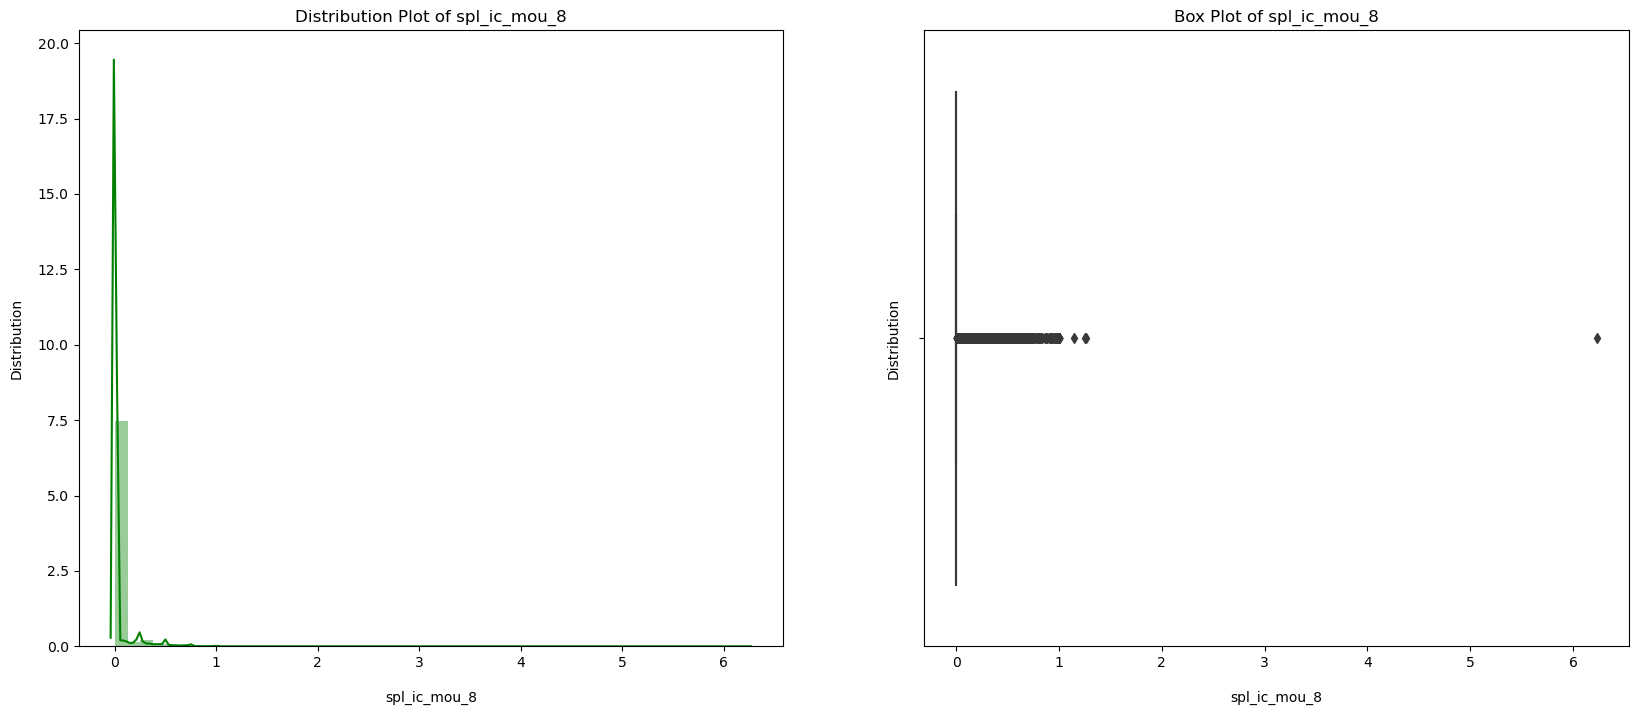

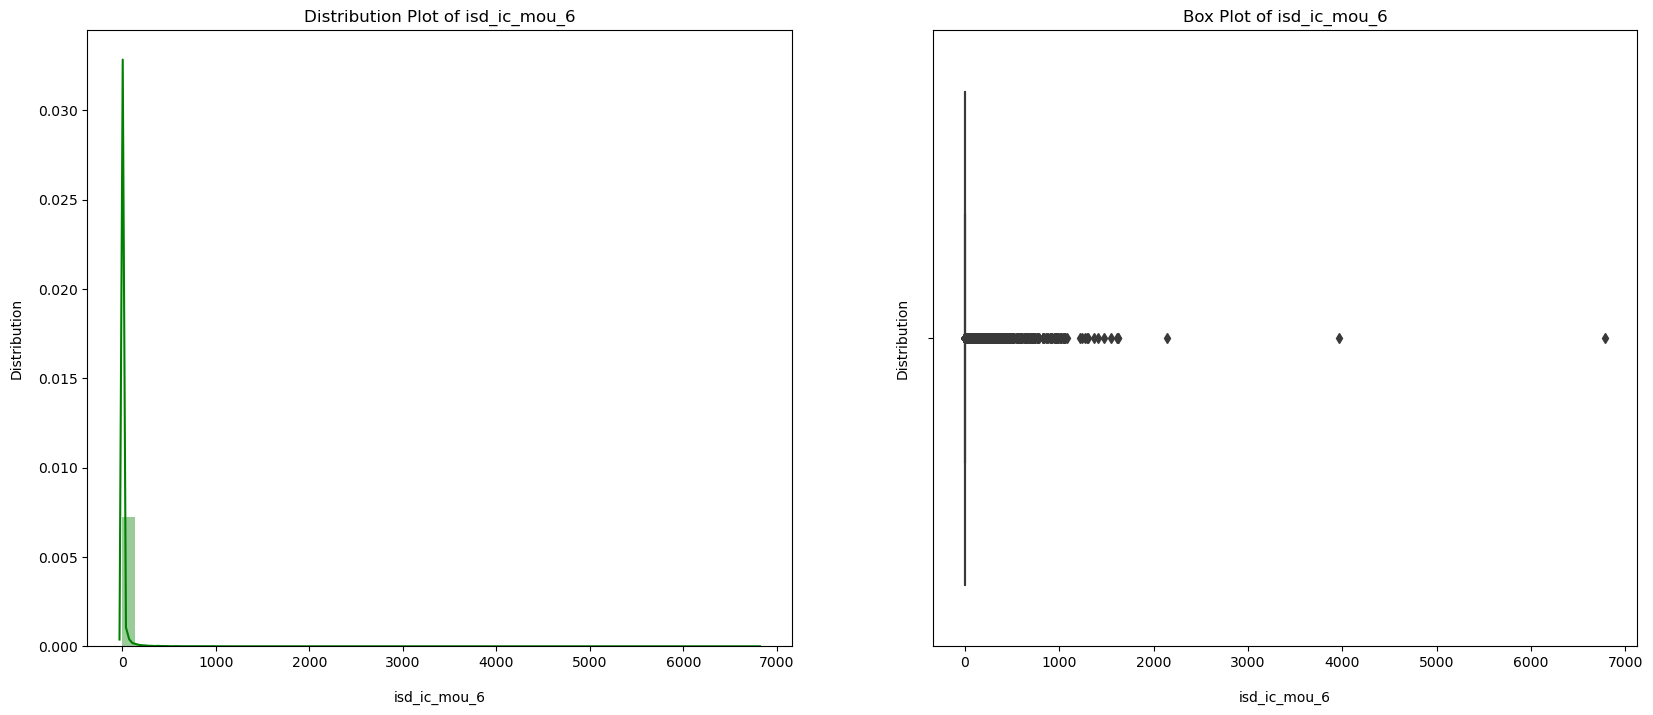

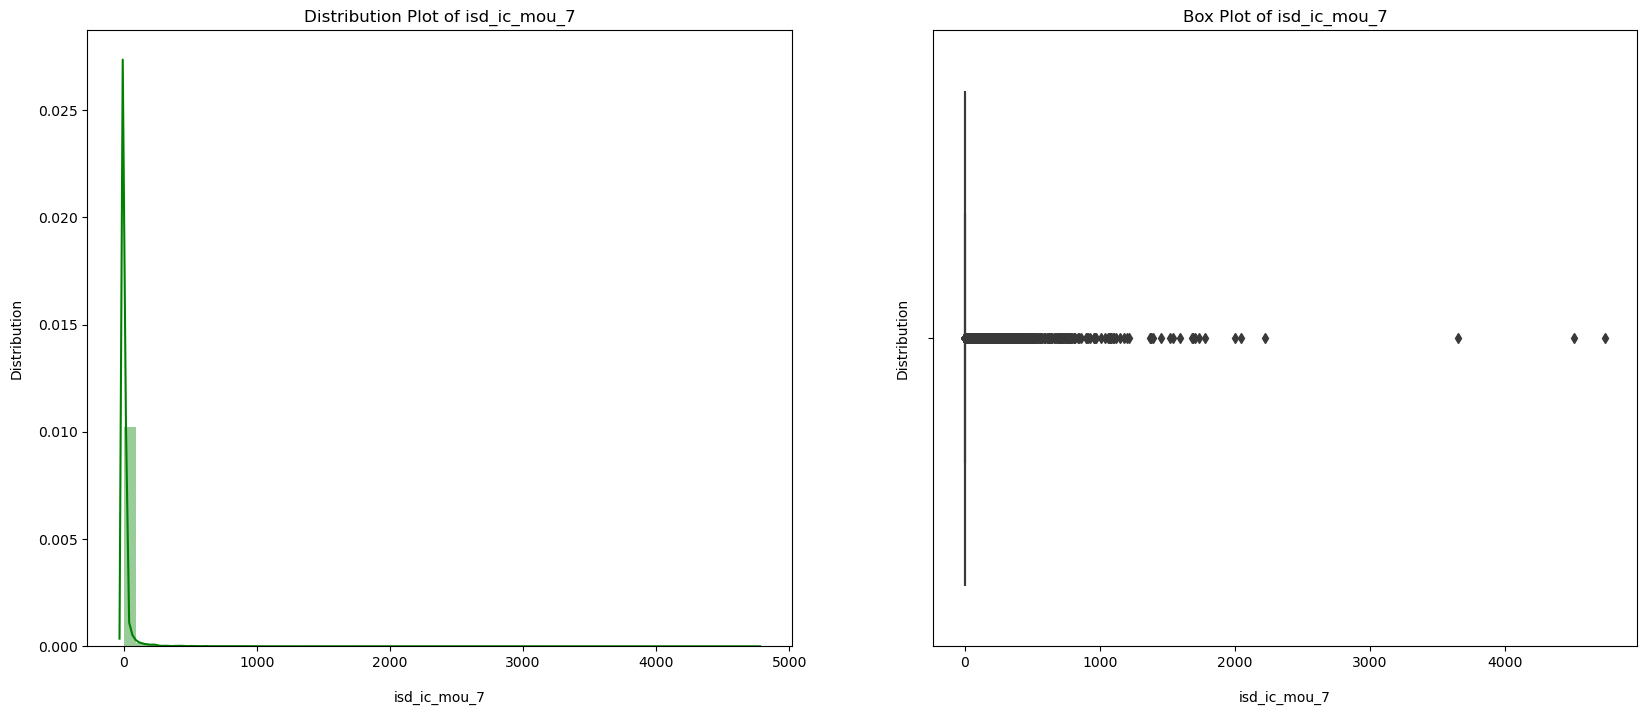

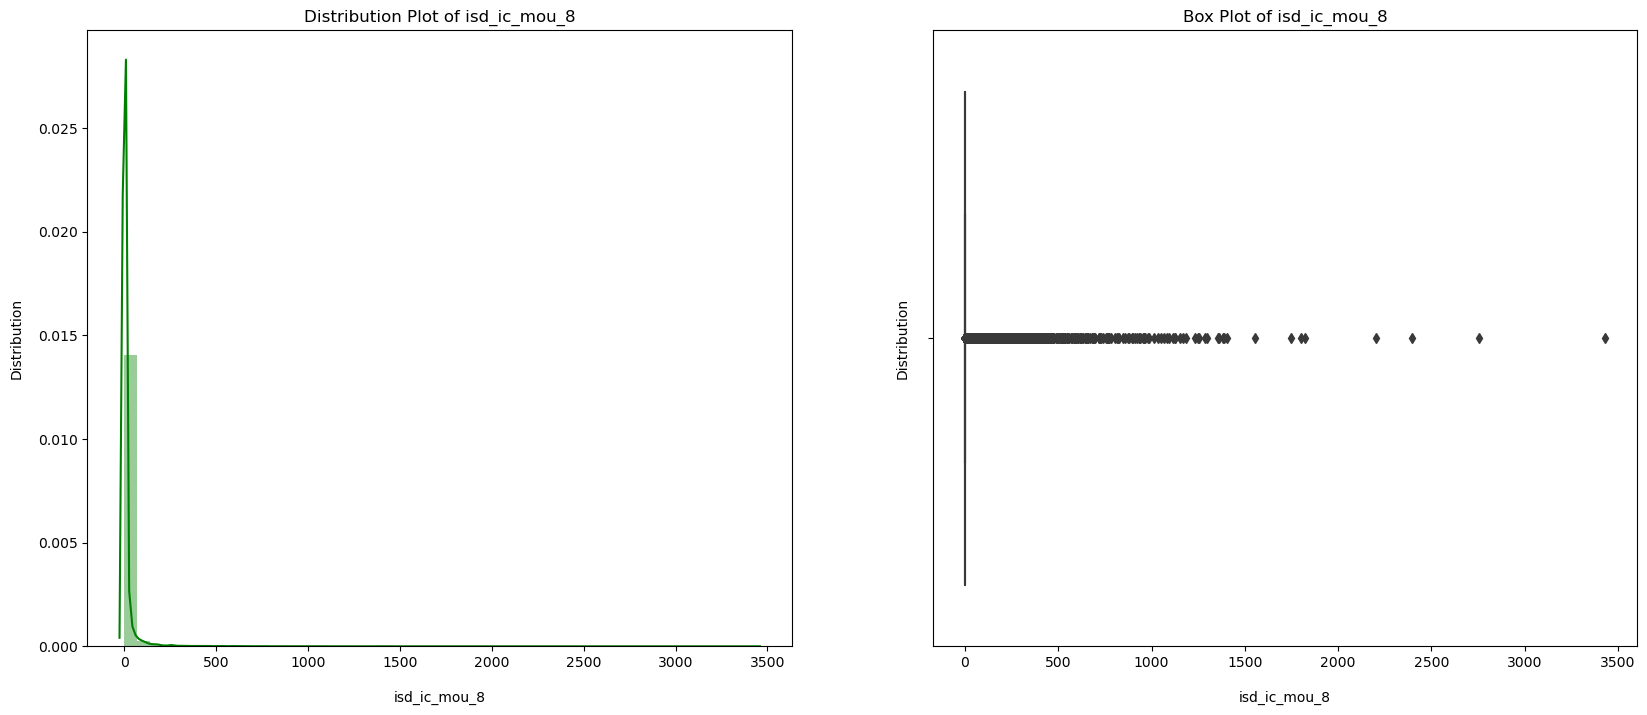

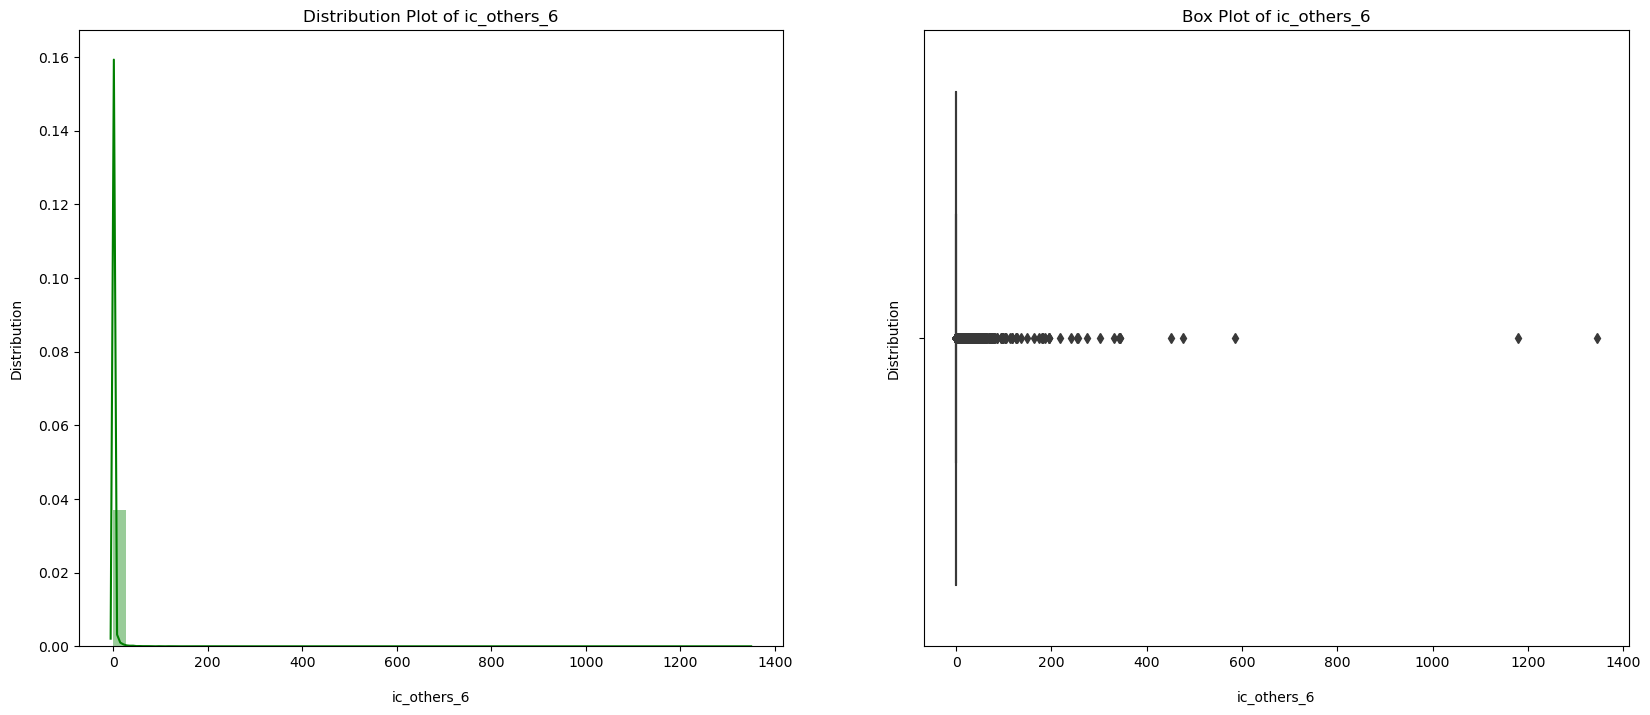

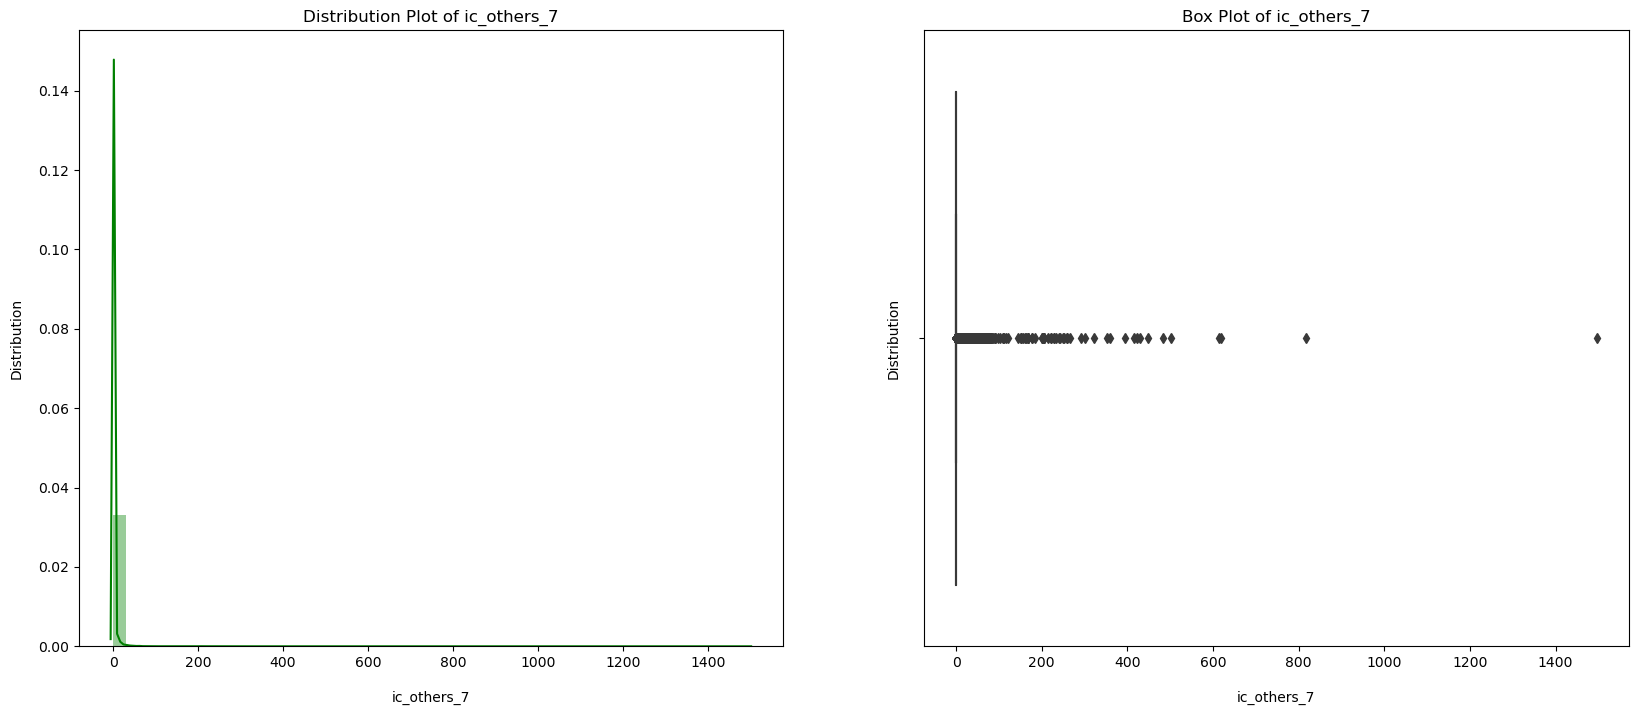

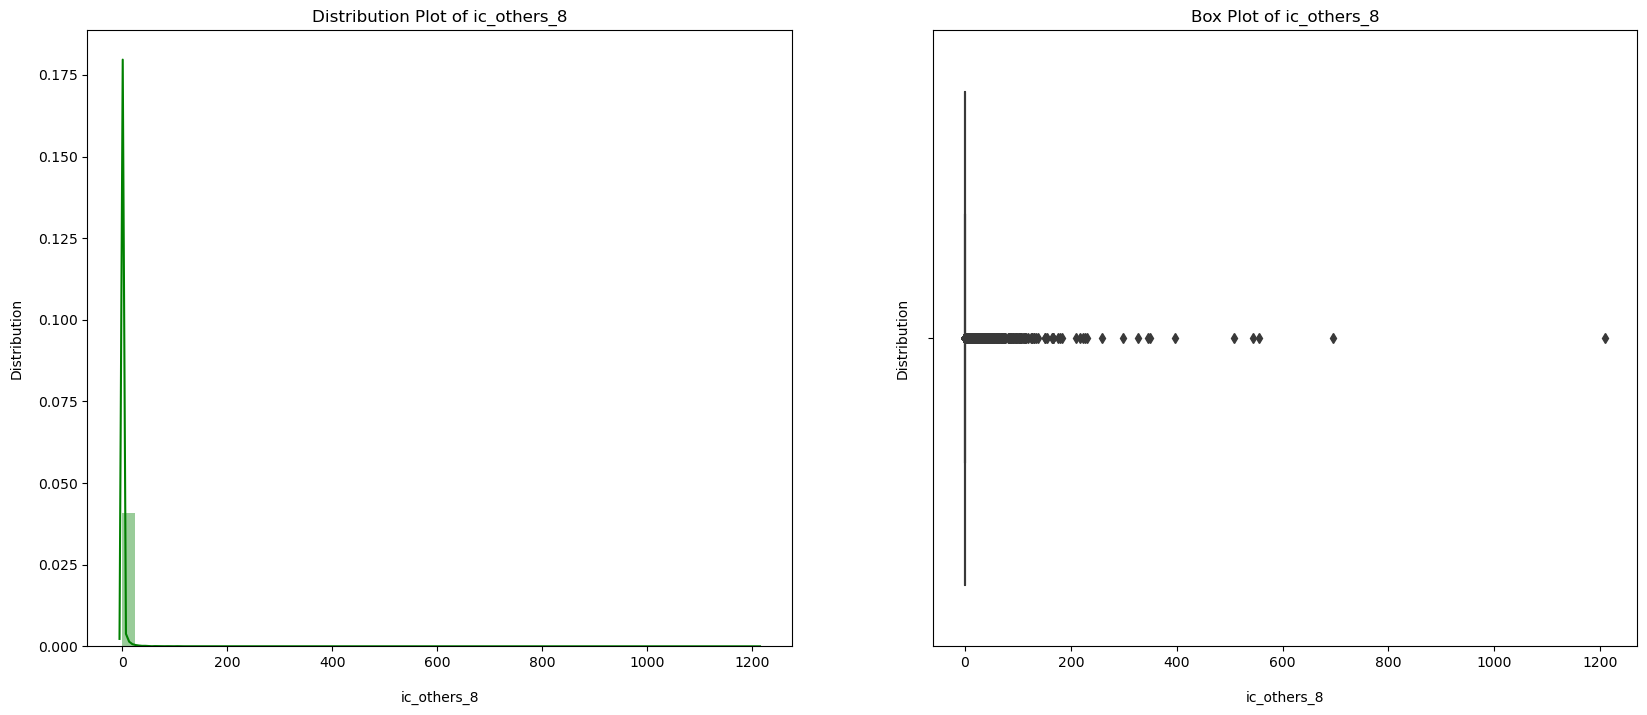

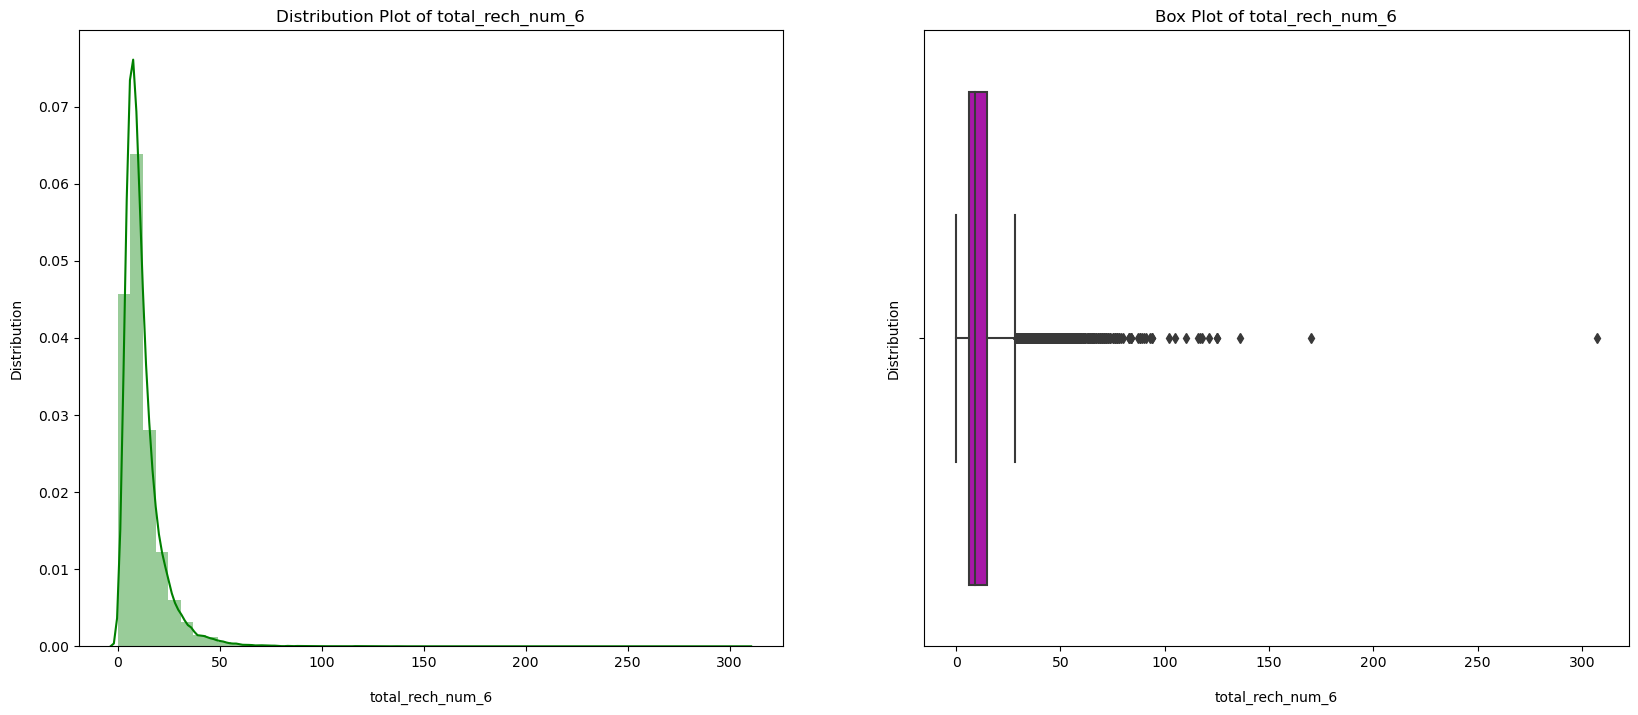

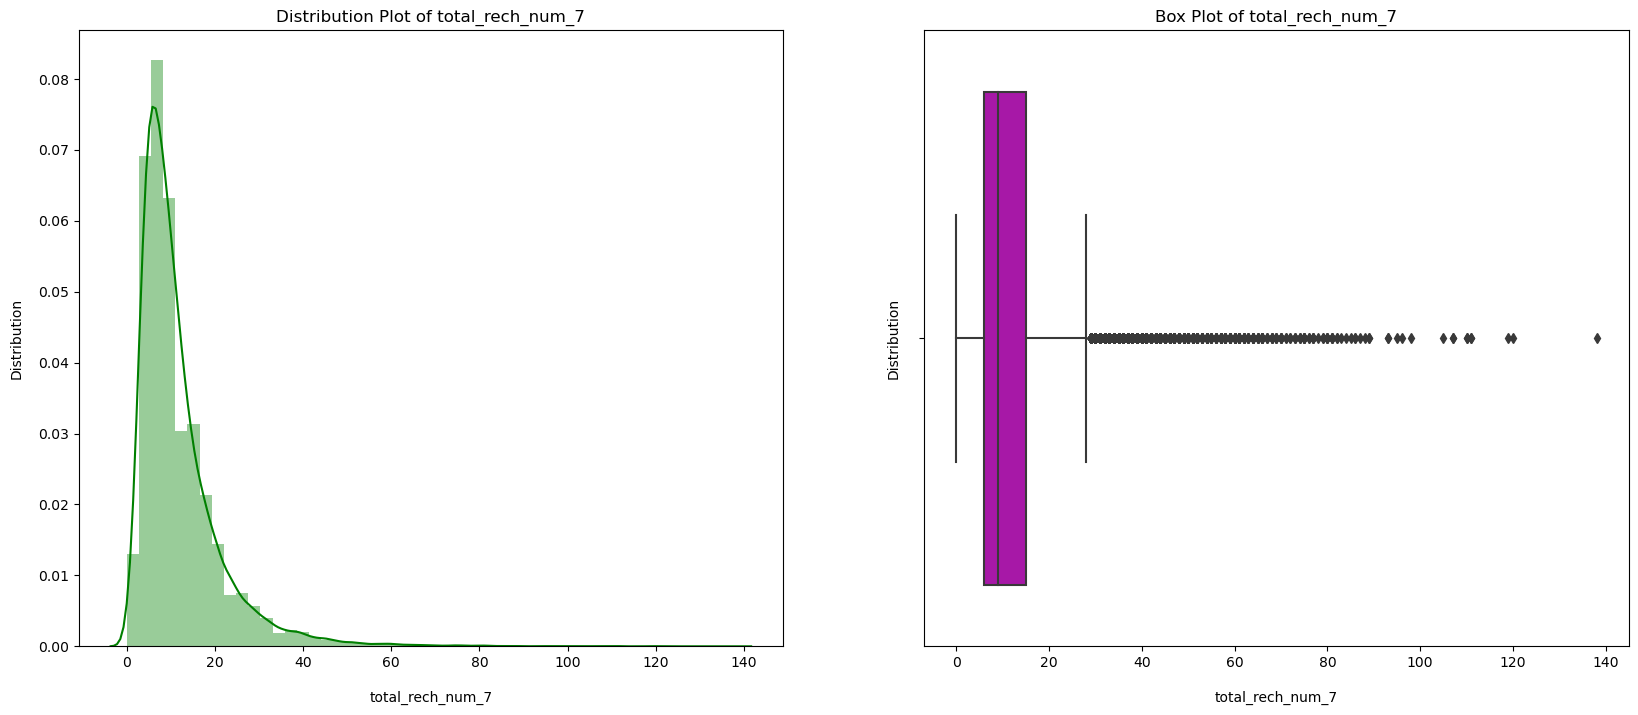

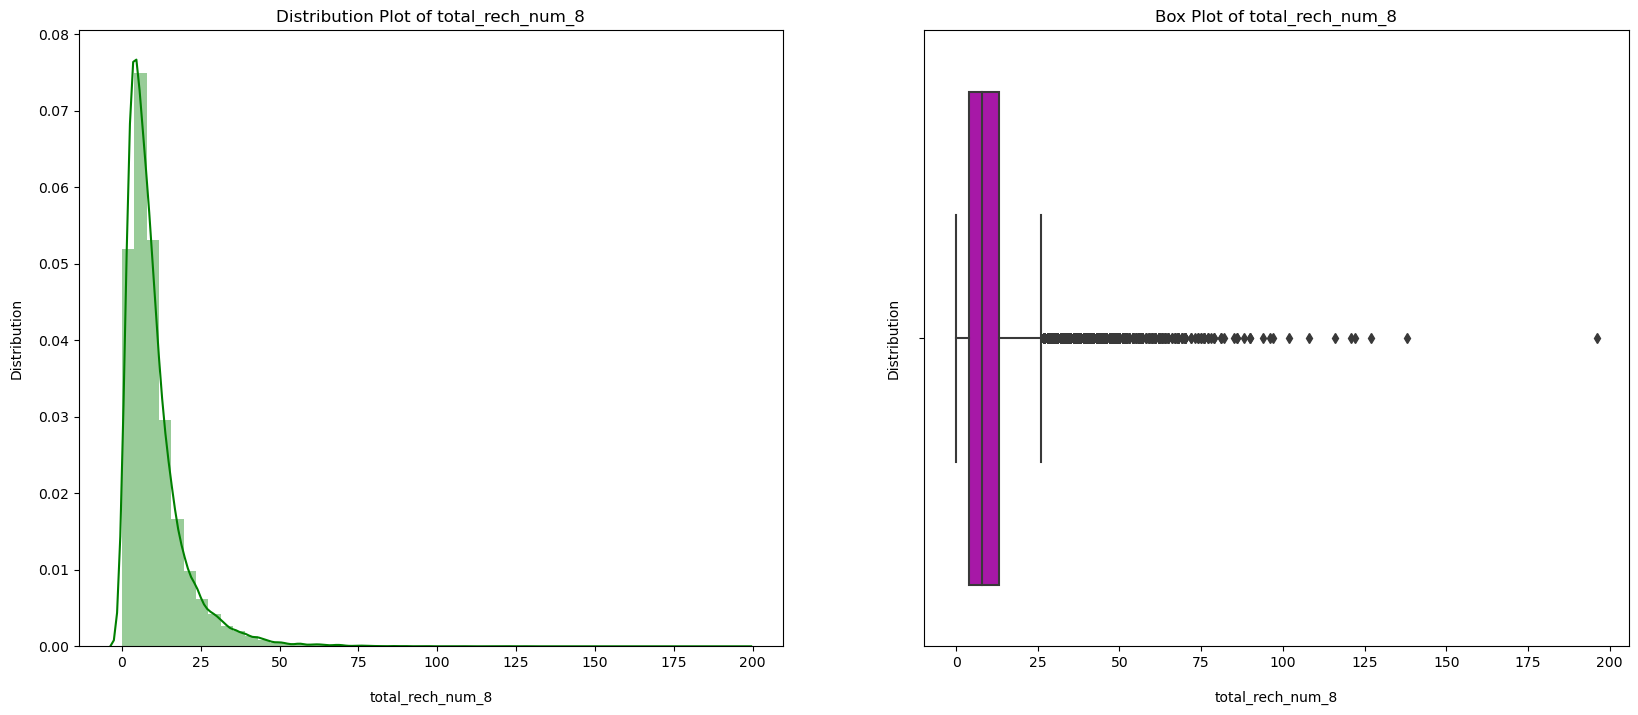

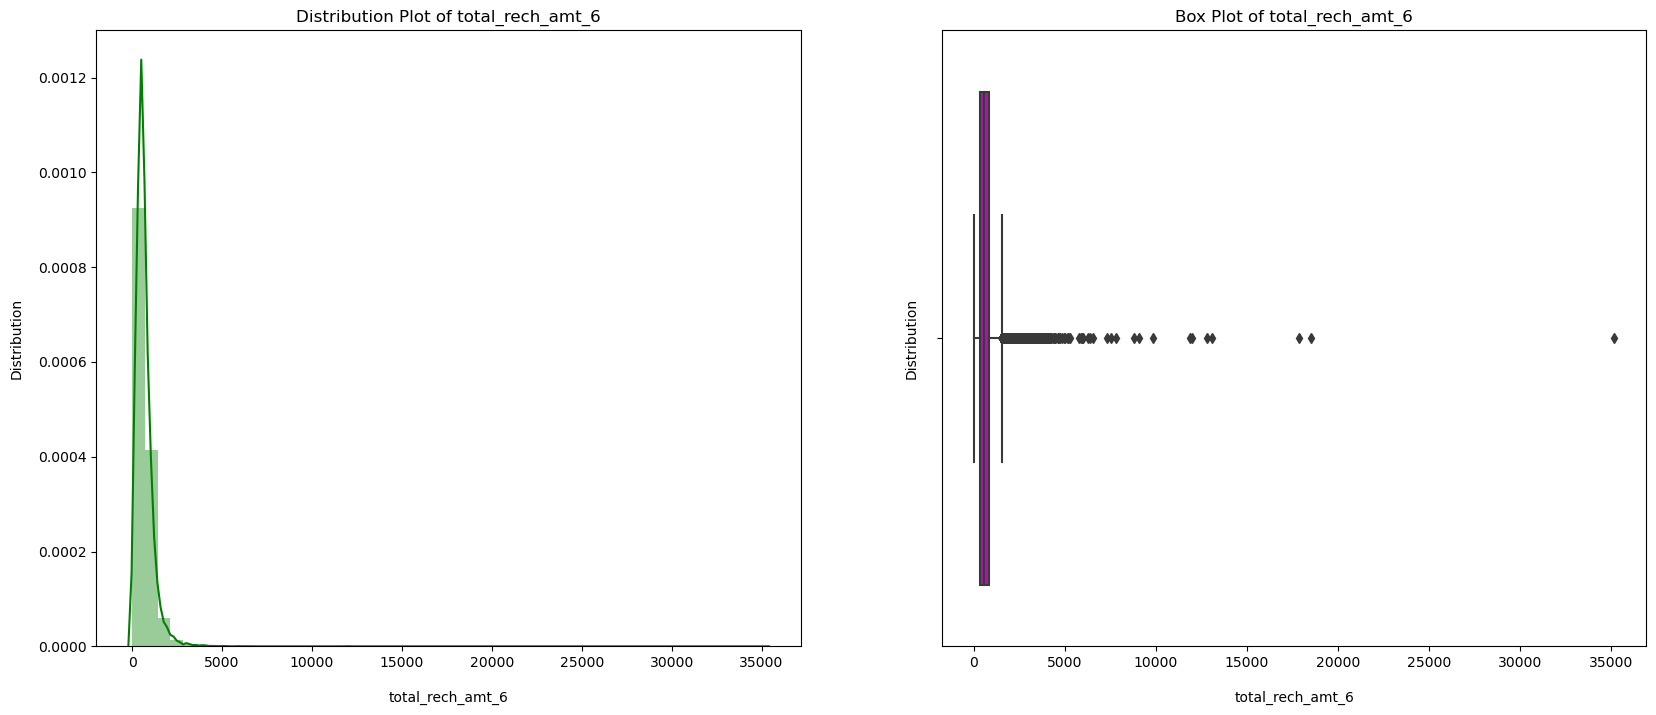

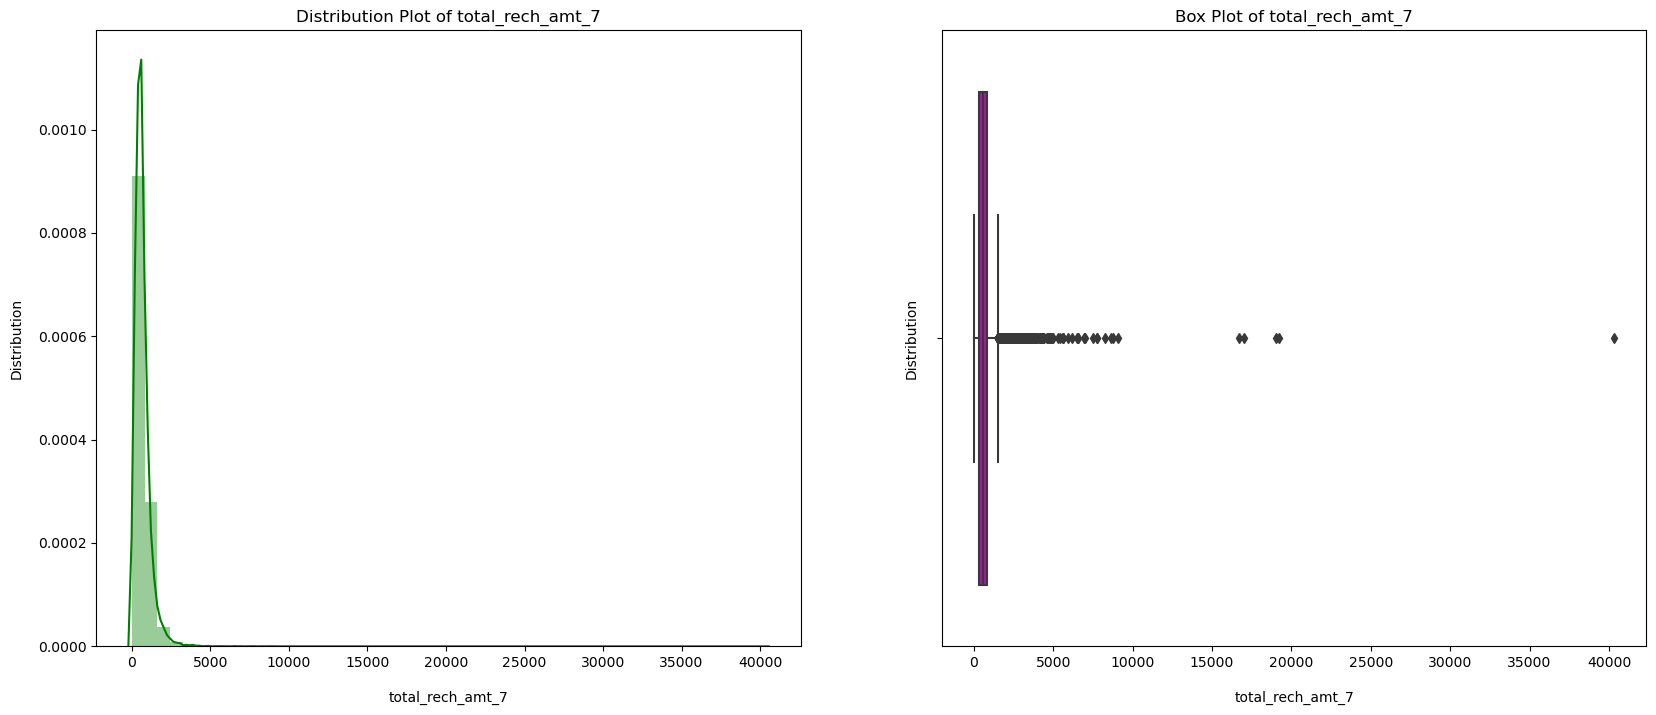

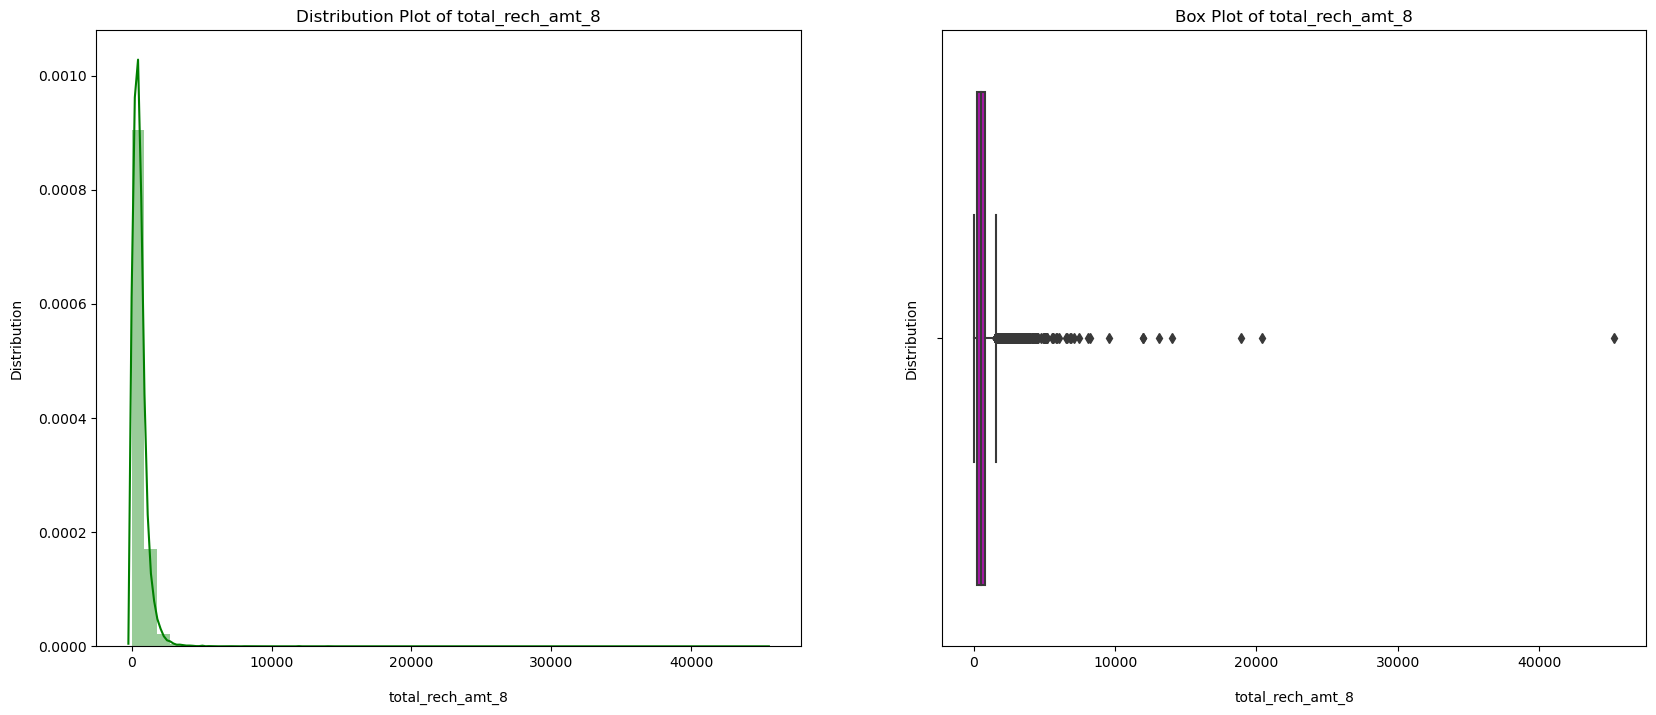

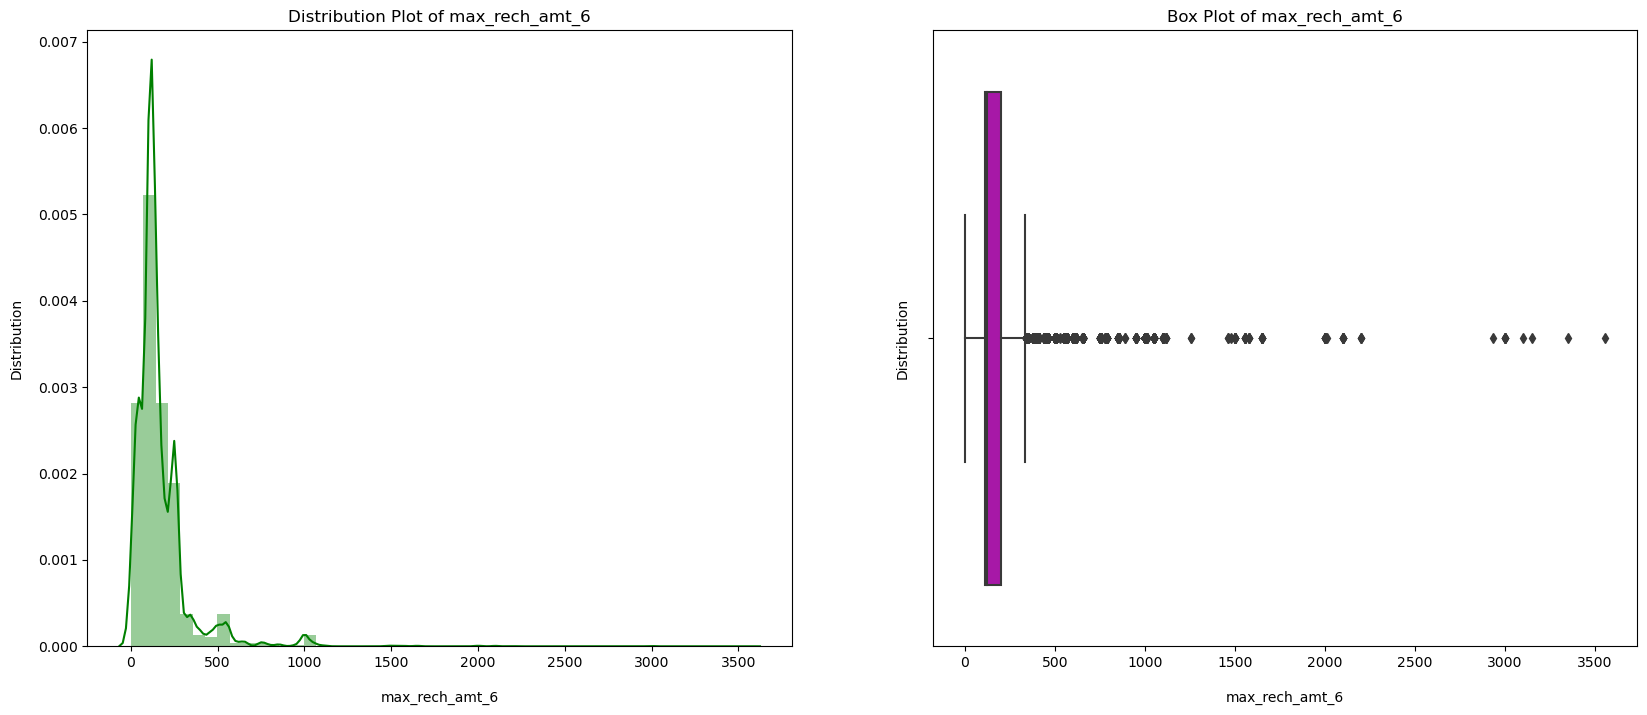

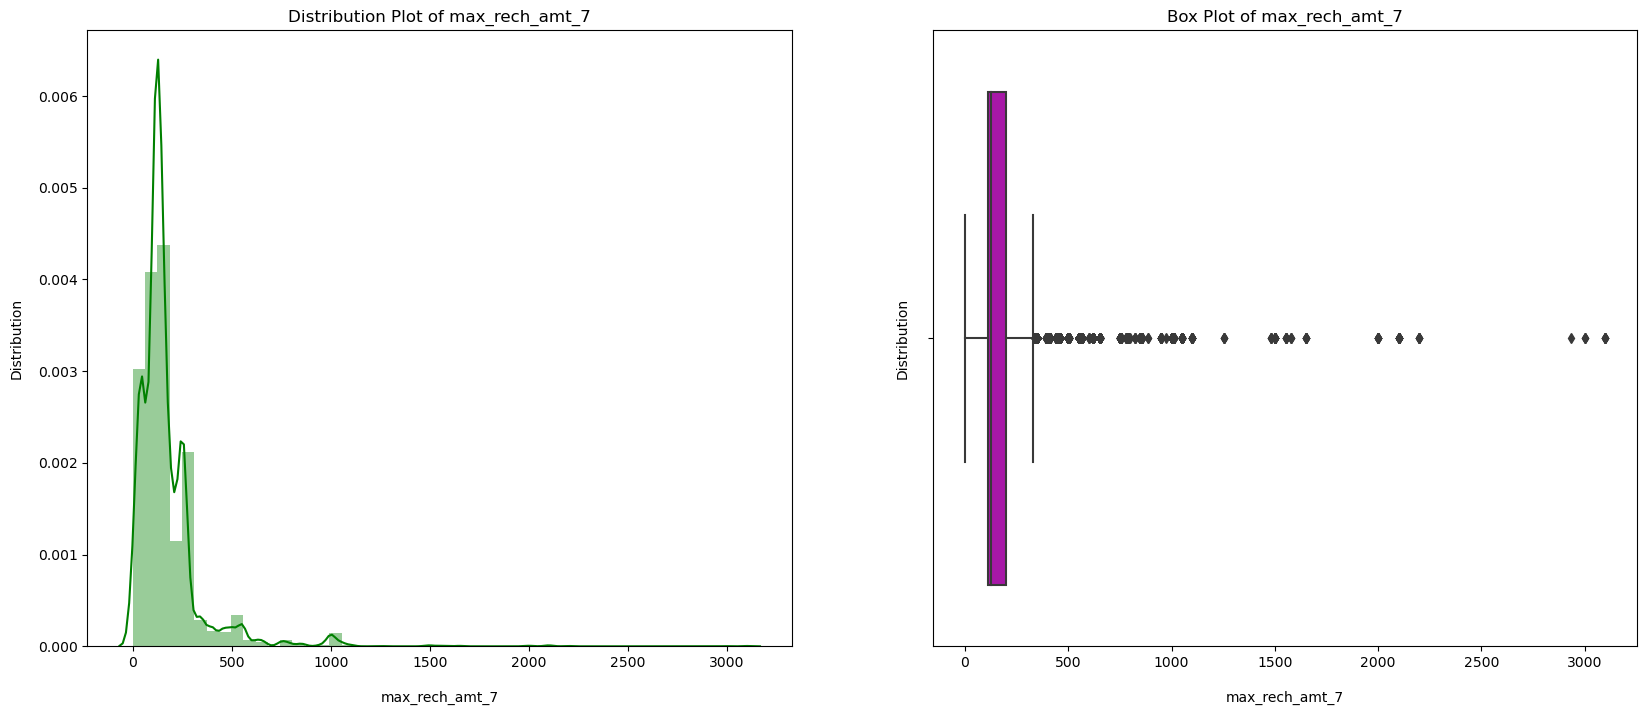

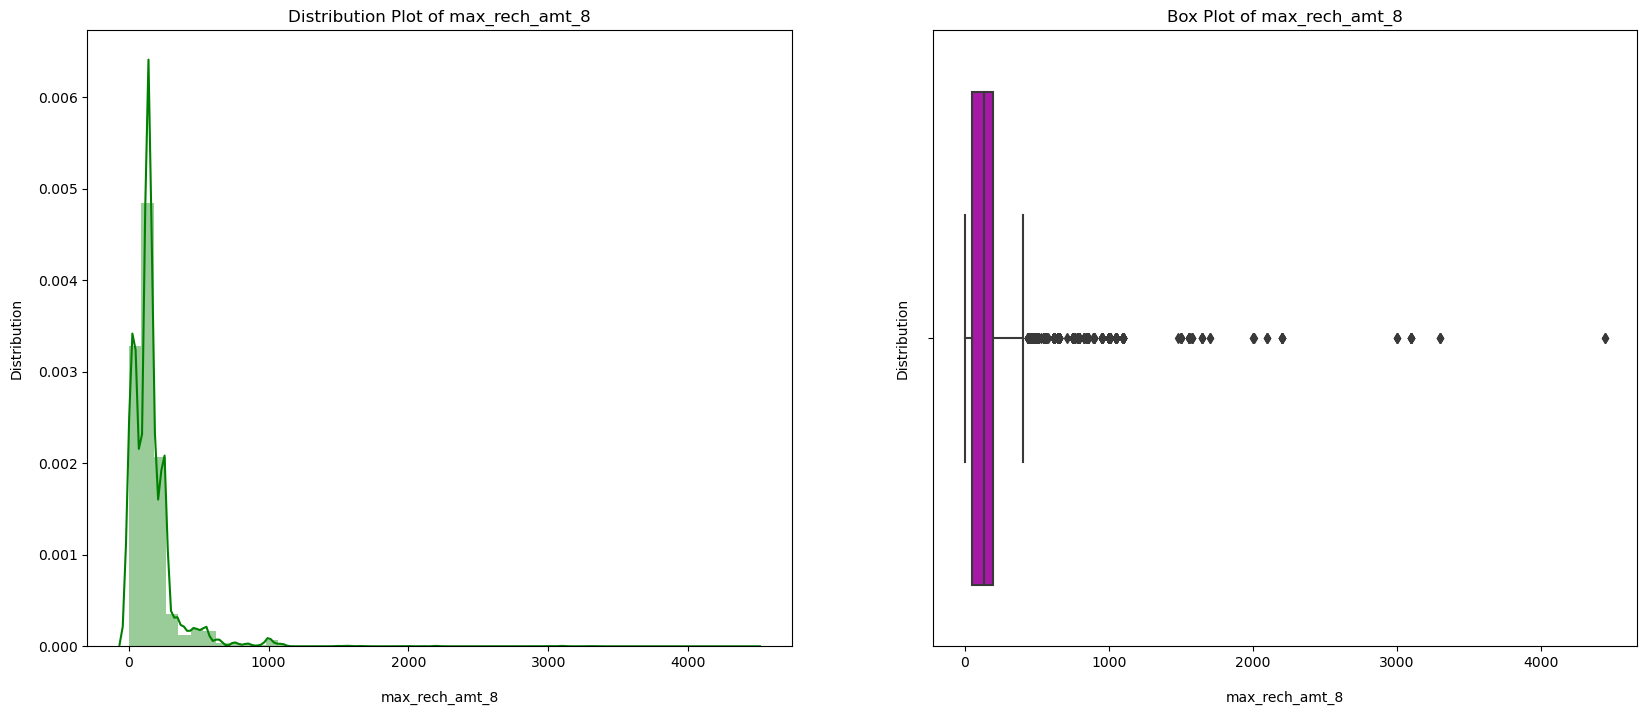

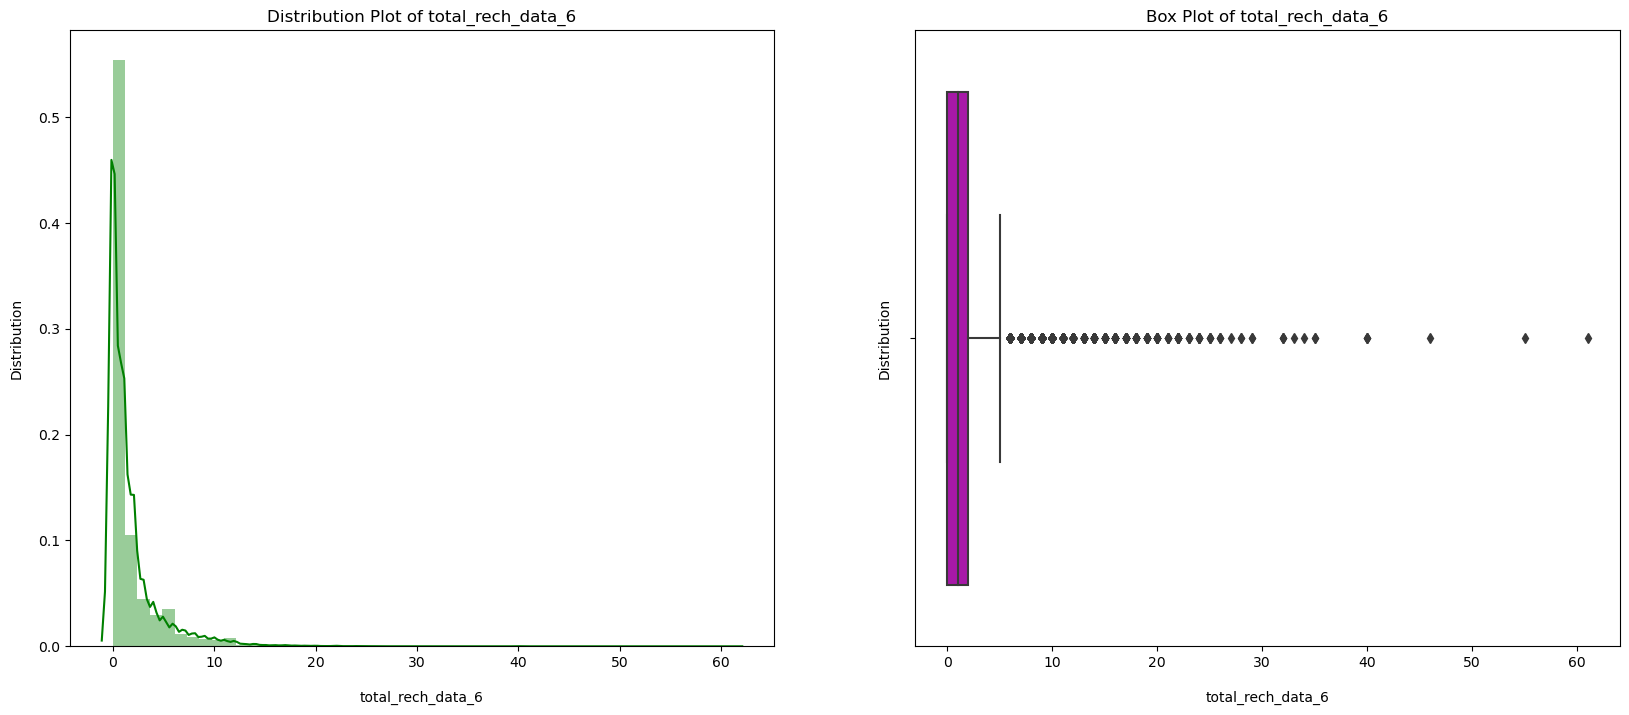

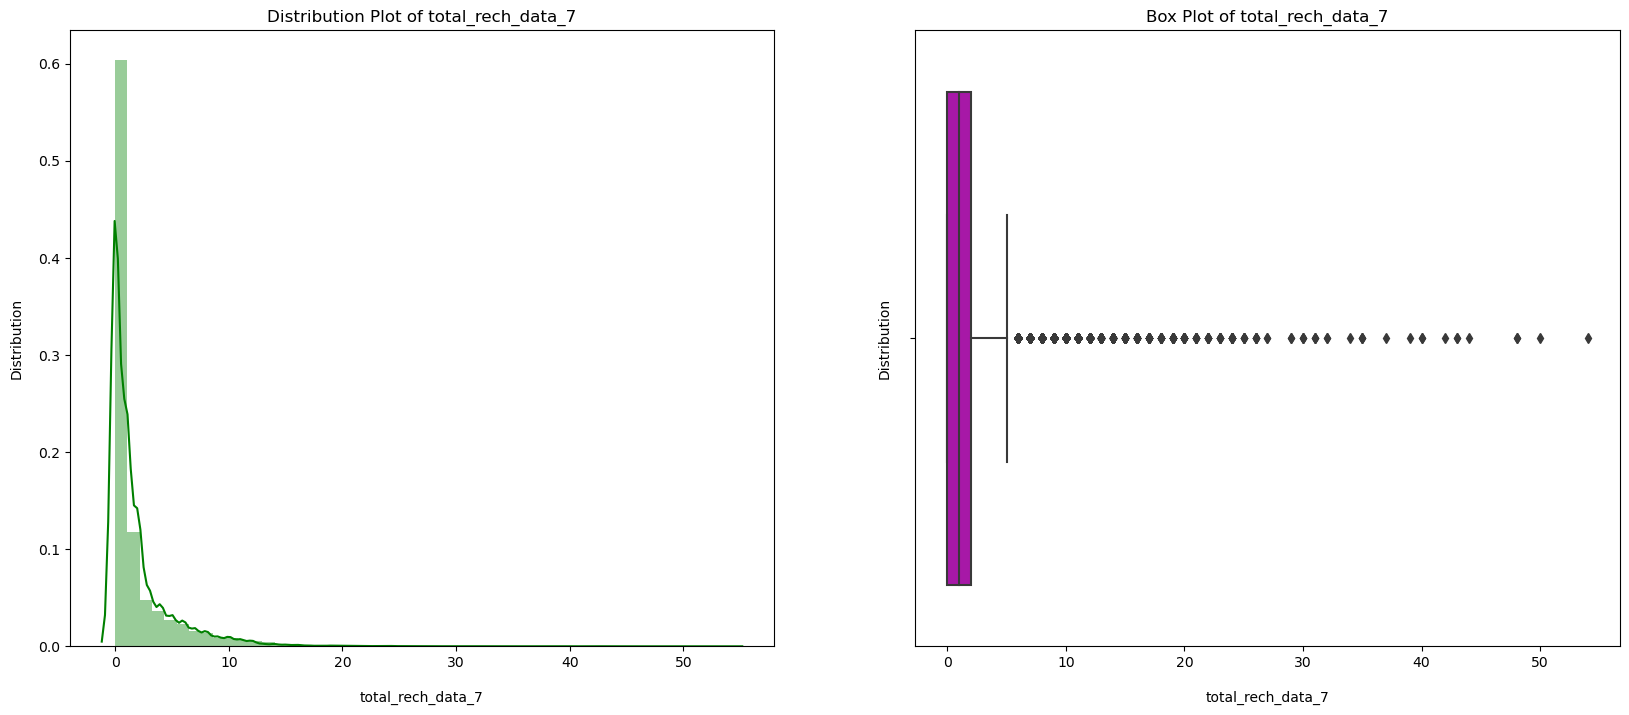

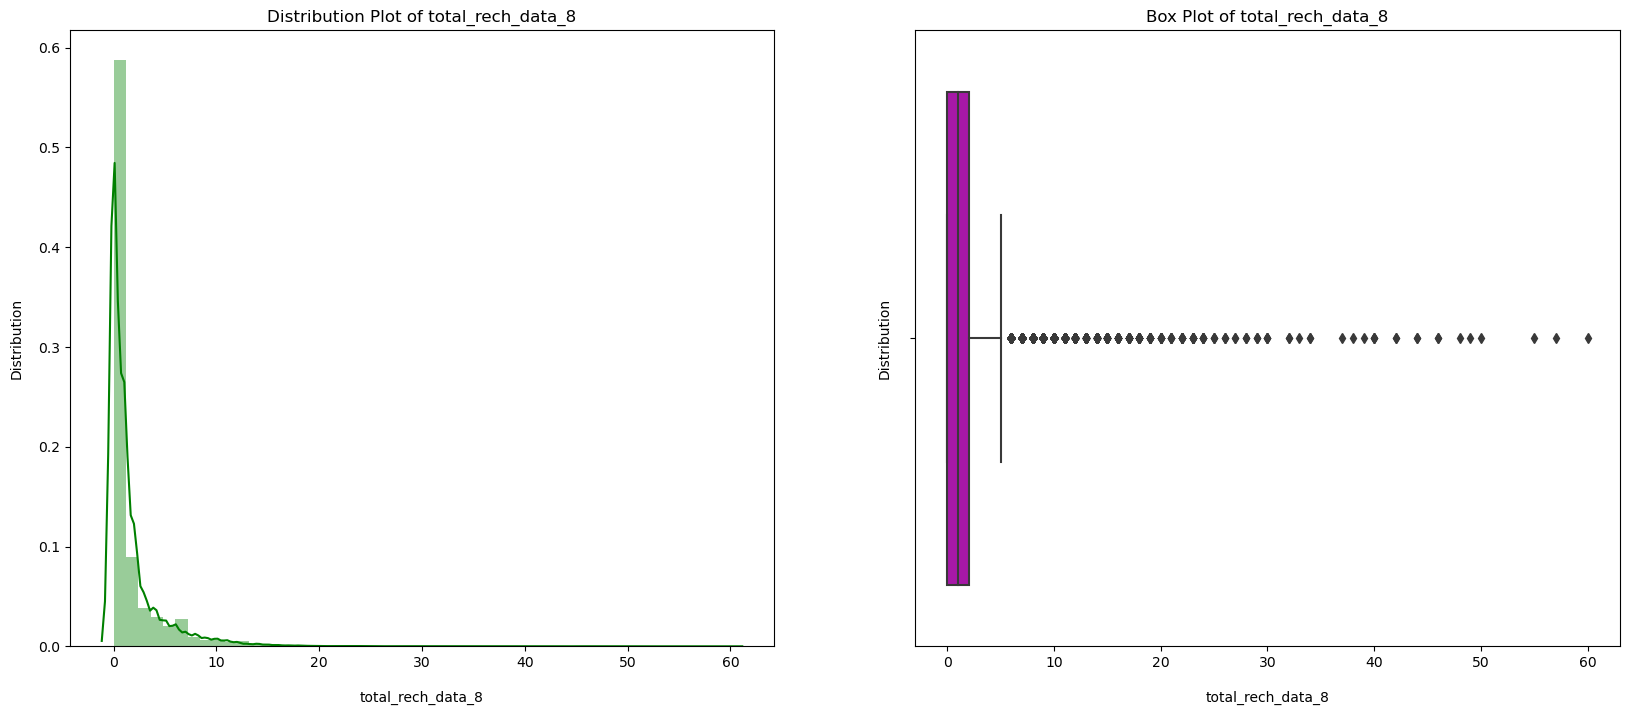

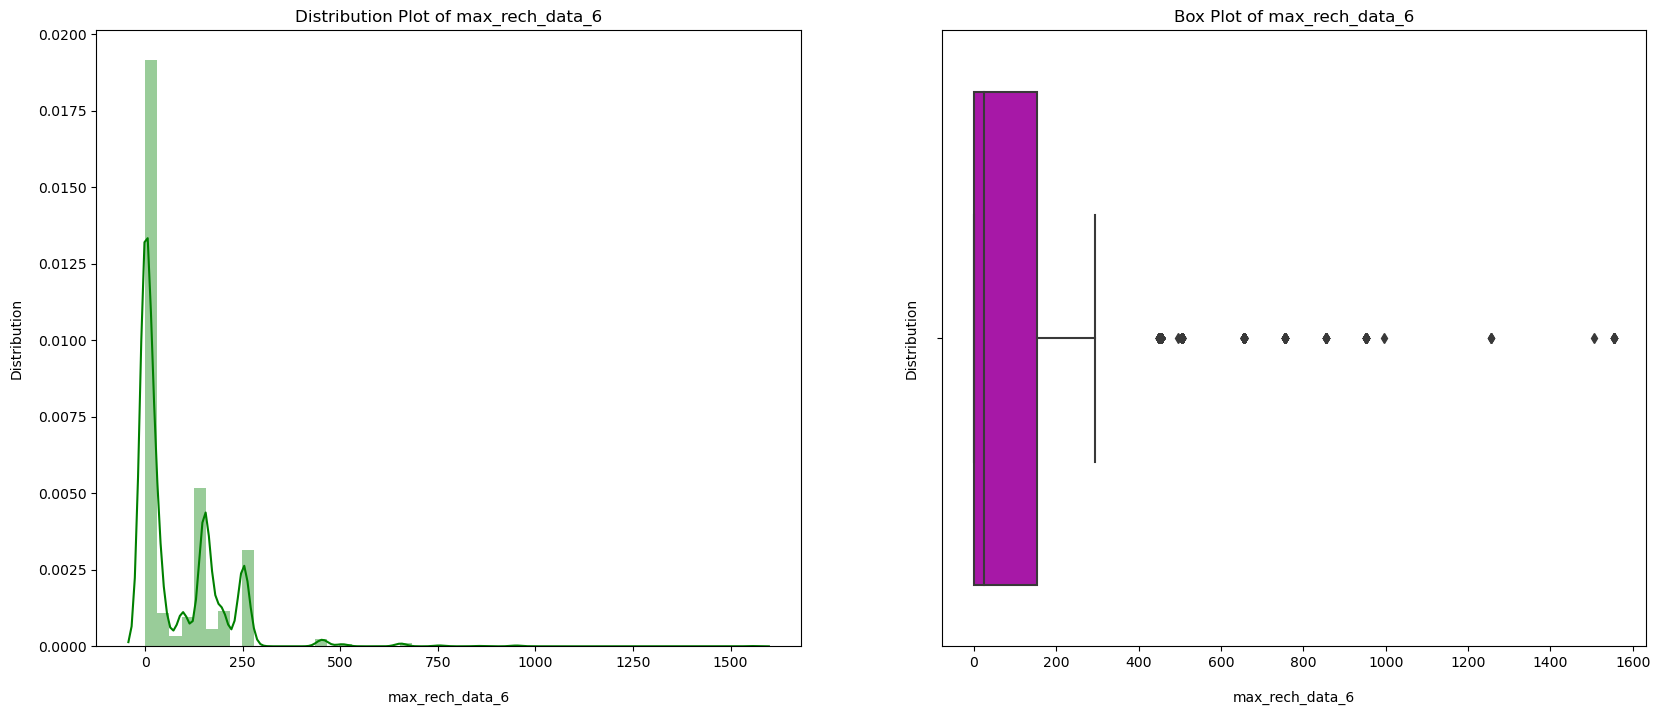

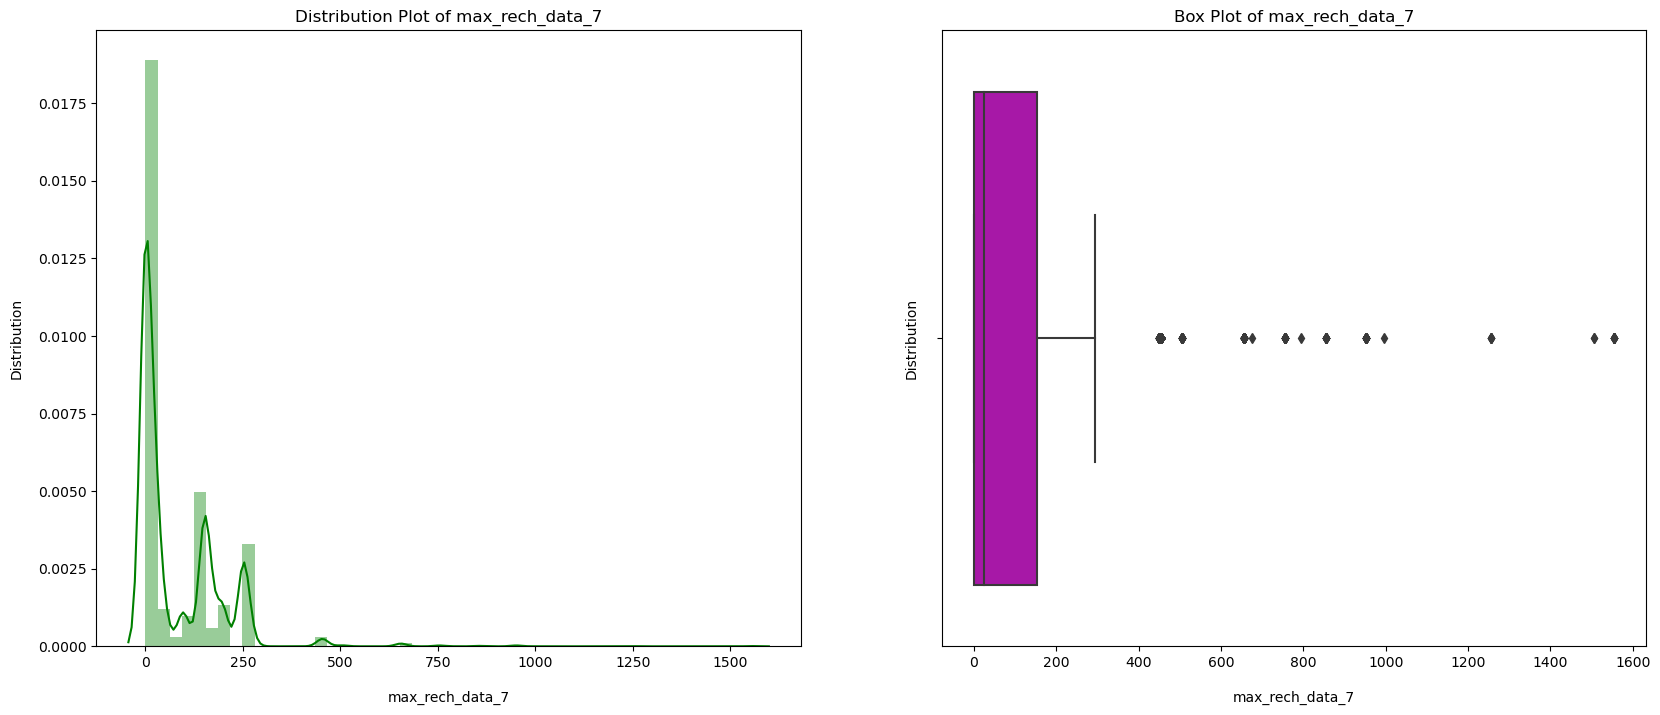

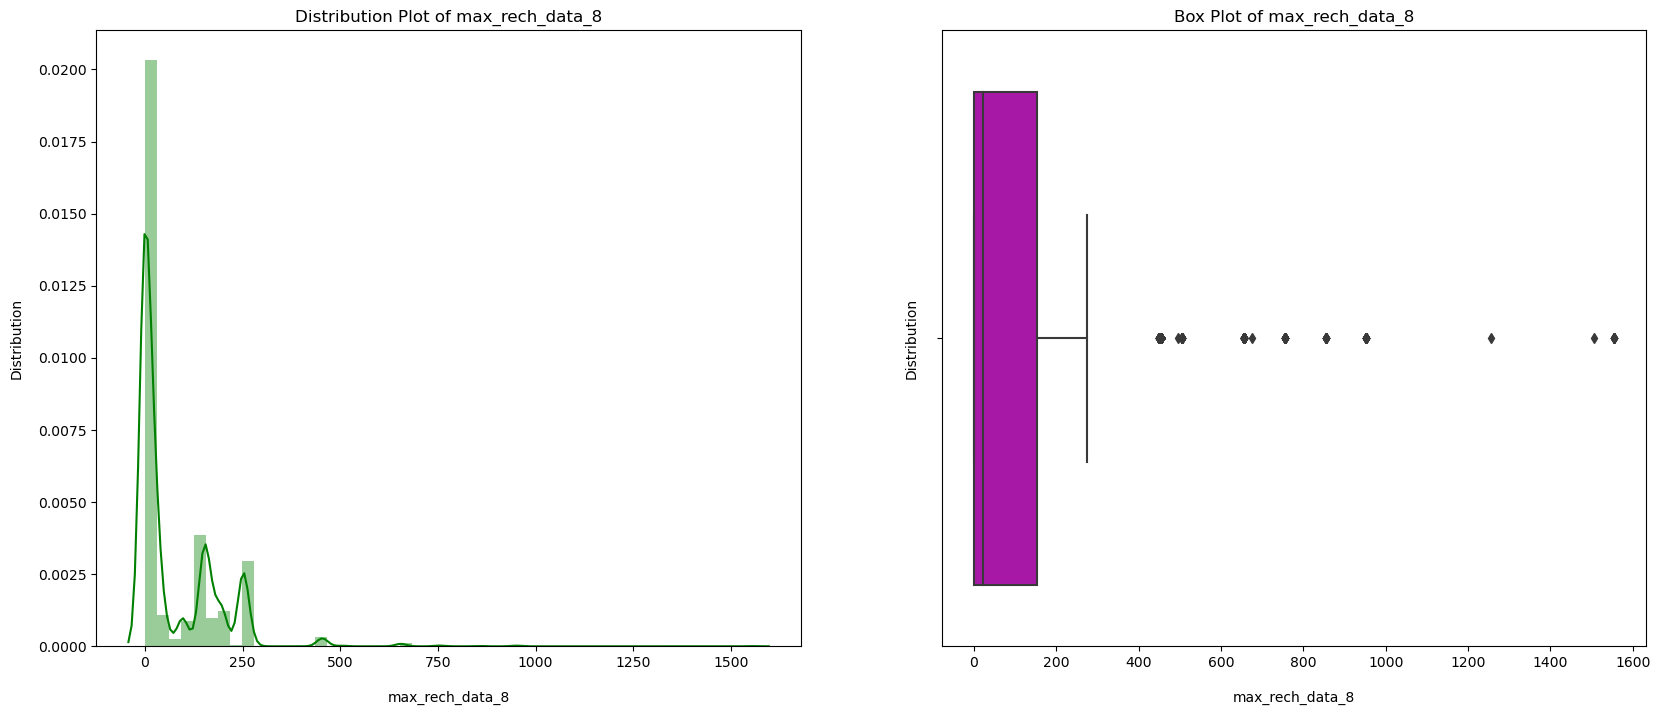

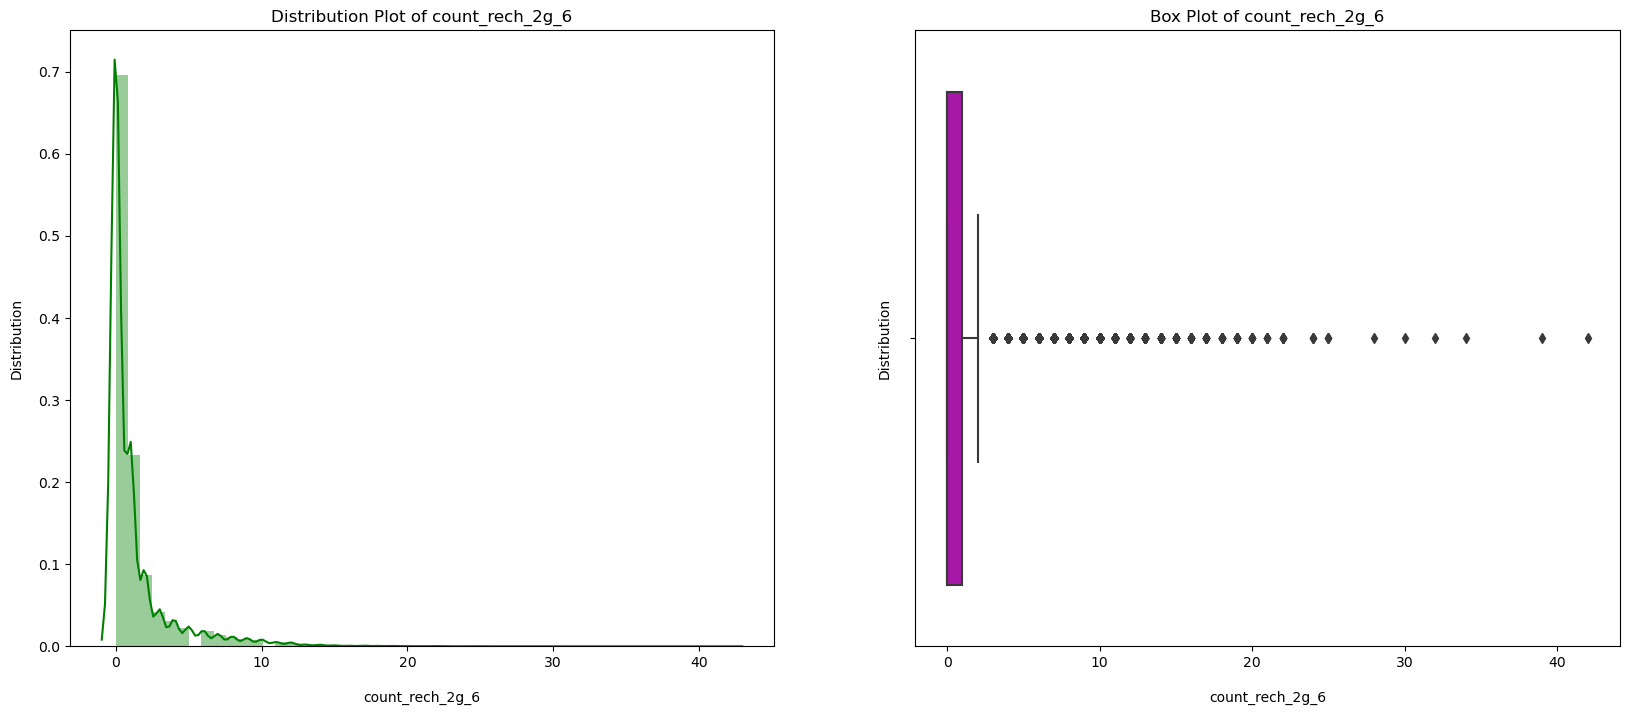

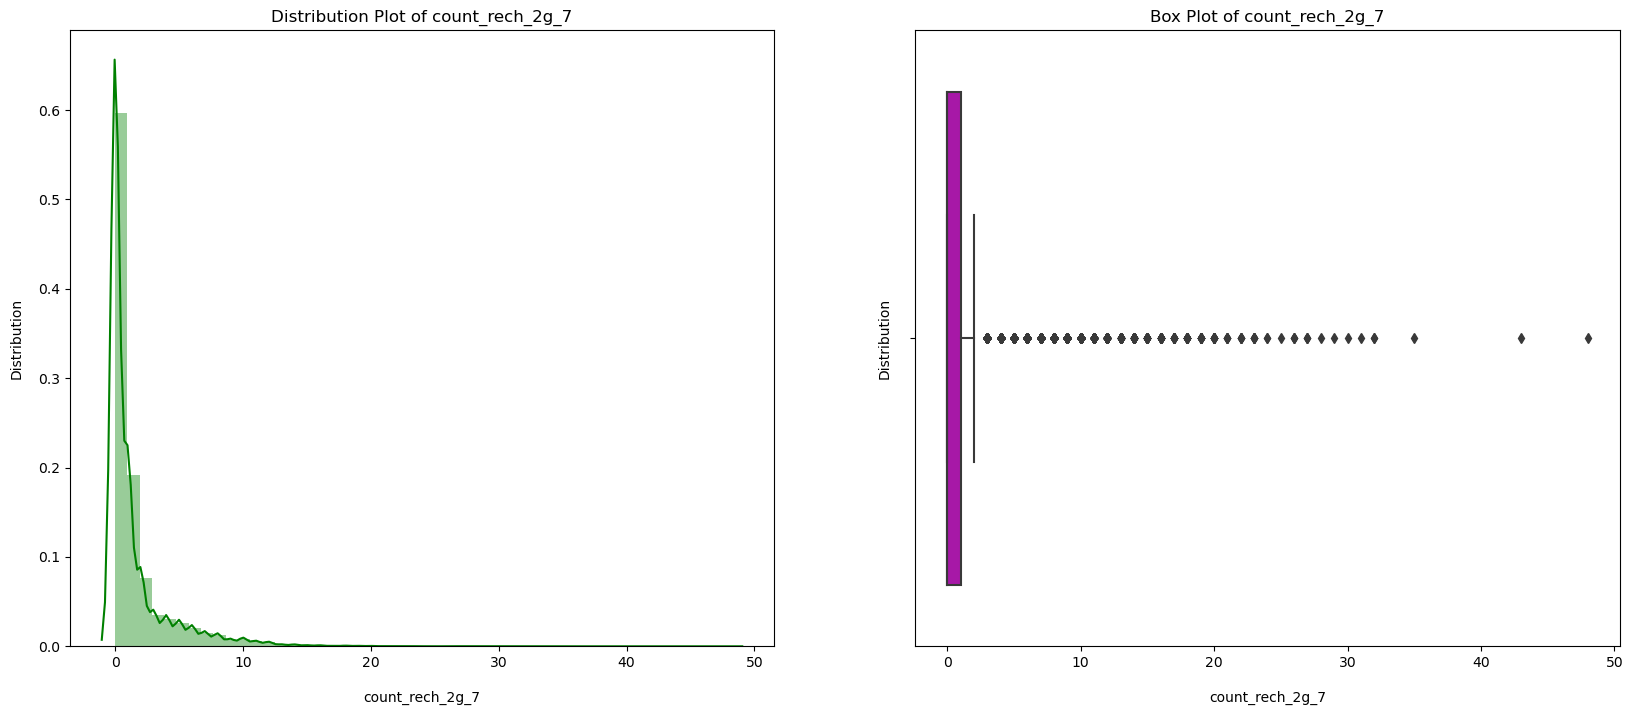

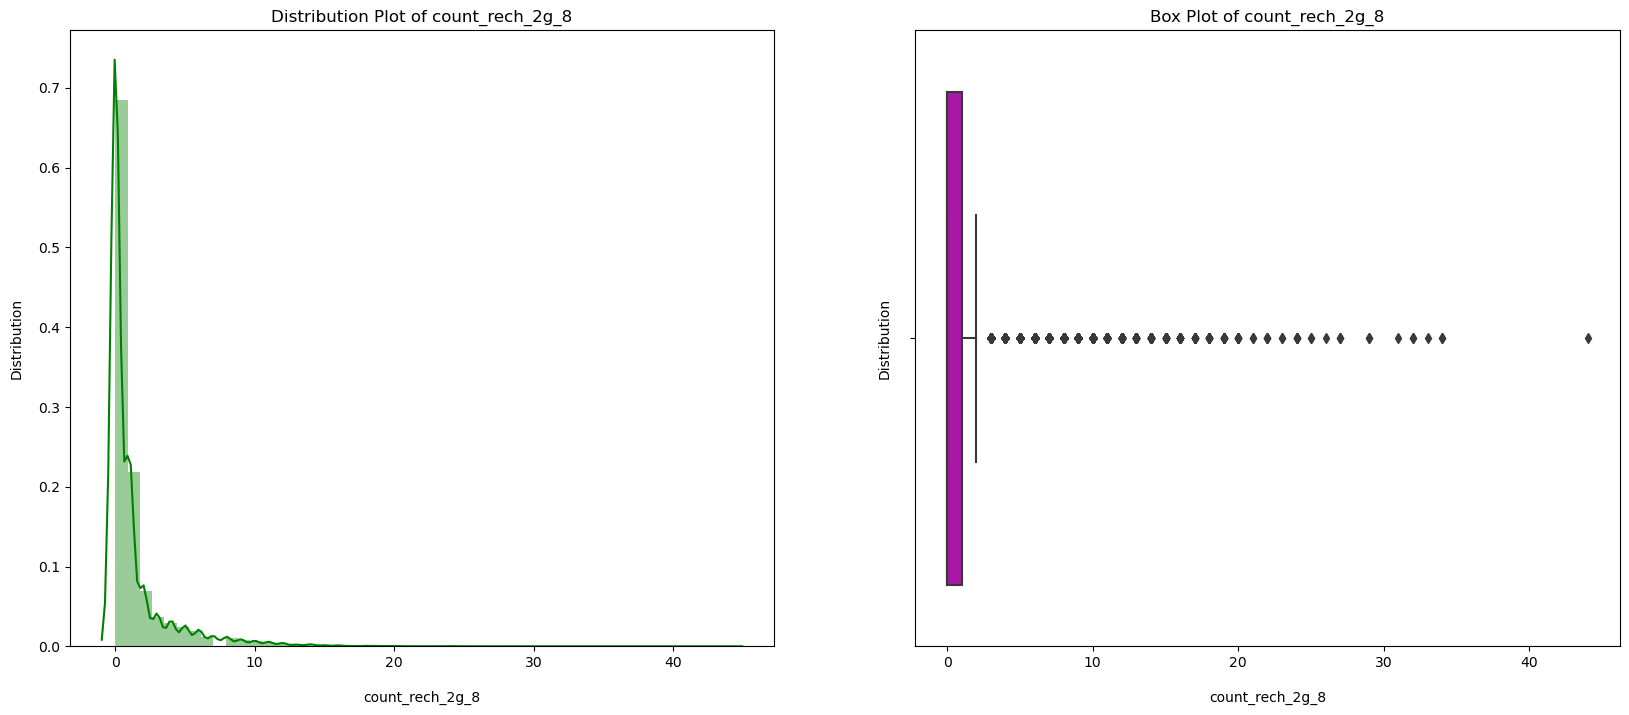

TypeError: Horizontal orientation requires numeric `x` variable.

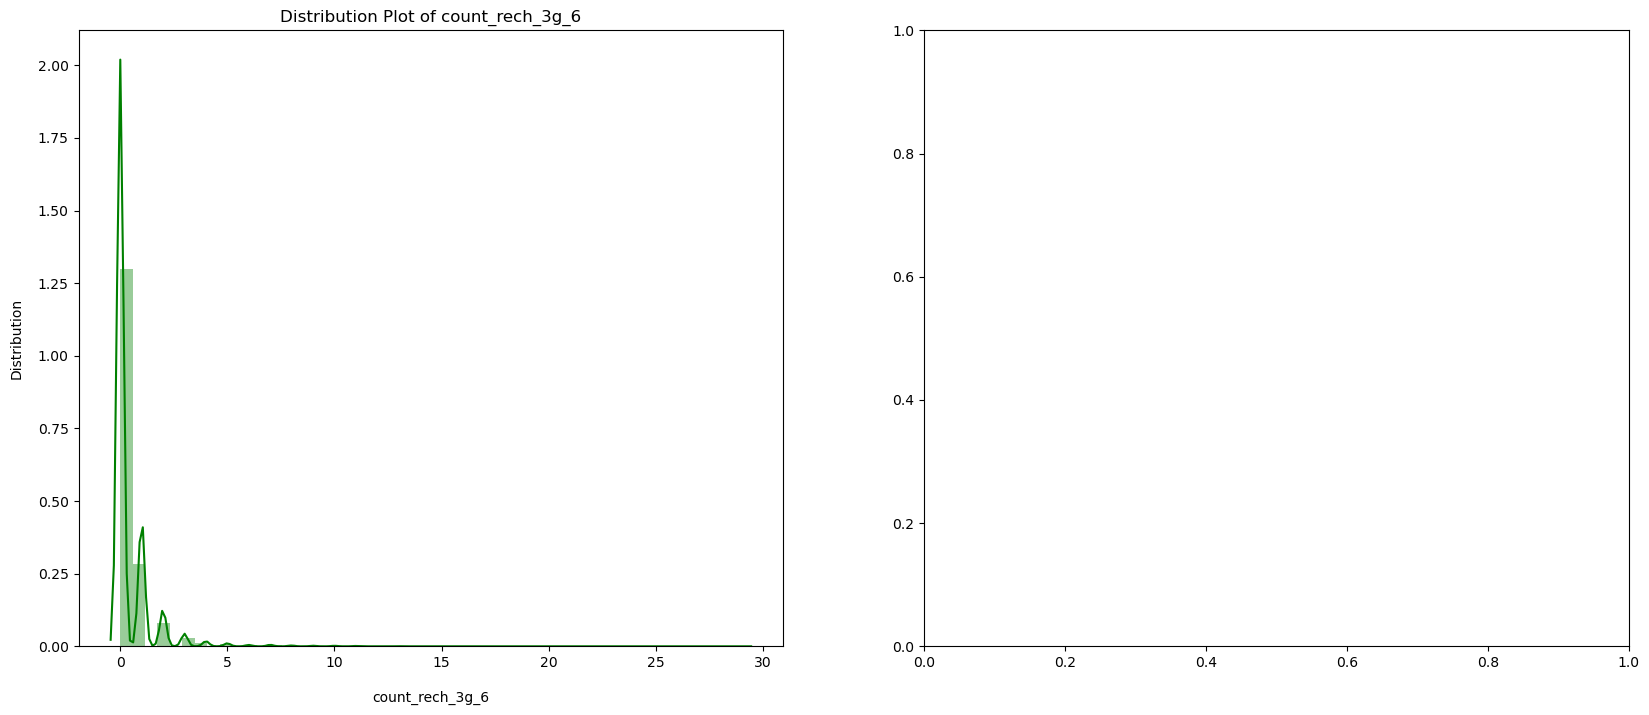

In [67]:
# Univariate Plot Analysis of Quantitative Variables

category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
counter = 1

for col_list in data.columns:
    
    if col_list not in category_list:
        
        # Call Custom Function
        plot_univariate(figsize_x = 20,
                        figsize_y = 8,
                        subplot_x = 1,
                        subplot_y = 2,
                        xlabel = col_list,
                        ylabel = "Distribution",
                        x_axis = col_list,
                        data = data,
                        wspace = 0.2)

        counter += 1

### Bivariate Analysis - Variables with hue = churn

In [68]:
# Custom Function for Bivariate Analysis

# Function Parameters   -

# y_axis                -      The series/variable to be plotted along the y-axis.

def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = data)
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = data)
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)

    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = data)
    # Call Custom Function
    set_plotting_variable(title_3, xlabel, y_axis + "_8")
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

In [69]:
data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7000842753      197.385   214.816   213.803         0.00         0.00   
7000701601     1069.180  1349.850  3171.480        57.84        54.68   
7001524846      378.721   492.223   137.362       413.69       351.03   
7002124215      514.453   597.753   637.760       102.41       132.11   
7000887461       74.350   193.897   366.966        48.96        50.66   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7000842753            0.00          0.00          0.00          0.00   
7000701601           52.29        453.43        567.16        325.91   
7001524846           35.08         94.66         80.63        136.48   
7002124215           85.14        757.93        896.68        983.39   
7000887461           33.58         85.41         89.36        205.89   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                                                               
7000842753              0.00           0.00           0.00           0.00   
7000701601             16.23          33.49          31.64          23.74   
7001524846              0.00           0.00           0.00           0.00   
7002124215              0.00           0.00           0.00           0.00   
7000887461              0.00           0.00           0.00           0.00   

               roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  \
mobile_number                                                             
7000842753              0.00           0.00          0.00          0.00   
7000701601             12.59          38.06        422.16        533.91   
7001524846              0.00           0.00        378.09        288.18   
7002124215              0.00           0.00         97.04         94.09   
7000887461              0.00           0.00        131.91        133.68   

               loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
mobile_number                                                           
7000842753             0.00          0.00          0.00          0.00   
7000701601           255.79         60.86         75.14         77.84   
7001524846            63.04        130.26        143.48         98.28   
7002124215           129.74        763.29        934.69        938.79   
7000887461           182.14          2.36          6.35         39.61   

               isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
mobile_number                                                           
7000842753              0.0          0.00          0.00           0.0   
7000701601              0.0          0.18         10.01           4.5   
7001524846              0.0          0.00          0.00           0.0   
7002124215              0.0          0.00          0.00           0.0   
7000887461              0.0          0.01          0.00           0.1   

               spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
mobile_number                                                         
7000842753              0.0          0.00          0.0          0.0   
7000701601              0.0          6.50          0.0          0.0   
7001524846              0.0         10.23          0.0          0.0   
7002124215              0.0          0.00          0.0          0.0   
7000887461              0.0         17.71          0.0          0.0   

               og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
mobile_number                                                                
7000842753             0.0            0.00            0.00            0.00   
7000701601             0.0          487.53          609.24          350.16   
7001524846             0.0          508.36          431.66          171.56   
7002124215            


Data Visualization of churn vs arpu


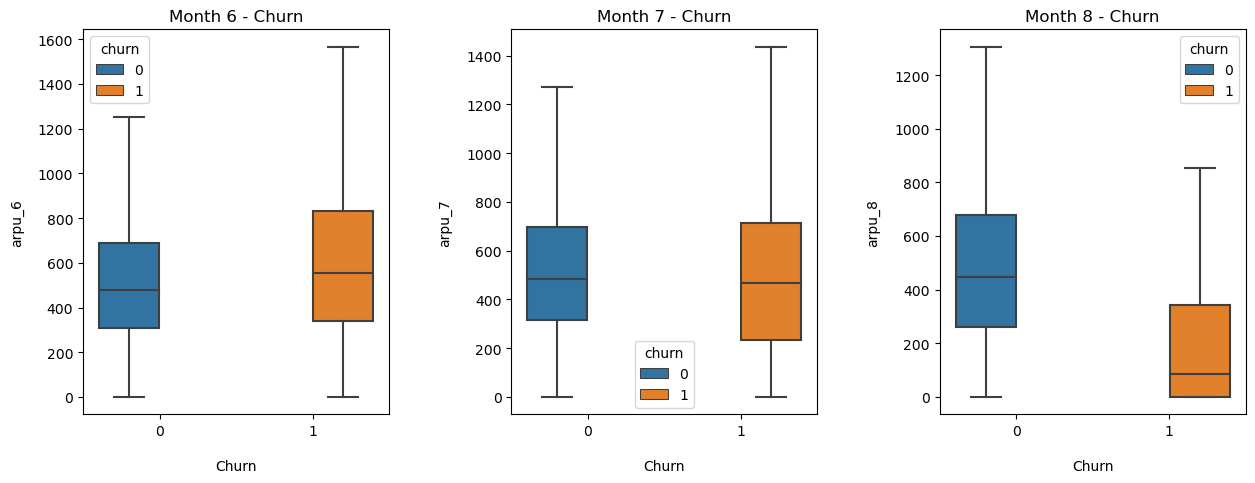


Data Visualization of churn vs onnet_mou


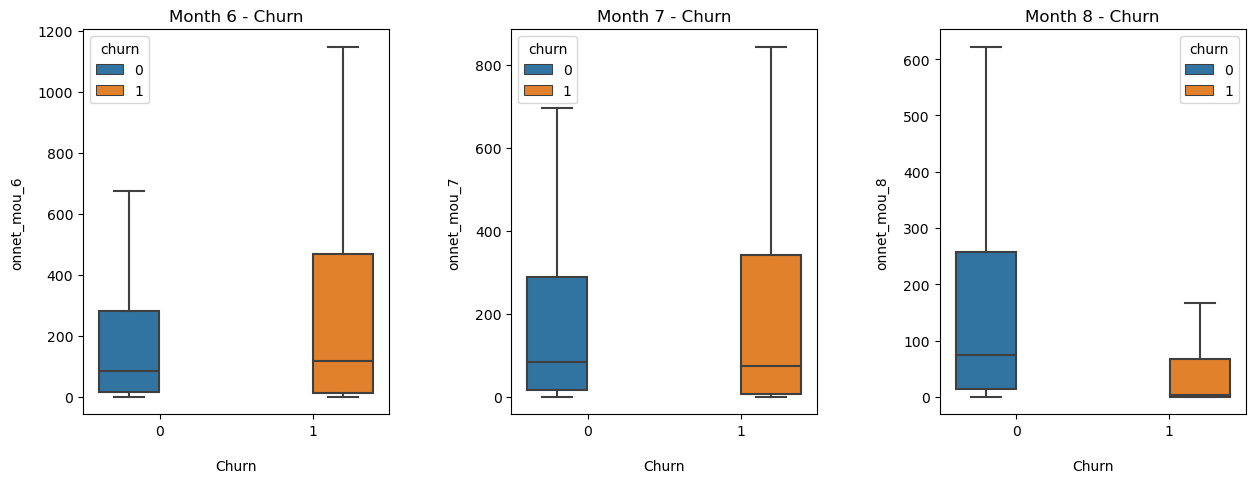


Data Visualization of churn vs offnet_mou


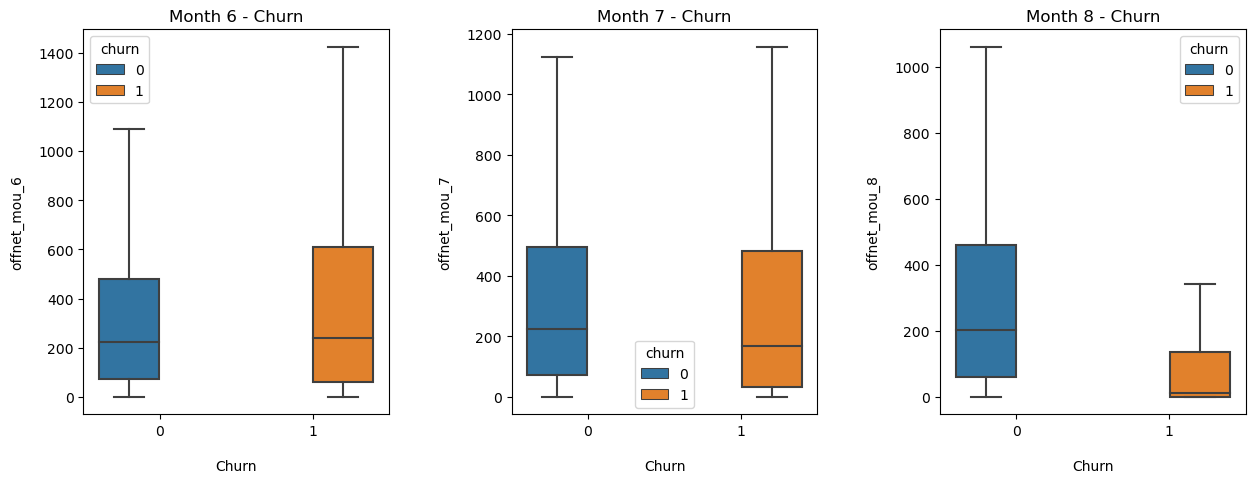


Data Visualization of churn vs total_og_mou


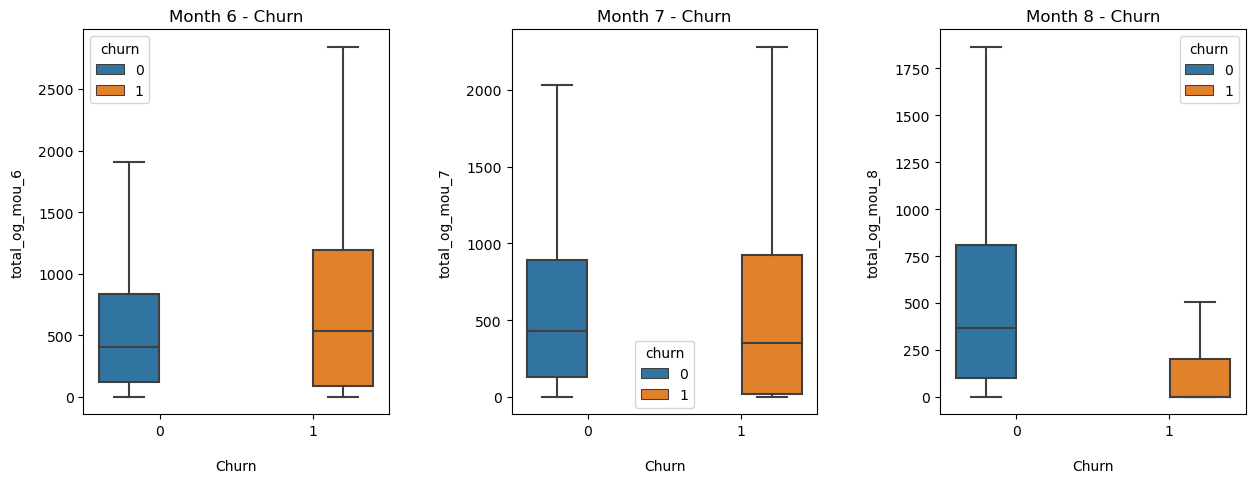


Data Visualization of churn vs total_ic_mou


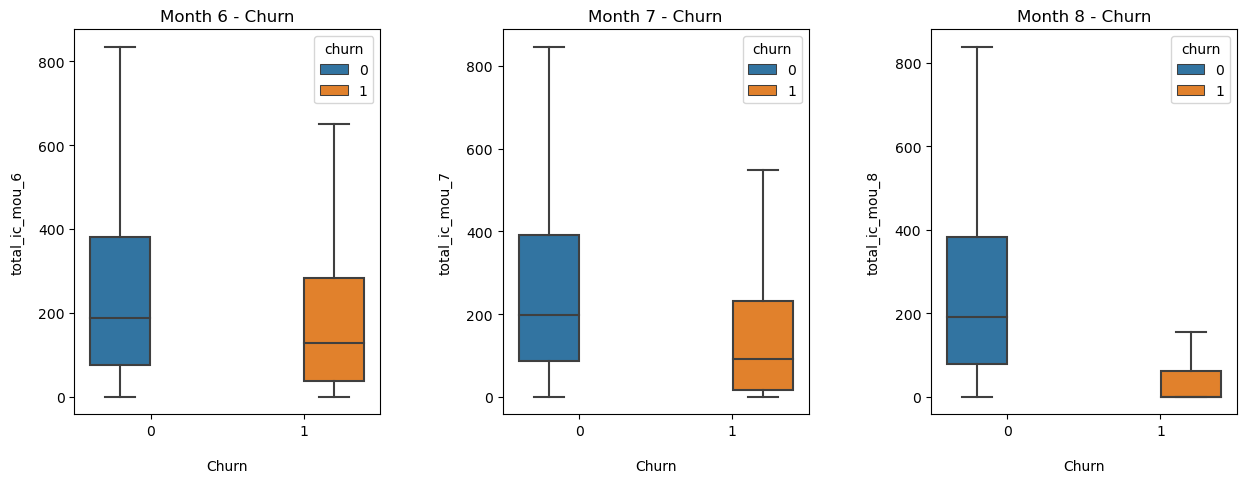


Data Visualization of churn vs total_rech_num


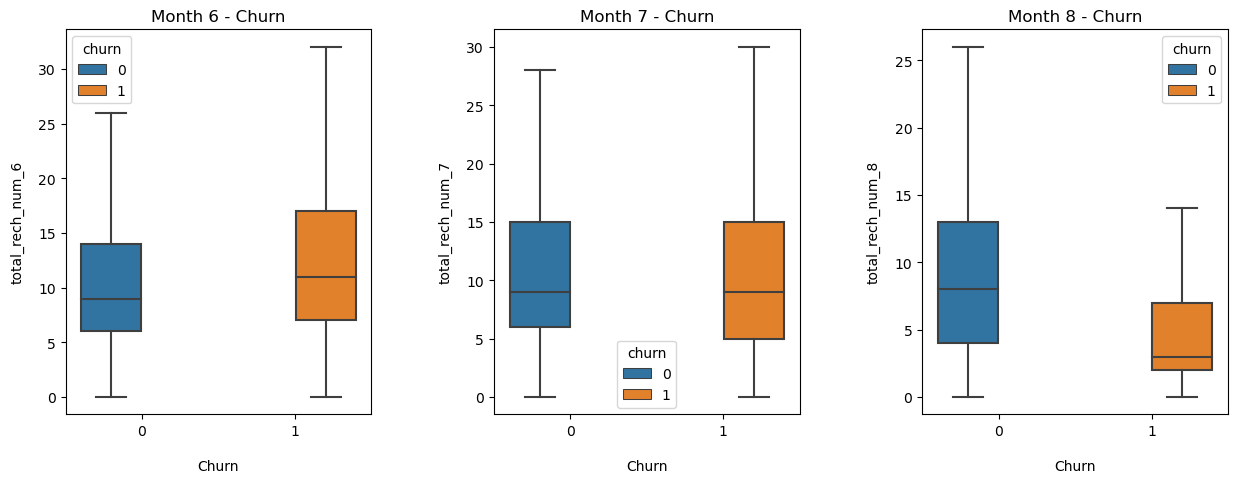


Data Visualization of churn vs total_rech_amt


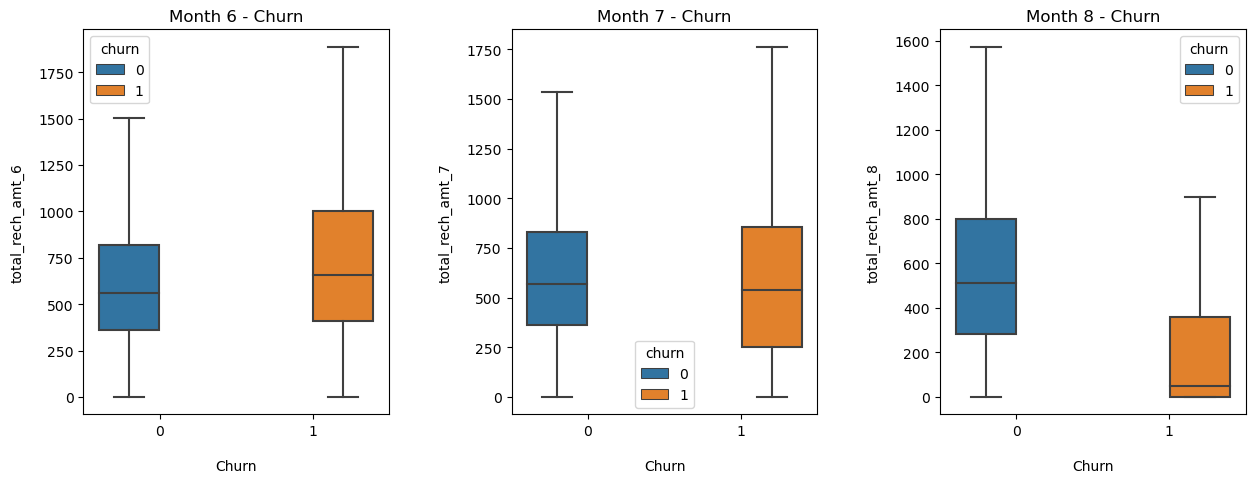


Data Visualization of churn vs total_rech_data


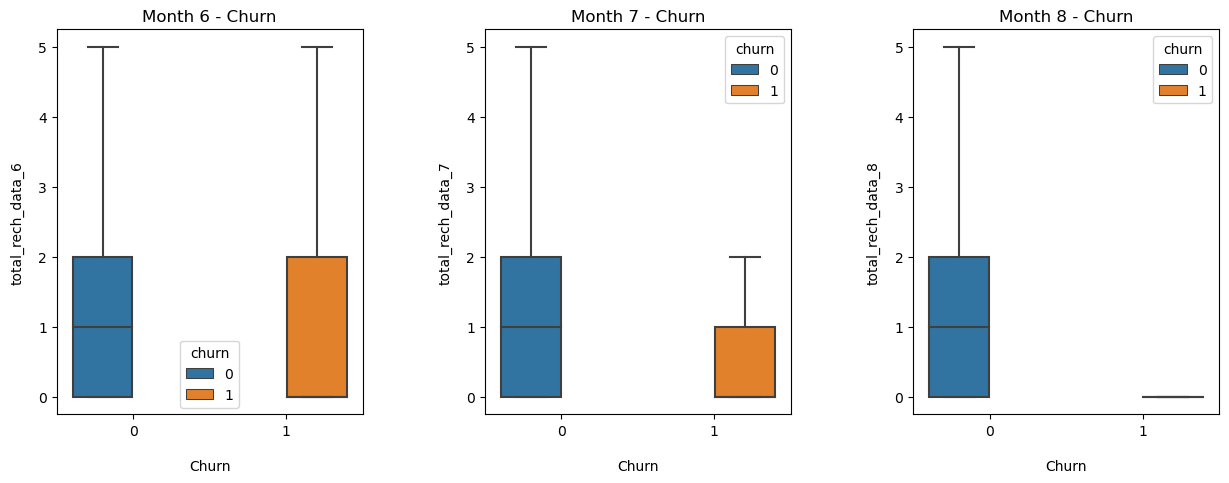


Data Visualization of churn vs vol_2g_mb


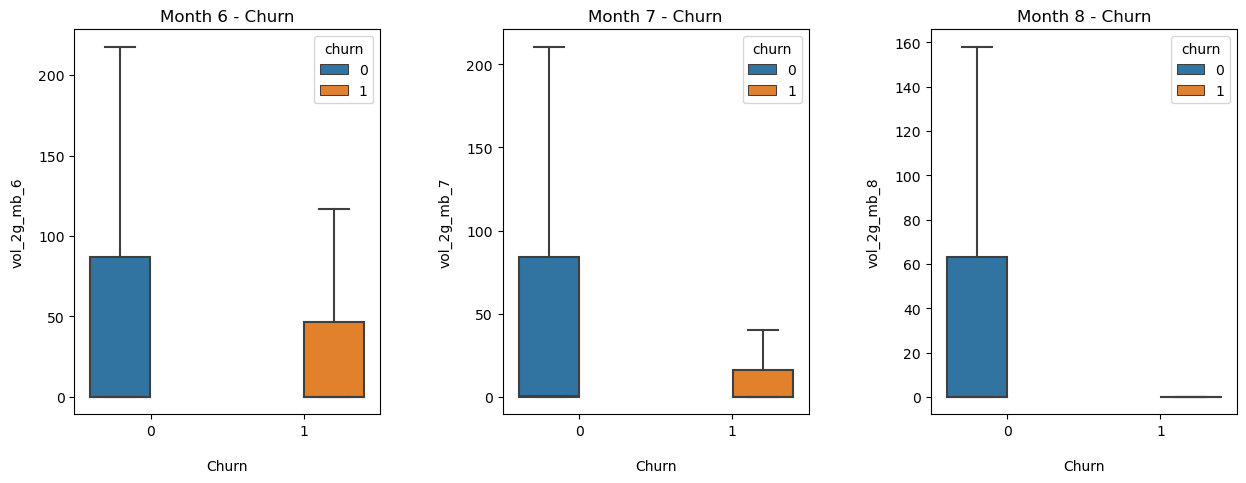


Data Visualization of churn vs vol_3g_mb


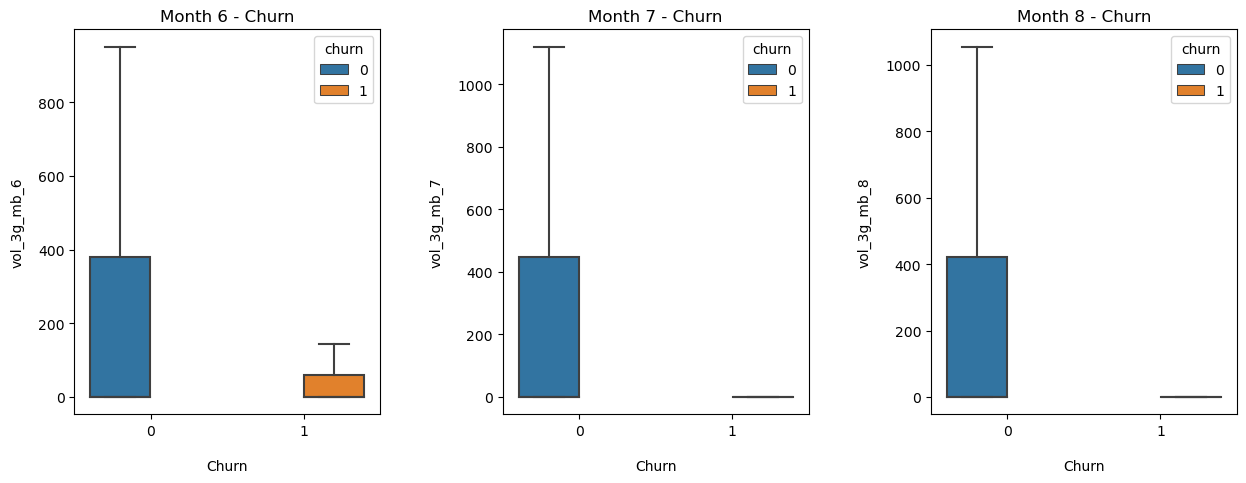


Data Visualization of churn vs vbc_3g


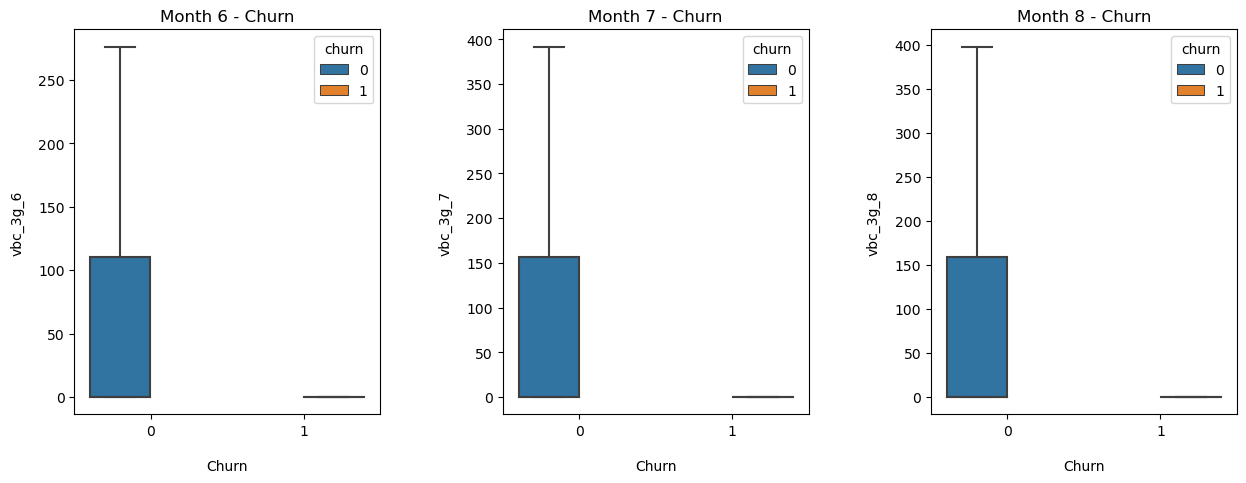


Data Visualization of churn vs total_data_rech_amt


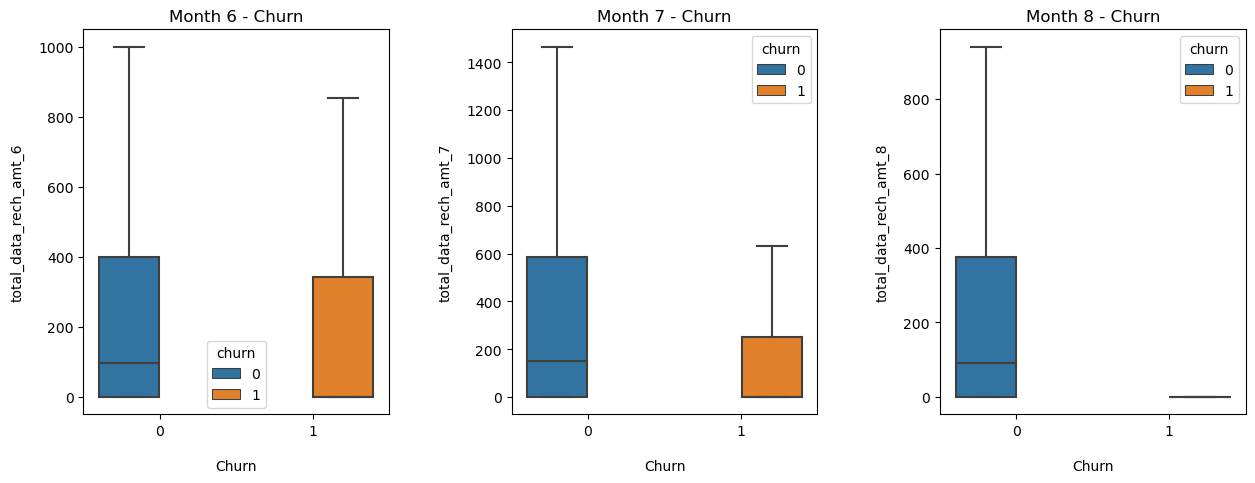

In [70]:
# Bivariate Analysis

plot_bivariate("arpu")

plot_bivariate("onnet_mou")

plot_bivariate("offnet_mou")

plot_bivariate("total_og_mou")

plot_bivariate("total_ic_mou")

plot_bivariate("total_rech_num")

plot_bivariate("total_rech_amt")

plot_bivariate("total_rech_data")

plot_bivariate("vol_2g_mb")

plot_bivariate("vol_3g_mb")

plot_bivariate("vbc_3g")

plot_bivariate("total_data_rech_amt")

### Bivariate Analysis - Quantitative Variables

In [71]:
data.corr()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                 1.000000  0.682003  0.619778     0.343885     0.218888   
arpu_7                 0.682003  1.000000  0.767143     0.212713     0.321003   
arpu_8                 0.619778  0.767143  1.000000     0.150736     0.232295   
onnet_mou_6            0.343885  0.212713  0.150736     1.000000     0.751896   
onnet_mou_7            0.218888  0.321003  0.232295     0.751896     1.000000   
onnet_mou_8            0.190011  0.270779  0.345283     0.621407     0.806452   
offnet_mou_6           0.515151  0.355968  0.279095     0.088235     0.052263   
offnet_mou_7           0.344861  0.492669  0.376009     0.036756     0.081527   
offnet_mou_8           0.293097  0.397986  0.523837     0.033265     0.073065   
roam_ic_mou_6          0.126446  0.092642  0.088353     0.024091     0.038215   
roam_ic_mou_7          0.084451  0.093467  0.077881     0.024768     0.008461   
roam_ic_mou_8          0.091188  0.093837  0.110957     0.044219     0.037248   
roam_og_mou_6          0.193762  0.134787  0.130101     0.076006     0.082124   
roam_og_mou_7          0.144104  0.180120  0.141780     0.075626     0.068651   
roam_og_mou_8          0.125665  0.152270  0.199539     0.073057     0.083897   
loc_og_mou_6           0.332272  0.215675  0.208371     0.293235     0.201469   
loc_og_mou_7           0.250254  0.305336  0.264363     0.225099     0.302650   
loc_og_mou_8           0.228189  0.256323  0.347087     0.188050     0.238189   
std_og_mou_6           0.389018  0.250161  0.148893     0.628700     0.469192   
std_og_mou_7           0.233674  0.382571  0.257377     0.449339     0.625063   
std_og_mou_8           0.187182  0.306308  0.398798     0.369663     0.508153   
isd_og_mou_6           0.468214  0.420003  0.397011    -0.014594    -0.014313   
isd_og_mou_7           0.423341  0.511164  0.440010    -0.016056    -0.014017   
isd_og_mou_8           0.415527  0.454754  0.457025    -0.014064    -0.012222   
spl_og_mou_6           0.122977  0.068380  0.100929     0.098952     0.061966   
spl_og_mou_7           0.068927  0.115440  0.124794     0.079091     0.110041   
spl_og_mou_8           0.045037  0.070322  0.107687     0.083549     0.110168   
og_others_6            0.054344  0.018084  0.013613     0.054322     0.028640   
og_others_7            0.024506  0.026200  0.015812    -0.000490    -0.000414   
og_others_8            0.015547  0.017888  0.012377    -0.003241     0.002485   
total_og_mou_6         0.560203  0.368902  0.274829     0.717400     0.525254   
total_og_mou_7         0.369345  0.538390  0.400670     0.521161     0.720013   
total_og_mou_8         0.309954  0.431726  0.560766     0.421604     0.569349   
loc_ic_mou_6           0.181510  0.109477  0.116134     0.027408    -0.018035   
loc_ic_mou_7           0.142665  0.165308  0.158176     0.011159     0.019095   
loc_ic_mou_8           0.124397  0.143613  0.208142    -0.003189     0.005993   
std_ic_mou_6           0.124386  0.087636  0.073925     0.082800     0.049152   
std_ic_mou_7           0.085947  0.123759  0.099254     0.053420     0.076198   
std_ic_mou_8           0.079674  0.116897  0.139846     0.041200     0.064282   
total_ic_mou_6         0.225125  0.140187  0.143012     0.051286    -0.002348   
total_ic_mou_7         0.169390  0.211376  0.193330     0.025798     0.042644   
total_ic_mou_8         0.151226  0.184371  0.253321     0.009481     0.026406   
spl_ic_mou_6           0.030974  0.007778  0.009197     0.035402     0.016282   
spl_ic_mou_7          -0.034140 -0.015937 -0.016210    -0.030378    -0.012002   
spl_ic_mou_8          -0.011639 -0.007898  0.021543    -0.021840    -0.029643   
isd_ic_mou_6           0.101627  0.059973  0.070237    -0.016210    -0.023682   
isd_ic_mou_7           0.063595  0.100083  0.087563    -0.021260    -0.016569   
isd_ic_mou_8           0.071179  0.082853  0.106602    -0.017470    -0.016902   
ic_others_6            0.016058  0.008028  0.010694    -

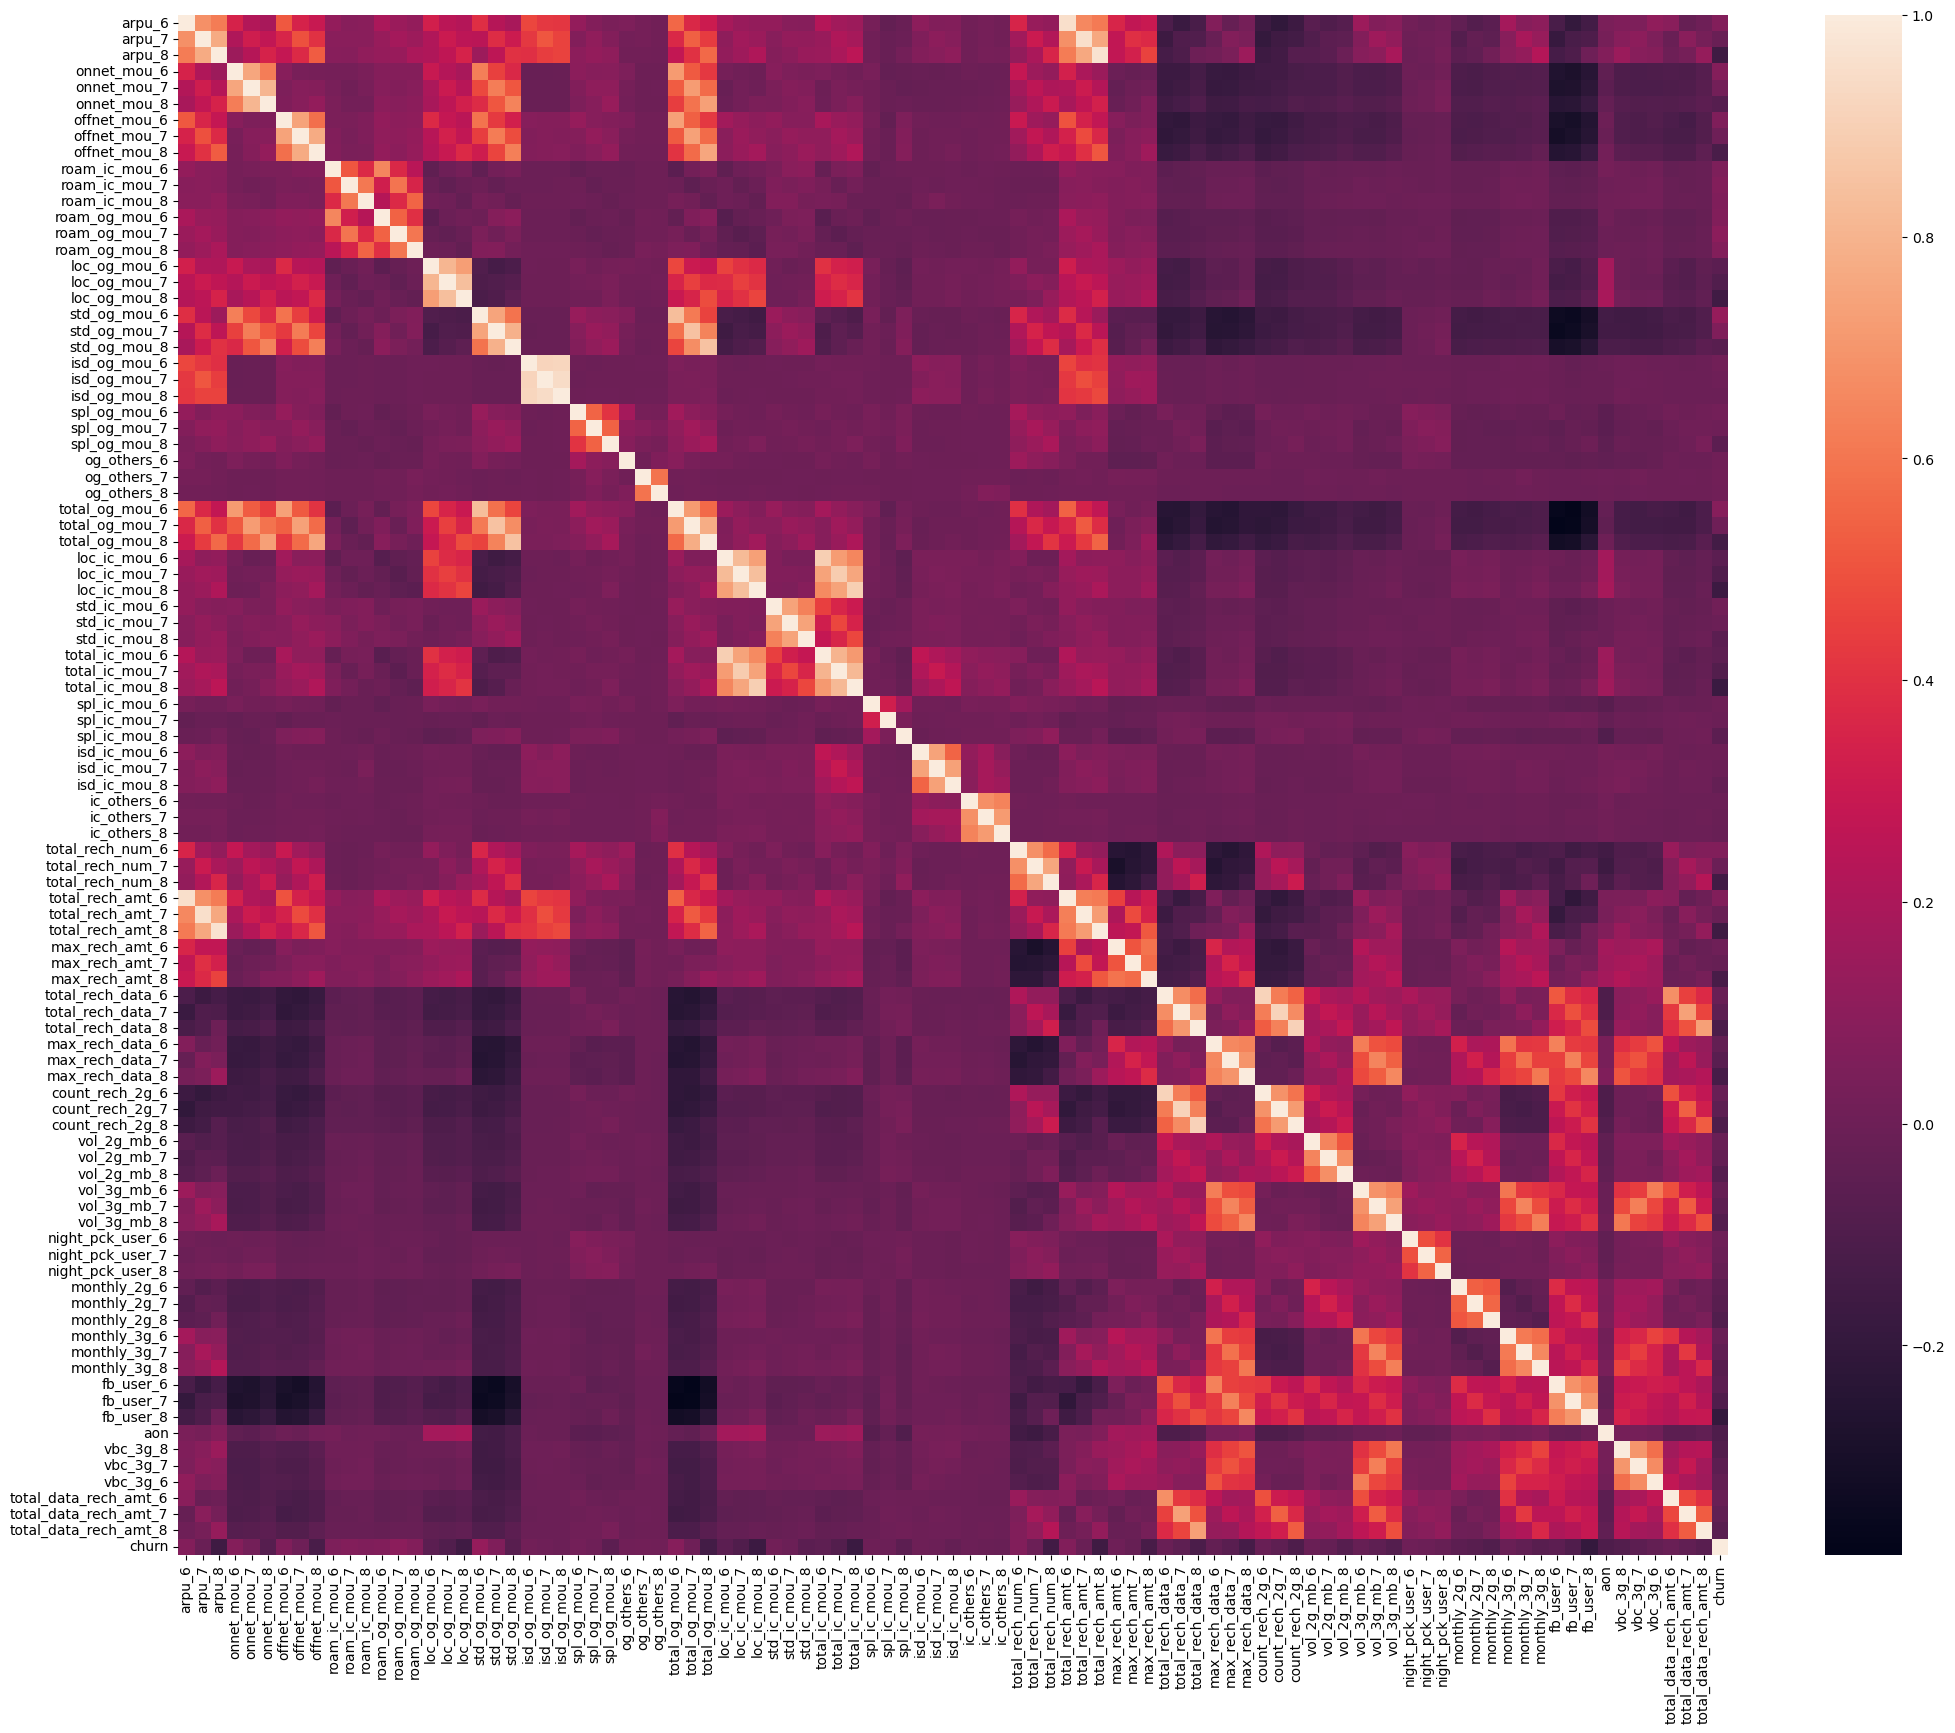

In [72]:
plt.figure(figsize = (25, 20))

sns.heatmap(data.corr())

plt.show()

Now from the above correlation matrix we can see there are some highly correlated features. Lets try to extract such highly correlated features.

In [73]:
corr_matrix = data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8']


Total features with high correlation -  24


#### There are 24 features that are highly corelated (corelation > 0.75)

#### Grouping Categories with less Contribution

In [74]:
categorical = data.dtypes == 'category'
categorical_vars = data.columns[categorical].to_list()
ind_categorical_vars = set(categorical_vars) - {'Churn'} #independent categorical variables
ind_categorical_vars

{'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

In [75]:
# Finding & Grouping categories with less than 1% contribution in each column into "Others"

from tabulate import tabulate

for col in ind_categorical_vars : 
    category_counts = 100*data[col].value_counts(normalize=True)
    print('\n',tabulate(pd.DataFrame(category_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_categories = category_counts[category_counts <= 1].index.to_list()
    print(f"Replaced {low_count_categories} in {col} with category : Others")
    data[col].replace(low_count_categories,'Others',inplace=True)
    


 +----+---------------+
|    |   sachet_2g_6 |
|----+---------------|
|  0 |    70.8121    |
|  1 |    10.3708    |
|  2 |     5.02615   |
|  3 |     3.13171   |
|  4 |     2.47787   |
|  5 |     1.72344   |
|  6 |     1.47867   |
|  7 |     1.12661   |
|  8 |     0.965665  |
|  9 |     0.764485  |
| 10 |     0.650483  |
| 11 |     0.395655  |
| 12 |     0.36883   |
| 13 |     0.174356  |
| 14 |     0.140826  |
| 15 |     0.0938841 |
| 17 |     0.0603541 |
| 16 |     0.0536481 |
| 19 |     0.0435891 |
| 18 |     0.0402361 |
| 22 |     0.023471  |
| 20 |     0.020118  |
| 21 |     0.016765  |
| 24 |     0.010059  |
| 25 |     0.010059  |
| 27 |     0.003353  |
| 30 |     0.003353  |
| 32 |     0.003353  |
| 34 |     0.003353  |
| 39 |     0.003353  |
| 42 |     0.003353  |
| 28 |     0         |
+----+---------------+ 

Replaced [8, 9, 10, 11, 12, 13, 14, 15, 17, 16, 19, 18, 22, 20, 21, 24, 25, 27, 30, 32, 34, 39, 42, 28] in sachet_2g_6 with category : Others

 +----+---------------+
|

### Creating Dummy variables

In [76]:
dummy_vars = pd.get_dummies(data[ind_categorical_vars], drop_first=False, prefix=ind_categorical_vars, prefix_sep='_')
dummy_vars.head()

sachet_2g_6_0  sachet_2g_6_1  sachet_2g_6_2  sachet_2g_6_3  \
mobile_number                                                               
7000842753                 1              0              0              0   
7000701601                 1              0              0              0   
7001524846                 1              0              0              0   
7002124215                 1              0              0              0   
7000887461                 1              0              0              0   

               sachet_2g_6_4  sachet_2g_6_5  sachet_2g_6_6  sachet_2g_6_7  \
mobile_number                                                               
7000842753                 0              0              0              0   
7000701601                 0              0              0              0   
7001524846                 0              0              0              0   
7002124215                 0              0              0              0   
7000887461                 0              0              0              0   

               sachet_2g_6_Others  sachet_3g_7_0  sachet_3g_7_1  \
mobile_number                                                     
7000842753                      0              1              0   
7000701601                      0              1              0   
7001524846                      0              1              0   
7002124215                      0              1              0   
7000887461                      0              1              0   

               sachet_3g_7_2  sachet_3g_7_Others  sachet_2g_8_0  \
mobile_number                                                     
7000842753                 0                   0              1   
7000701601                 0                   0              1   
7001524846                 0                   0              0   
7002124215                 0                   0              1   
7000887461                 0                   0              1   

               sachet_2g_8_1  sachet_2g_8_2  sachet_2g_8_3  sachet_2g_8_4  \
mobile_number                                                               
7000842753                 0              0              0              0   
7000701601                 0              0              0              0   
7001524846                 0              0              1              0   
7002124215                 0              0              0              0   
7000887461                 0              0              0              0   

               sachet_2g_8_5  sachet_2g_8_6  sachet_2g_8_Others  \
mobile_number                                                     
7000842753                 0              0                   0   
7000701601                 0              0                   0   
7001524846                 0              0                   0   
7002124215                 0              0                   0   
7000887461                 0              0                   0   

               count_rech_3g_8_0.0  count_rech_3g_8_1.0  count_rech_3g_8_2.0  \
mobile_number                                                                  
7000842753                       0                    1                    0   
7000701601                       1                    0                    0   
7001524846                       1                    0                    0   
7002124215                       1                    0                    0   
7000887461                       0                    0                    1   

               count_rech_3g_8_3.0  count_rech_3g_8_Others  sachet_3g_6_0  \
mobile_number                                                               
7000842753                       0                       0              1   
7000701601                       0                       0              1   
7001524846                       0                       0              1   
7002124215                       0     

In [77]:
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list() # Using category 'Others' in each column as reference. 
dummy_vars.drop(columns=reference_cols, inplace=True)
reference_cols

['sachet_2g_6_Others',
 'sachet_3g_7_Others',
 'sachet_2g_8_Others',
 'count_rech_3g_8_Others',
 'sachet_3g_6_Others',
 'sachet_3g_8_Others',
 'sachet_2g_7_Others',
 'count_rech_3g_7_Others',
 'count_rech_3g_6_Others']

In [78]:
# concatenating dummy variables with original 'data'
data.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
data = pd.concat([data, dummy_vars], axis=1)
data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7000842753      197.385   214.816   213.803         0.00         0.00   
7000701601     1069.180  1349.850  3171.480        57.84        54.68   
7001524846      378.721   492.223   137.362       413.69       351.03   
7002124215      514.453   597.753   637.760       102.41       132.11   
7000887461       74.350   193.897   366.966        48.96        50.66   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7000842753            0.00          0.00          0.00          0.00   
7000701601           52.29        453.43        567.16        325.91   
7001524846           35.08         94.66         80.63        136.48   
7002124215           85.14        757.93        896.68        983.39   
7000887461           33.58         85.41         89.36        205.89   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                                                               
7000842753              0.00           0.00           0.00           0.00   
7000701601             16.23          33.49          31.64          23.74   
7001524846              0.00           0.00           0.00           0.00   
7002124215              0.00           0.00           0.00           0.00   
7000887461              0.00           0.00           0.00           0.00   

               roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  \
mobile_number                                                             
7000842753              0.00           0.00          0.00          0.00   
7000701601             12.59          38.06        422.16        533.91   
7001524846              0.00           0.00        378.09        288.18   
7002124215              0.00           0.00         97.04         94.09   
7000887461              0.00           0.00        131.91        133.68   

               loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
mobile_number                                                           
7000842753             0.00          0.00          0.00          0.00   
7000701601           255.79         60.86         75.14         77.84   
7001524846            63.04        130.26        143.48         98.28   
7002124215           129.74        763.29        934.69        938.79   
7000887461           182.14          2.36          6.35         39.61   

               isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
mobile_number                                                           
7000842753              0.0          0.00          0.00           0.0   
7000701601              0.0          0.18         10.01           4.5   
7001524846              0.0          0.00          0.00           0.0   
7002124215              0.0          0.00          0.00           0.0   
7000887461              0.0          0.01          0.00           0.1   

               spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
mobile_number                                                         
7000842753              0.0          0.00          0.0          0.0   
7000701601              0.0          6.50          0.0          0.0   
7001524846              0.0         10.23          0.0          0.0   
7002124215              0.0          0.00          0.0          0.0   
7000887461              0.0         17.71          0.0          0.0   

               og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
mobile_number                                                                
7000842753             0.0            0.00            0.00            0.00   
7000701601             0.0          487.53          609.24          350.16   
7001524846             0.0          508.36          431.66          171.56   
7002124215            

In [80]:
data.shape

(29824, 140)

### Train- Test Split

In [81]:
y = data.pop('churn') # Predicted / Target Variable
X = data # Predictor variables

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

### Class Imbalance

In [83]:
y.value_counts(normalize=True).to_frame()

churn
0  0.920735
1  0.079265

In [84]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.086


<AxesSubplot:ylabel='churn'>

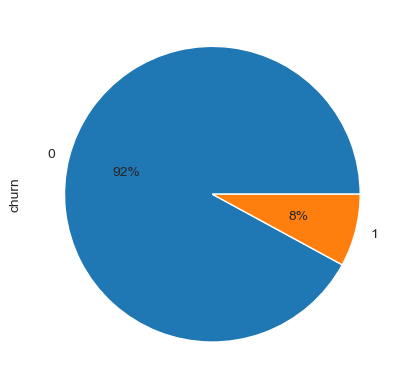

In [158]:
y.value_counts(normalize=True).plot(kind="pie", autopct= "%1.0F%%", shadow= False)

In [157]:
## !pip install imblearn

### SMOTE For handling class imbalance

In [86]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

arpu_6   arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  801.837  817.852   838.929       187.63       189.98       361.84   
1  142.890  805.901  1324.343        81.34       349.73       368.26   
2  836.862  952.493   588.581       580.24       506.79       201.91   
3  299.586  383.122    52.359        42.38        99.11        14.23   
4  637.702  681.622    33.750       186.33       154.31         2.73   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0       1465.04       1708.13       1541.28           0.00           0.00   
1        109.76       1551.96       1586.26          77.63         151.23   
2        736.99       1027.78        655.06           6.68           0.00   
3         95.18        185.11         43.79           0.00           0.00   
4        978.33        287.91          1.55         359.81         201.96   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
0           0.00           0.00           0.00           0.00        375.73   
1         269.06         177.38         369.49        1168.99          1.21   
2         329.38           1.05           0.00         310.29        954.53   
3           0.00           0.00           0.00           0.00        127.34   
4          18.28         505.13         442.23           4.28         93.04   

   loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0        383.08        346.78       1276.94       1515.03       1556.34   
1        237.81        185.79         12.51       1294.38        599.73   
2       1111.59        373.58        350.91        422.63        173.09   
3        284.23         56.18          0.00          0.00          0.00   
4          0.00          0.00        550.59          0.00          0.00   

   isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
0           0.0           0.0           0.0          0.00          0.00   
1           0.0           0.0           0.0          0.00          0.00   
2           0.0           0.0           0.0         11.70          6.71   
3           0.0           0.0           0.0         11.98          4.48   
4           0.0           0.0           0.0         20.49          0.00   

   spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
0          1.43         0.00          0.0          0.0         1652.68   
1          0.00         0.00          0.0          0.0           13.73   
2          1.73         0.00          0.0          0.0         1317.14   
3          3.29         0.83          0.0          0.0          140.16   
4          0.00         1.49          0.0          0.0          665.64   

   total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0         1898.11         1904.56        266.44        258.76        174.89   
1         1532.19          785.53          3.11        284.36        139.33   
2         1540.94          548.41       1242.21       1182.66        590.66   
3          288.71           59.48        241.41        383.78         92.66   
4            0.00            0.00        121.58          0.00          0.00   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
0         95.81         66.66         63.56          362.41          325.43   
1          0.33        109.93         55.84            3.45          397.21   
2        111.81         27.93         14.26         1365.26         1216.38   
3          5.36          0.33          0.00          246.78          388.83   
4        102.54          0.00          0.00          224.28            0.00   

   total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0          238.71          0.15          0.00          0.25          0.00   
1          195.43          0.00          0.80          0.00          0.00   
2          627.99          0.00          0.00          0.00         11.23   
3           92.66          0

In [87]:
# columns with numerical data
condition1 = data.dtypes == 'int'
condition2 = data.dtypes == 'float'
numerical_vars = data.columns[condition1 | condition2].to_list()

In [88]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [89]:
# summary statistics of standardized variables
round(X_train_resampled.describe(),2)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count  38516.00  38516.00  38516.00     38516.00     38516.00     38516.00   
mean       0.00      0.00     -0.00        -0.00        -0.00         0.00   
std        1.00      1.00      1.00         1.00         1.00         1.00   
min       -1.18     -1.13     -0.79        -0.59        -0.56        -0.44   
25%       -0.54     -0.55     -0.67        -0.56        -0.53        -0.44   
50%       -0.16     -0.15     -0.20        -0.40        -0.39        -0.36   
75%        0.32      0.32      0.35         0.09         0.05        -0.06   
max       53.86     73.31     70.54        12.99        15.90        26.27   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      38516.00      38516.00      38516.00       38516.00       38516.00   
mean          -0.00         -0.00         -0.00          -0.00          -0.00   
std            1.00          1.00          1.00           1.00           1.00   
min           -0.75         -0.72         -0.58          -0.23          -0.21   
25%           -0.62         -0.61         -0.56          -0.23          -0.21   
50%           -0.33         -0.34         -0.37          -0.23          -0.21   
75%            0.19          0.21          0.15          -0.22          -0.18   
max           14.29         18.04         33.78          32.55          32.84   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       38516.00       38516.00       38516.00       38516.00   
mean           -0.00           0.00           0.00           0.00   
std             1.00           1.00           1.00           1.00   
min            -0.20          -0.25          -0.26          -0.23   
25%            -0.20          -0.25          -0.26          -0.23   
50%            -0.20          -0.25          -0.26          -0.23   
75%            -0.16          -0.23          -0.20          -0.17   
max            32.76          28.58          25.26          46.22   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
count      38516.00      38516.00      38516.00      38516.00      38516.00   
mean          -0.00          0.00         -0.00          0.00          0.00   
std            1.00          1.00          1.00          1.00          1.00   
min           -0.63         -0.60         -0.50         -0.65         -0.62   
25%           -0.55         -0.54         -0.50         -0.65         -0.61   
50%           -0.34         -0.34         -0.39         -0.49         -0.50   
75%            0.16          0.12          0.08          0.37          0.28   
max           31.27         23.14         36.71         11.03         15.51   

       std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
count      38516.00      38516.00      38516.00      38516.00      38516.00   
mean          -0.00          0.00          0.00          0.00         -0.00   
std            1.00          1.00          1.00          1.00          1.00   
min           -0.45         -0.06         -0.05         -0.04         -0.36   
25%           -0.45         -0.06         -0.05         -0.04         -0.36   
50%           -0.44         -0.06         -0.05         -0.04         -0.31   
75%           -0.06         -0.06         -0.05         -0.04         -0.02   
max           26.54        124.36        132.23        145.73         56.84   

       spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
count      38516.00      38516.00     38516.00     38516.00     38516.00   
mean           0.00         -0.00        -0.00         0.00        -0.00   
std            1.00          1.00         1.00         1.00         1.00   
min           -0.34         -0.28        -0.35        -0.02        -0.02   
25%           -0.34         -0.28        -0.35        -0.02        -0.02   
50%           -0.29         -0.28        -0.35        -0.02        -0.02  

### Building Logistic Regresion Model with baseline model

In [90]:
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [91]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [92]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [93]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [94]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15761  3497]
 [  291  1327]]

Confusion Matrix for test: 
 [[7897  305]
 [ 603  143]]


In [95]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.819
Sensitivity / True Positive Rate / Recall : 0.82
Specificity / True Negative Rate :  0.818
Precision / Positive Predictive Value : 0.275
F1-score : 0.412


Test Performance : 

Accuracy : 0.899
Sensitivity / True Positive Rate / Recall : 0.192
Specificity / True Negative Rate :  0.963
Precision / Positive Predictive Value : 0.319
F1-score : 0.24


In [96]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
mobile_number                                                  
7002399990       1    1    0    0    0    0    0    0    0    0
7002018957       1    1    1    1    1    0    0    0    0    0
7001121215       1    1    1    1    1    0    0    0    0    0
7001875030       1    1    1    1    1    1    1    1    0    0
7002014322       1    1    1    1    1    1    1    1    1    1

In [97]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

sensitivity  specificity  accuracy
0.0        1.000        0.000     0.078
0.1        0.976        0.332     0.382
0.2        0.952        0.502     0.537
0.3        0.917        0.629     0.651
0.4        0.870        0.737     0.747
0.5        0.820        0.818     0.819
0.6        0.759        0.881     0.871
0.7        0.657        0.926     0.905
0.8        0.456        0.960     0.921
0.9        0.217        0.984     0.925

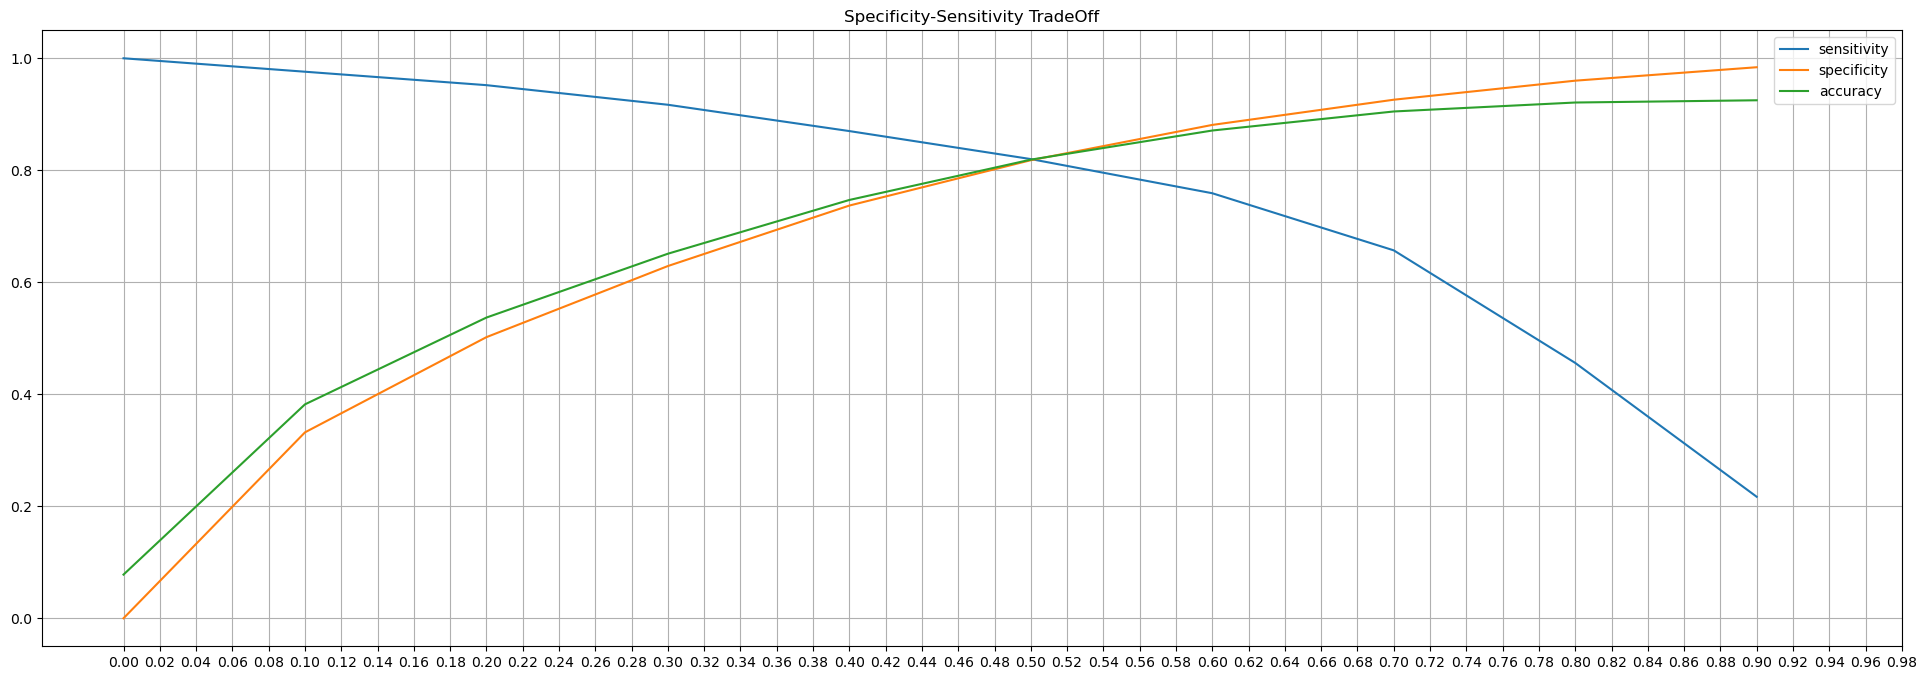

In [98]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

#### Baseline Performance at Optimum Cutoff

In [99]:
optimum_cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15632  3626]
 [  284  1334]]

Confusion Matrix for test: 
 [[7767  435]
 [ 553  193]]


In [100]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.813
Sensitivity / True Positive Rate / Recall : 0.824
Specificity / True Negative Rate :  0.812
Precision / Positive Predictive Value : 0.269
F1-score : 0.406


Test Performance : 

Accuracy : 0.89
Sensitivity / True Positive Rate / Recall : 0.259
Specificity / True Negative Rate :  0.947
Precision / Positive Predictive Value : 0.307
F1-score : 0.281


In [101]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.888 

ROC AUC score for Test :  0.749


#### Feature Selection using RFE

In [102]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr, n_features_to_select=15)
results = rfe.fit(X_train,y_train)
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False,

In [103]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

Column  Rank  Support
78            monthly_2g_6     1     True
66         count_rech_2g_6     1     True
68         count_rech_2g_8     1     True
79            monthly_2g_7     1     True
86               fb_user_8     1     True
53        total_rech_num_8     1     True
102          sachet_3g_7_0     1     True
52        total_rech_num_7     1     True
62       total_rech_data_8     1     True
112    count_rech_3g_8_0.0     1     True
116          sachet_3g_6_0     1     True
119          sachet_3g_8_0     1     True
105          sachet_2g_8_0     1     True
131    count_rech_3g_7_0.0     1     True
122          sachet_2g_7_0     1     True
94           sachet_2g_6_0     2    False
51        total_rech_num_6     3    False
35            loc_ic_mou_8     4    False
65         max_rech_data_8     5    False
34            loc_ic_mou_7     6    False
13           roam_og_mou_7     7    False
63         max_rech_data_6     8    False
38            std_ic_mou_8     9    False
58          max_rech_amt_7    10    False
32          total_og_mou_8    11    False
60       total_rech_data_6    12    False
20            std_og_mou_8    13    False
39          total_ic_mou_6    14    False
71             vol_2g_mb_8    15    False
88                vbc_3g_8    16    False
64         max_rech_data_7    17    False
61       total_rech_data_7    18    False
48             ic_others_6    19    False
49             ic_others_7    20    False
31          total_og_mou_7    21    False
26            spl_og_mou_8    22    False
50             ic_others_8    23    False
0                   arpu_6    24    False
56        total_rech_amt_8    25    False
33            loc_ic_mou_6    26    False
41          total_ic_mou_8    27    False
57          max_rech_amt_6    28    False
14           roam_og_mou_8    29    False
70             vol_2g_mb_7    30    False
9            roam_ic_mou_6    31    False
93   total_data_rech_amt_8    32    False
21            isd_og_mou_6    33    False
47            isd_ic_mou_8    34    False
25            spl_og_mou_7    35    False
135    count_rech_3g_6_0.0    36    False
1                   arpu_7    37    False
69             vol_2g_mb_6    38    False
8             offnet_mou_8    39    False
17            loc_og_mou_8    40    False
59          max_rech_amt_8    41    False
36            std_ic_mou_6    42    False
87                     aon    43    False
23            isd_og_mou_8    44    False
19            std_og_mou_7    45    False
7             offnet_mou_7    46    False
6             offnet_mou_6    47    False
18            std_og_mou_6    48    False
4              onnet_mou_7    49    False
15            loc_og_mou_6    50    False
3              onnet_mou_6    51    False
45            isd_ic_mou_6    52    False
2                   arpu_8    53    False
91   total_data_rech_amt_6    54    False
92   total_data_rech_amt_7    55    False
55        total_rech_amt_7    56    False
80            monthly_2g_8    57    False
28             og_others_7    58    False
67         count_rech_2g_7    59    False
29             og_others_8    60    False
44            spl_ic_mou_8    61    False
90                vbc_3g_6    62    False
30          total_og_mou_6    63    False
72             vol_3g_mb_6    64    False
73             vol_3g_mb_7    65    False
113    count_rech_3g_8_1.0    66    False
22            isd_og_mou_7    67    False
120          sachet_3g_8_1    68    False
84               fb_user_6    69    False
123          sachet_2g_7_1    70    False
132    count_rech_3g_7_1.0    71    False
97           sachet_2g_6_3    72    False
137    count_rech_3g_6_2.0    73    False
98           sachet_2g_6_4    74    False
136    count_rech_3g_6_1.0    75    False
82            monthly_3g_7    76    False
110          sachet_2g_8_5    77    False
96           sachet_2g_6_2    78    False
124          sachet_2g_7_2    79    False
95           sachet_2g_6_1    80    False
128          sachet_2g_7_6    

In [104]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['monthly_2g_6',
 'count_rech_2g_6',
 'count_rech_2g_8',
 'monthly_2g_7',
 'fb_user_8',
 'total_rech_num_8',
 'sachet_3g_7_0',
 'total_rech_num_7',
 'total_rech_data_8',
 'count_rech_3g_8_0.0',
 'sachet_3g_6_0',
 'sachet_3g_8_0',
 'sachet_2g_8_0',
 'count_rech_3g_7_0.0',
 'sachet_2g_7_0']

### Logistic Regression Model with RFE

### Model- 1

In [105]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
logr = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38500
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17079.
Date:                Mon, 20 Feb 2023   Deviance:                       34157.
Time:                        20:37:04   Pearson chi2:                 8.55e+13
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3931
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7071      0.090     30.212      0.000       2.531       2.883
monthly_2g_6           -0.5560      0.058     -9.510      0.000      -0.671      -0.441
count_rech_2g_6         0.1392      0.022      6.303      0.000       0.096       0.182
count_rech_2g_8        -0.3414      0.072     -4.722      0.000      -0.483      -0.200
monthly_2g_7           -1.1145      0.067    -16.558      0.000      -1.246      -0.983
fb_user_8              -1.5381      0.030    -51.949      0.000      -1.596      -1.480
total_rech_num_8       -0.2068      0.004    -58.395      0.000      -0.214      -0.200
sachet_3g_7_0           0.0805      0.070      1.155      0.248      -0.056       0.217
total_rech_num_7        0.0889      0.003     34.663      0.000       0.084       0.094
total_rech_data_8      -0.0646      0.072     -0.899      0.369      -0.205       0.076
count_rech_3g_8_0.0    -1.3394      0.086    -15.582      0.000      -1.508      -1.171
sachet_3g_6_0          -0.6915      0.049    -14.093      0.000      -0.788      -0.595
sachet_3g_8_0           0.7230      0.091      7.957      0.000       0.545       0.901
sachet_2g_8_0          -1.1718      0.052    -22.431      0.000      -1.274      -1.069
count_rech_3g_7_0.0    -0.3219      0.054     -5.986      0.000      -0.427      -0.217
sachet_2g_7_0          -0.3116      0.039     -7.959      0.000      -0.388      -0.235
=======================================================================================
"""

In [106]:
# Using P-value and vif for manual feature elimination

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train_resampled, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train_resampled, logr_fit, rfe_selected_columns)

VIF  P-value
Features                           
sachet_3g_8_0        28.54   0.0000
sachet_3g_7_0        20.37   0.2479
count_rech_3g_8_0.0  19.87   0.0000
count_rech_3g_7_0.0  11.36   0.0000
sachet_3g_6_0         8.84   0.0000
count_rech_2g_8       8.73   0.0000
total_rech_data_8     8.17   0.3687
sachet_2g_8_0         7.08   0.0000
sachet_2g_7_0         5.23   0.0000
total_rech_num_7      4.71   0.0000
total_rech_num_8      3.90   0.0000
fb_user_8             2.40   0.0000
monthly_2g_7          1.67   0.0000
monthly_2g_6          1.62   0.0000
count_rech_2g_6       1.59   0.0000

sachet_3g_8_0 has highest VIF value. We will drop this variable.

In [107]:
selected_columns = rfe_selected_columns
selected_columns.remove('sachet_3g_8_0')
selected_columns

['monthly_2g_6',
 'count_rech_2g_6',
 'count_rech_2g_8',
 'monthly_2g_7',
 'fb_user_8',
 'total_rech_num_8',
 'sachet_3g_7_0',
 'total_rech_num_7',
 'total_rech_data_8',
 'count_rech_3g_8_0.0',
 'sachet_3g_6_0',
 'sachet_2g_8_0',
 'count_rech_3g_7_0.0',
 'sachet_2g_7_0']

### Model 2

In [108]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38501
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17111.
Date:                Mon, 20 Feb 2023   Deviance:                       34221.
Time:                        20:37:53   Pearson chi2:                 7.61e+13
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9484      0.084     35.205      0.000       2.784       3.113
monthly_2g_6           -0.5627      0.058     -9.666      0.000      -0.677      -0.449
count_rech_2g_6         0.1418      0.022      6.481      0.000       0.099       0.185
count_rech_2g_8        -0.2696      0.072     -3.749      0.000      -0.411      -0.129
monthly_2g_7           -1.1256      0.067    -16.741      0.000      -1.257      -0.994
fb_user_8              -1.4996      0.029    -51.823      0.000      -1.556      -1.443
total_rech_num_8       -0.2060      0.004    -58.345      0.000      -0.213      -0.199
sachet_3g_7_0           0.2821      0.065      4.331      0.000       0.154       0.410
total_rech_num_7        0.0882      0.003     34.460      0.000       0.083       0.093
total_rech_data_8      -0.1660      0.071     -2.328      0.020      -0.306      -0.026
count_rech_3g_8_0.0    -1.0420      0.077    -13.510      0.000      -1.193      -0.891
sachet_3g_6_0          -0.6297      0.048    -13.130      0.000      -0.724      -0.536
sachet_2g_8_0          -1.0906      0.051    -21.585      0.000      -1.190      -0.992
count_rech_3g_7_0.0    -0.4552      0.052     -8.754      0.000      -0.557      -0.353
sachet_2g_7_0          -0.3157      0.039     -8.097      0.000      -0.392      -0.239
=======================================================================================
"""

In [109]:
# vif and p-values
vif(X_train_resampled, logr2_fit, selected_columns)

VIF  P-value
Features                           
sachet_3g_7_0        16.40   0.0000
count_rech_3g_8_0.0  10.38   0.0000
count_rech_3g_7_0.0  10.04   0.0000
count_rech_2g_8       8.73   0.0002
sachet_3g_6_0         8.40   0.0000
total_rech_data_8     8.16   0.0199
sachet_2g_8_0         6.40   0.0000
sachet_2g_7_0         5.23   0.0000
total_rech_num_7      4.70   0.0000
total_rech_num_8      3.90   0.0000
fb_user_8             2.21   0.0000
monthly_2g_7          1.66   0.0000
monthly_2g_6          1.61   0.0000
count_rech_2g_6       1.57   0.0000

sachet_3g_7_0 has high VIF value. so lets drop this variable.

In [110]:
selected_columns.remove('sachet_3g_7_0')
selected_columns

['monthly_2g_6',
 'count_rech_2g_6',
 'count_rech_2g_8',
 'monthly_2g_7',
 'fb_user_8',
 'total_rech_num_8',
 'total_rech_num_7',
 'total_rech_data_8',
 'count_rech_3g_8_0.0',
 'sachet_3g_6_0',
 'sachet_2g_8_0',
 'count_rech_3g_7_0.0',
 'sachet_2g_7_0']

### Model- 3

In [111]:
logr3 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38502
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17120.
Date:                Mon, 20 Feb 2023   Deviance:                       34240.
Time:                        20:38:21   Pearson chi2:                 7.42e+13
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3918
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.0557      0.080     38.140      0.000       2.899       3.213
monthly_2g_6           -0.5724      0.058     -9.841      0.000      -0.686      -0.458
count_rech_2g_6         0.1455      0.022      6.656      0.000       0.103       0.188
count_rech_2g_8        -0.2403      0.072     -3.353      0.001      -0.381      -0.100
monthly_2g_7           -1.1212      0.067    -16.736      0.000      -1.253      -0.990
fb_user_8              -1.4881      0.029    -51.727      0.000      -1.544      -1.432
total_rech_num_8       -0.2057      0.004    -58.331      0.000      -0.213      -0.199
total_rech_num_7        0.0876      0.003     34.328      0.000       0.083       0.093
total_rech_data_8      -0.2040      0.071     -2.877      0.004      -0.343      -0.065
count_rech_3g_8_0.0    -1.0872      0.076    -14.244      0.000      -1.237      -0.938
sachet_3g_6_0          -0.5752      0.046    -12.481      0.000      -0.666      -0.485
sachet_2g_8_0          -1.0768      0.050    -21.405      0.000      -1.175      -0.978
count_rech_3g_7_0.0    -0.3244      0.042     -7.736      0.000      -0.407      -0.242
sachet_2g_7_0          -0.2762      0.038     -7.306      0.000      -0.350      -0.202
=======================================================================================
"""

In [112]:
# vif and p-values
vif(X_train_resampled, logr3_fit, selected_columns)

VIF  P-value
Features                           
count_rech_3g_8_0.0  10.35   0.0000
count_rech_2g_8       8.73   0.0008
total_rech_data_8     8.16   0.0040
sachet_3g_6_0         7.22   0.0000
count_rech_3g_7_0.0   6.25   0.0000
sachet_2g_8_0         6.16   0.0000
sachet_2g_7_0         4.82   0.0000
total_rech_num_7      4.70   0.0000
total_rech_num_8      3.90   0.0000
fb_user_8             2.06   0.0000
monthly_2g_7          1.65   0.0000
monthly_2g_6          1.60   0.0000
count_rech_2g_6       1.56   0.0000

count_rech_3g_8_0.0 has high vif and p value. so lets drop them.

In [113]:
selected_columns.remove('count_rech_3g_8_0.0')
selected_columns

['monthly_2g_6',
 'count_rech_2g_6',
 'count_rech_2g_8',
 'monthly_2g_7',
 'fb_user_8',
 'total_rech_num_8',
 'total_rech_num_7',
 'total_rech_data_8',
 'sachet_3g_6_0',
 'sachet_2g_8_0',
 'count_rech_3g_7_0.0',
 'sachet_2g_7_0']

### Model- 4

In [114]:
logr4 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr4_fit = logr4.fit()
logr4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38503
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17231.
Date:                Mon, 20 Feb 2023   Deviance:                       34462.
Time:                        20:38:37   Pearson chi2:                 5.93e+13
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3505      0.061     38.546      0.000       2.231       2.470
monthly_2g_6           -0.5957      0.058    -10.349      0.000      -0.709      -0.483
count_rech_2g_6         0.1223      0.021      5.739      0.000       0.081       0.164
count_rech_2g_8        -0.6956      0.058    -12.000      0.000      -0.809      -0.582
monthly_2g_7           -1.1584      0.067    -17.383      0.000      -1.289      -1.028
fb_user_8              -1.2783      0.023    -55.795      0.000      -1.323      -1.233
total_rech_num_8       -0.2030      0.003    -58.121      0.000      -0.210      -0.196
total_rech_num_7        0.0838      0.003     33.369      0.000       0.079       0.089
total_rech_data_8       0.2572      0.053      4.811      0.000       0.152       0.362
sachet_3g_6_0          -0.5977      0.046    -13.025      0.000      -0.688      -0.508
sachet_2g_8_0          -1.0884      0.050    -21.821      0.000      -1.186      -0.991
count_rech_3g_7_0.0    -0.5045      0.041    -12.428      0.000      -0.584      -0.425
sachet_2g_7_0          -0.2582      0.038     -6.866      0.000      -0.332      -0.185
=======================================================================================
"""

In [115]:
# vif and p-values
vif(X_train_resampled, logr4_fit, selected_columns)

VIF  P-value
Features                          
count_rech_2g_8      7.55      0.0
total_rech_data_8    7.24      0.0
sachet_3g_6_0        6.47      0.0
sachet_2g_8_0        5.61      0.0
count_rech_3g_7_0.0  5.13      0.0
sachet_2g_7_0        4.82      0.0
total_rech_num_7     4.51      0.0
total_rech_num_8     3.90      0.0
fb_user_8            1.86      0.0
monthly_2g_7         1.65      0.0
monthly_2g_6         1.60      0.0
count_rech_2g_6      1.52      0.0

count_rech_2g_8 has high VIF value. so lets drop them.

In [116]:
selected_columns.remove('count_rech_2g_8')
selected_columns

['monthly_2g_6',
 'count_rech_2g_6',
 'monthly_2g_7',
 'fb_user_8',
 'total_rech_num_8',
 'total_rech_num_7',
 'total_rech_data_8',
 'sachet_3g_6_0',
 'sachet_2g_8_0',
 'count_rech_3g_7_0.0',
 'sachet_2g_7_0']

### Model -5

In [117]:
logr5 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr5_fit = logr5.fit()
logr5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38504
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17301.
Date:                Mon, 20 Feb 2023   Deviance:                       34603.
Time:                        20:40:00   Pearson chi2:                 5.94e+13
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3861
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3542      0.061     38.737      0.000       2.235       2.473
monthly_2g_6           -0.5994      0.057    -10.480      0.000      -0.711      -0.487
count_rech_2g_6         0.0737      0.020      3.642      0.000       0.034       0.113
monthly_2g_7           -1.1904      0.067    -17.899      0.000      -1.321      -1.060
fb_user_8              -1.2239      0.022    -54.685      0.000      -1.268      -1.180
total_rech_num_8       -0.2036      0.003    -58.361      0.000      -0.210      -0.197
total_rech_num_7        0.0850      0.003     33.907      0.000       0.080       0.090
total_rech_data_8      -0.2901      0.035     -8.309      0.000      -0.358      -0.222
sachet_3g_6_0          -0.6917      0.045    -15.205      0.000      -0.781      -0.603
sachet_2g_8_0          -0.8864      0.045    -19.506      0.000      -0.975      -0.797
count_rech_3g_7_0.0    -0.6084      0.040    -15.271      0.000      -0.687      -0.530
sachet_2g_7_0          -0.2257      0.037     -6.044      0.000      -0.299      -0.152
=======================================================================================
"""

In [118]:
# vif and p-values
vif(X_train_resampled, logr5_fit, selected_columns)

VIF  P-value
Features                          
sachet_3g_6_0        6.30   0.0000
sachet_2g_8_0        5.08   0.0000
count_rech_3g_7_0.0  4.81   0.0000
sachet_2g_7_0        4.77   0.0000
total_rech_num_7     4.49   0.0000
total_rech_num_8     3.90   0.0000
total_rech_data_8    2.07   0.0000
fb_user_8            1.85   0.0000
monthly_2g_7         1.64   0.0000
monthly_2g_6         1.60   0.0000
count_rech_2g_6      1.45   0.0003

sachet_3g_6_0 has high VIF value. so lets drop it.

In [119]:
selected_columns.remove('sachet_3g_6_0')
selected_columns

['monthly_2g_6',
 'count_rech_2g_6',
 'monthly_2g_7',
 'fb_user_8',
 'total_rech_num_8',
 'total_rech_num_7',
 'total_rech_data_8',
 'sachet_2g_8_0',
 'count_rech_3g_7_0.0',
 'sachet_2g_7_0']

### Model -6

In [120]:
logr6 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr6_fit = logr6.fit()
logr6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38505
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17421.
Date:                Mon, 20 Feb 2023   Deviance:                       34842.
Time:                        20:41:44   Pearson chi2:                 9.01e+13
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9137      0.052     36.455      0.000       1.811       2.017
monthly_2g_6           -0.6385      0.057    -11.221      0.000      -0.750      -0.527
count_rech_2g_6         0.1390      0.019      7.168      0.000       0.101       0.177
monthly_2g_7           -1.1677      0.066    -17.572      0.000      -1.298      -1.037
fb_user_8              -1.2250      0.022    -55.118      0.000      -1.269      -1.181
total_rech_num_8       -0.2053      0.003    -58.735      0.000      -0.212      -0.198
total_rech_num_7        0.0835      0.002     33.468      0.000       0.079       0.088
total_rech_data_8      -0.2816      0.035     -8.098      0.000      -0.350      -0.213
sachet_2g_8_0          -0.8884      0.045    -19.551      0.000      -0.977      -0.799
count_rech_3g_7_0.0    -0.7465      0.039    -19.203      0.000      -0.823      -0.670
sachet_2g_7_0          -0.2508      0.037     -6.747      0.000      -0.324      -0.178
=======================================================================================
"""

In [121]:
# vif and p-values
vif(X_train_resampled, logr6_fit, selected_columns)

VIF  P-value
Features                          
sachet_2g_7_0        4.64      0.0
sachet_2g_8_0        4.58      0.0
total_rech_num_7     4.32      0.0
total_rech_num_8     3.90      0.0
count_rech_3g_7_0.0  3.61      0.0
total_rech_data_8    2.06      0.0
fb_user_8            1.79      0.0
monthly_2g_7         1.64      0.0
monthly_2g_6         1.59      0.0
count_rech_2g_6      1.43      0.0

-All features have low p-values(<0.05) and VIF (<5).

-This model could be used as the interpretable logistic regression model.

### Final Logistic Regression Model with RFE and Manual Elimination

In [122]:
logr6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38505
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17421.
Date:                Mon, 20 Feb 2023   Deviance:                       34842.
Time:                        20:43:06   Pearson chi2:                 9.01e+13
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9137      0.052     36.455      0.000       1.811       2.017
monthly_2g_6           -0.6385      0.057    -11.221      0.000      -0.750      -0.527
count_rech_2g_6         0.1390      0.019      7.168      0.000       0.101       0.177
monthly_2g_7           -1.1677      0.066    -17.572      0.000      -1.298      -1.037
fb_user_8              -1.2250      0.022    -55.118      0.000      -1.269      -1.181
total_rech_num_8       -0.2053      0.003    -58.735      0.000      -0.212      -0.198
total_rech_num_7        0.0835      0.002     33.468      0.000       0.079       0.088
total_rech_data_8      -0.2816      0.035     -8.098      0.000      -0.350      -0.213
sachet_2g_8_0          -0.8884      0.045    -19.551      0.000      -0.977      -0.799
count_rech_3g_7_0.0    -0.7465      0.039    -19.203      0.000      -0.823      -0.670
sachet_2g_7_0          -0.2508      0.037     -6.747      0.000      -0.324      -0.178
=======================================================================================
"""

In [123]:
selected_columns

['monthly_2g_6',
 'count_rech_2g_6',
 'monthly_2g_7',
 'fb_user_8',
 'total_rech_num_8',
 'total_rech_num_7',
 'total_rech_data_8',
 'sachet_2g_8_0',
 'count_rech_3g_7_0.0',
 'sachet_2g_7_0']

In [124]:
# Prediction 
y_train_pred_lr = logr6_fit.predict(sm.add_constant(X_train_resampled[selected_columns]))
y_train_pred_lr.head()

0    0.592659
1    0.221939
2    0.554976
3    0.944351
4    0.797213
dtype: float64

In [125]:
y_test_pred_lr = logr6_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

mobile_number
7000607806    0.133151
7002349910    0.195889
7001859889    0.009709
7001887026    0.004366
7002327435    0.242193
dtype: float64

#### Performance
#### Finding Optimum Probability Cutoff

In [126]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train_resampled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0    1    1    1    1    1    1    0    0    0    0
1    1    1    1    0    0    0    0    0    0    0
2    1    1    1    1    1    1    0    0    0    0
3    1    1    1    1    1    1    1    1    1    1
4    1    1    1    1    1    1    1    1    0    0

In [127]:
# DataFrame for Performance metrics at each threshold

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    logr_metrics_df =  logr_metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
logr_metrics_df.index = thresholds
logr_metrics_df

sensitivity  specificity  accuracy
0.0        1.000        0.000     0.500
0.1        0.980        0.350     0.665
0.2        0.951        0.499     0.725
0.3        0.918        0.594     0.756
0.4        0.888        0.662     0.775
0.5        0.850        0.733     0.792
0.6        0.795        0.814     0.804
0.7        0.655        0.902     0.778
0.8        0.403        0.960     0.681
0.9        0.149        0.992     0.571

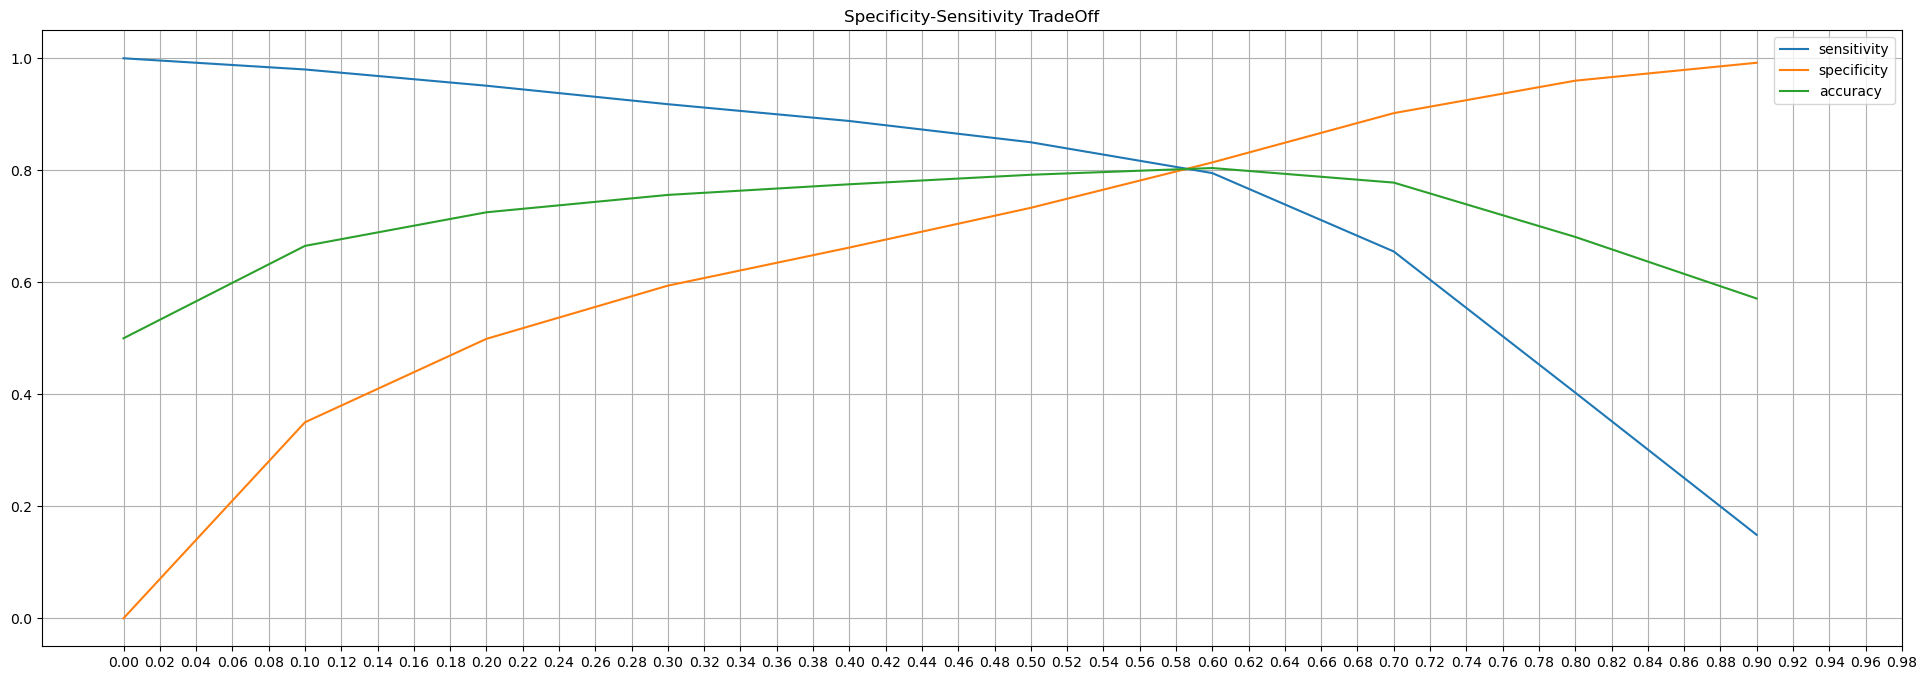

In [128]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

The optimum probability cutoff for Logistic regression model is 0.59

In [129]:
optimum_cutoff = 0.59
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15518  3740]
 [ 3810 15448]]

Confusion Matrix for test: 
 [[6680 1522]
 [ 261  485]]


In [130]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.804
Sensitivity / True Positive Rate / Recall : 0.802
Specificity / True Negative Rate :  0.806
Precision / Positive Predictive Value : 0.805
F1-score : 0.803


Test Performance : 

Accuracy : 0.801
Sensitivity / True Positive Rate / Recall : 0.65
Specificity / True Negative Rate :  0.814
Precision / Positive Predictive Value : 0.242
F1-score : 0.353


In [131]:
# ROC_AUC score 
print('ROC AUC score for Train : ',round(roc_auc_score(y_train_resampled, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

ROC AUC score for Train :  0.877 

ROC AUC score for Test :  0.801


### Model 1 : Logistic Regression (Interpretable Model Summary)

In [132]:
lr_summary_html = logr6_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



const                  1.9137
fb_user_8             -1.2250
monthly_2g_7          -1.1677
sachet_2g_8_0         -0.8884
count_rech_3g_7_0.0   -0.7465
monthly_2g_6          -0.6385
total_rech_data_8     -0.2816
sachet_2g_7_0         -0.2508
total_rech_num_8      -0.2053
count_rech_2g_6        0.1390
total_rech_num_7       0.0835
Name: coef, dtype: float64

The above model could be used as the interpretable model for predicting telecom churn

### PCA

In [133]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

array([[-3.81633711e-03,  2.89433253e-03,  1.10619681e-02, ...,
         1.92803062e-05,  1.46491123e-05,  9.84811967e-06],
       [ 1.82765173e-01,  2.14203306e-01,  2.20213846e-01, ...,
        -2.45959895e-05, -4.32566587e-06,  3.27551143e-07],
       [-1.03856728e-01, -1.03085745e-01, -6.49924351e-02, ...,
        -3.61528603e-05, -2.31213197e-05, -1.18245901e-05],
       ...,
       [-1.51879014e-07,  5.77023275e-07, -6.79437040e-07, ...,
         2.05009373e-04,  3.37281403e-04,  2.67928315e-04],
       [ 9.76144471e-08,  2.04062700e-07,  3.39567159e-07, ...,
        -5.42276466e-05,  1.82522016e-04, -2.20388551e-05],
       [ 4.09631771e-08, -2.58670416e-07,  4.60441874e-07, ...,
        -6.22255555e-04, -5.28625089e-04, -1.75154257e-04]])

In [134]:
pca.explained_variance_ratio_

array([2.96159938e-01, 1.68436008e-01, 8.87377583e-02, 7.34334046e-02,
       5.84157874e-02, 5.24769306e-02, 4.39833620e-02, 3.40372025e-02,
       3.12529776e-02, 2.67077959e-02, 1.68149171e-02, 1.43338307e-02,
       1.36709624e-02, 1.22245113e-02, 1.05706311e-02, 9.62861514e-03,
       5.60212009e-03, 4.25454250e-03, 4.16774688e-03, 3.85704484e-03,
       3.52961271e-03, 2.83851035e-03, 2.42843519e-03, 2.34417085e-03,
       2.22084552e-03, 1.97480931e-03, 1.93129971e-03, 1.82585243e-03,
       1.76450459e-03, 1.51504350e-03, 1.26936154e-03, 1.03026304e-03,
       1.01807202e-03, 7.95837103e-04, 5.95188369e-04, 5.42851800e-04,
       5.08656559e-04, 4.26001982e-04, 3.54375051e-04, 3.36357531e-04,
       3.09925408e-04, 2.89782276e-04, 2.79002450e-04, 2.34962940e-04,
       1.68139918e-04, 1.55182003e-04, 1.45139772e-04, 1.08467871e-04,
       7.85015786e-05, 6.47531437e-05, 5.70022514e-05, 1.89973493e-05,
       1.82560013e-05, 1.40713435e-05, 9.35736238e-06, 7.00253941e-06,
      

#### Scree Plot

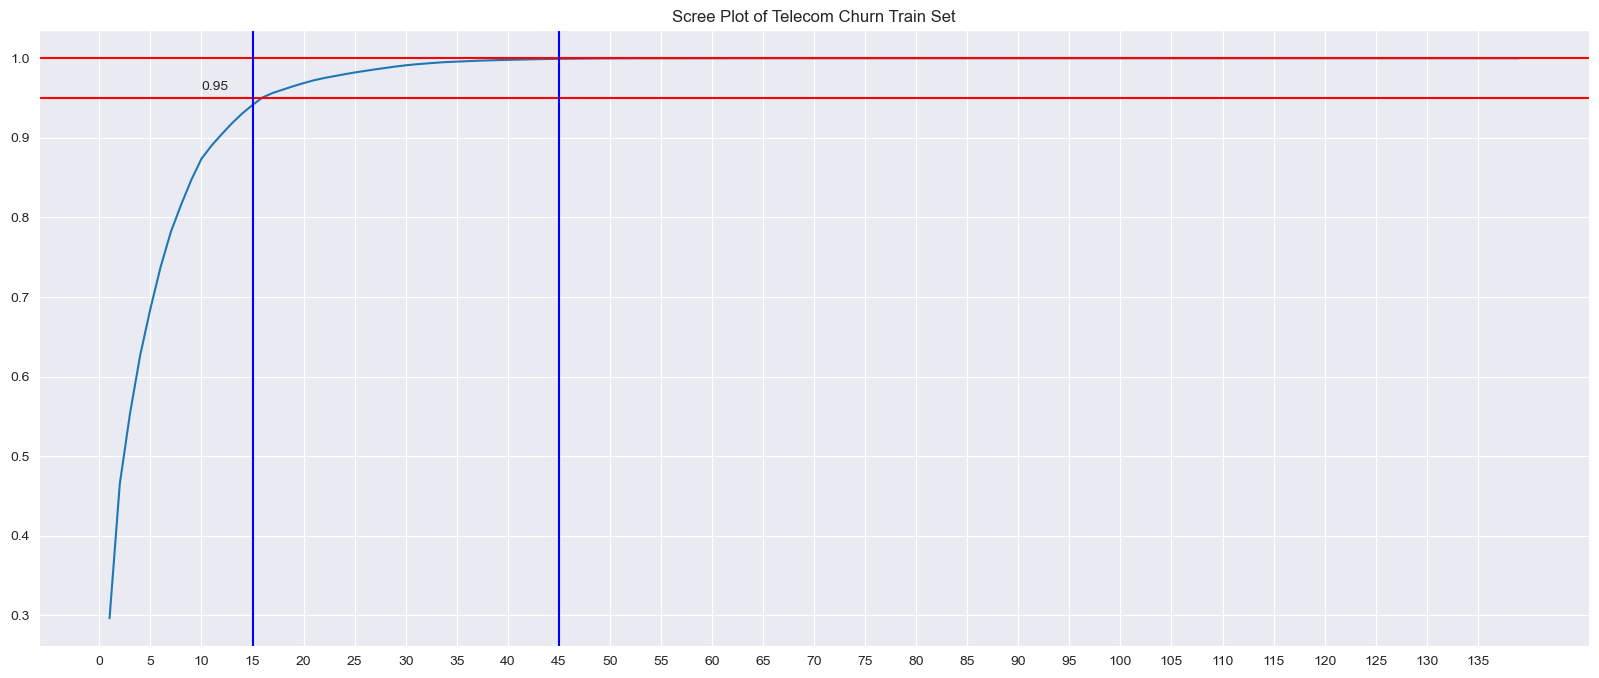

In [135]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(np.arange(1,len(var_cum) + 1), var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

From the above scree plot, it is clear that 95% of variance in the train set can be explained by first 16 principal components and 100% of variance is explained by the first 45 principal components.

In [136]:
# Perform PCA using the first 45 components
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

PC_1         PC_2        PC_3         PC_4         PC_5  \
mobile_number                                                                   
7002399990    -1742.833376  2852.505611  383.387540  -906.022549   444.643957   
7002018957    -1213.120396  1077.747218  202.322305   -98.896433    21.032741   
7001121215    -1371.263981  1279.309611 -309.925062  1271.527818 -1256.621078   
7001875030     -214.108302 -1491.198386   90.437819  -372.331869  -373.451896   
7002014322     -870.644436  -921.394585  279.074169  -425.388639   448.902150   

                     PC_6        PC_7         PC_8         PC_9        PC_10  \
mobile_number                                                                  
7002399990    -101.732254   67.558862  -220.052348   412.266054 -1570.412239   
7002018957    -363.621482  621.566488   852.981782  1458.277251  -808.269876   
7001121215     781.605560 -519.718700 -1270.193584  -235.119494  -214.911712   
7001875030     196.761592  125.784427   -40.174296    32.104446    25.941083   
7002014322    -193.779364  855.266375  -135.633274  -989.235459  -145.149647   

                    PC_11       PC_12       PC_13       PC_14       PC_15  \
mobile_number                                                               
7002399990    -215.188579 -192.646133   57.273862   45.903350  -47.420758   
7002018957     -38.863854  844.357379  126.643028   13.235215    9.996111   
7001121215     460.035086  623.964631   78.267032   23.884064  131.454182   
7001875030      43.162380  270.397028  -89.263420   11.693495  115.602545   
7002014322    -147.848916   60.324923  146.315351  149.665864 -148.414761   

                    PC_16       PC_17       PC_18       PC_19       PC_20  \
mobile_number                                                               
7002399990      24.428430   12.709699   -1.891734  -64.681998  -76.534713   
7002018957    -263.020961 -433.320009 -675.239555  509.853904   -1.978244   
7001121215     -52.573395   44.756489  -78.256442  122.474094 -435.452448   
7001875030       0.805960  169.303266  124.798962   31.786772 -102.560466   
7002014322       4.205353  234.793537  521.802616 -357.987441   98.956229   

                    PC_21       PC_22       PC_23      PC_24       PC_25  \
mobile_number                                                              
7002399990     138.299274  -24.603562   19.104242 -35.548092   34.954696   
7002018957     231.354578  -94.716082   79.990359 -55.920184  102.970008   
7001121215     631.433077  -75.066409  -37.446361 -52.326699  170.939036   
7001875030      10.330556 -208.514196 -198.191481 -58.547041   60.120675   
7002014322    -163.826880   38.304016  -58.592450  82.362898   83.072607   

                    PC_26      PC_27       PC_28       PC_29      PC_30  \
mobile_number                                                             
7002399990      71.103808   3.655994   -9.242061  -70.487253   4.976221   
7002018957     477.814655 -74.781081  214.379305  977.350162  -6.143401   
7001121215     258.444020  23.345613 -248.347794  284.099401  46.144260   
7001875030     136.522611  64.542232 -207.948270   -3.179998  59.543569   
7002014322     -15.775975 -22.036070   92.390256  671.346644 -68.313417   

                    PC_31       PC_32      PC_33       PC_34      PC_35  \
mobile_number                                                             
7002399990     -22.642278  -31.340067  -7.559211   72.062155   6.906302   
7002018957     199.344290  -68.178060  24.395780 -380.198364 -38.520423   
7001121215    -212.847882  -33.808908 -11.735471    9.862409  50.308418   
7001875030     -20.348902   13.120522 -35.367253    9.434316  44.946013   
7002014322     -84.485661  194.424656  29.882358   84.463436  15.646390   

                    PC_36       PC_37      PC_38      PC_39      PC_40  \
mobile_number                                                            
7002399990      19.792848  -11.138212 -18.709872  -6.356164  22.193410   
700201

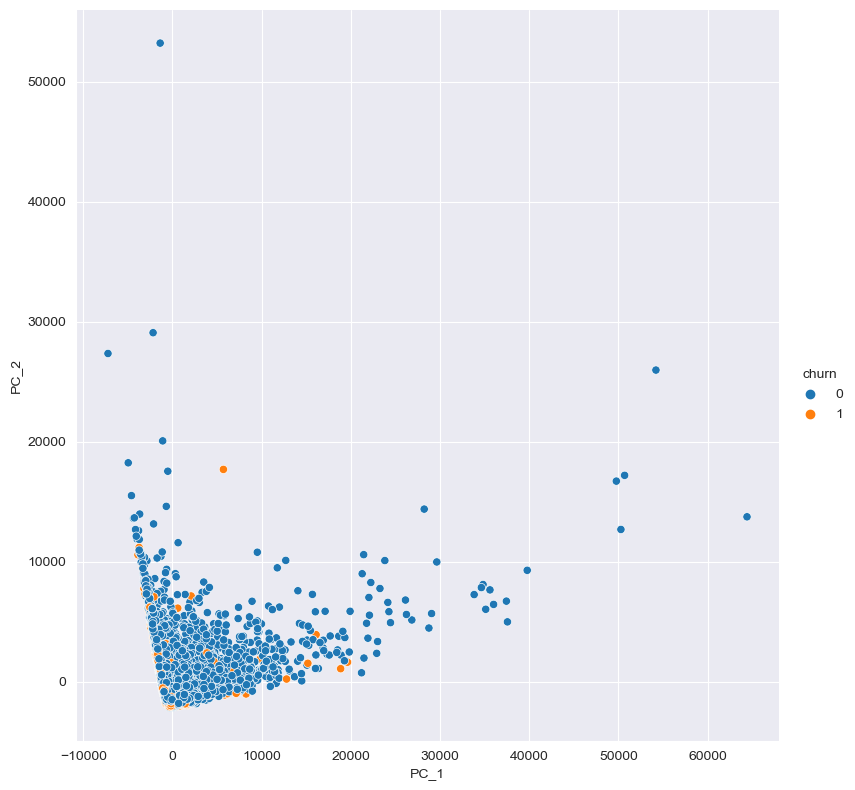

In [138]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "churn", size=8);


### Model 2 : PCA + Logistic Regression Model

In [139]:
# X,y Split
y_train_pca = data_train_pca.pop('churn')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [140]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [141]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([1, 0, 1, 0, 1], dtype=int64)

#### Baseline Performance

In [142]:
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.558
Sensitivity / True Positive Rate / Recall : 0.934
Specificity / True Negative Rate :  0.527
Precision / Positive Predictive Value : 0.142
F1-score : 0.247

Test Performance :

Accuracy : 0.709
Sensitivity / True Positive Rate / Recall : 0.471
Specificity / True Negative Rate :  0.73
Precision / Positive Predictive Value : 0.137
F1-score : 0.212


#### Hyperparameter Tuning

In [143]:
# Creating a Logistic regression model using pca transformed train set
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [144]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [145]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best ROC-AUC score : 0.8727332639453318
Best Parameters : {'C': 10, 'penalty': 'l2'}


In [146]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [147]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [148]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.561
Sensitivity / True Positive Rate / Recall : 0.93
Specificity / True Negative Rate :  0.529
Precision / Positive Predictive Value : 0.142
F1-score : 0.246

Test Performance :

Accuracy : 0.634
Sensitivity / True Positive Rate / Recall : 0.669
Specificity / True Negative Rate :  0.631
Precision / Positive Predictive Value : 0.141
F1-score : 0.233


### Model 3 : PCA + Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.07926502145922747,
                                     1: 0.9207349785407726},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [150]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.07926502145922747,
                                                            1: 0.9207349785407726},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [151]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.8663973744342066
Best Parameters : {'max_depth': 7, 'min_samples_leaf': 30, 'n_estimators': 100}


In [152]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 1, 1], dtype=int64)

In [153]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 1], dtype=int64)

In [154]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.876
Sensitivity / True Positive Rate / Recall : 0.81
Specificity / True Negative Rate :  0.881
Precision / Positive Predictive Value : 0.364
F1-score : 0.502

Test Performance :

Accuracy : 0.836
Sensitivity / True Positive Rate / Recall : 0.568
Specificity / True Negative Rate :  0.861
Precision / Positive Predictive Value : 0.271
F1-score : 0.367


In [155]:
## out of bag error 
pca_rf_best_fit.oob_score_

0.8597911477294501

### Recommendations

In [156]:
print('Most Important Predictors of churn , in the order of importance are : ')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most Important Predictors of churn , in the order of importance are : 


const                  1.9137
fb_user_8             -1.2250
monthly_2g_7          -1.1677
sachet_2g_8_0         -0.8884
count_rech_3g_7_0.0   -0.7465
monthly_2g_6          -0.6385
total_rech_data_8     -0.2816
sachet_2g_7_0         -0.2508
total_rech_num_8      -0.2053
count_rech_2g_6        0.1390
total_rech_num_7       0.0835
Name: coef, dtype: float64

From the above, the following are the strongest indicators of churn
- Customers who churn show lower the fb user in 8th month the action period by 1.22 standard deviations , compared to users who don't churn , when all other factors are held constant. This is the strongest indicator of churn.
- Customers who churn show 'monthly_2g_7' by 1.16 standard deviations, when all other factors are held constant. This is the second strongest indicator of churn.
- Customers who churn show 'sachet_2g_8-0' by 0.8884 standard deviations, when all other factors are held constant. This is the second strongest indicator of churn.


##### Based on the above indicators the recommendations to the telecom company are :

    - The customer who used the 2G network in 7th month likely to churn.
    - The customer who avail for facebook and other social sites in 8th month are likely to churn.
    - Models with high sensitivity are the best for predicting churn. Use the PCA + Logistic Regression model to predict churn. It has an ROC score of 0.87, test sensitivity of 67%.